<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/StageFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import

**2 Classes**
* (1) prevention    36283
* (0) rapid         16337


**3 Classes**
* (1) normal        22980
* (0) rapid         16337
* (2) prevention    13303

## BI2

In [2]:
import pandas as pd
bi2 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /binary_2_Group_5_Fold.xlsx')
bi2 = bi2.iloc[:, 1:]
bi2

PatientUID  PatientVisitUID     Slopes  G1M2:ARB  G3M1:Statin  \
0            2299          3386255  -7.158596        90            0   
1            2299          4546471   5.550691        90           90   
2            2299          5812902  -6.063710       100          100   
3            2299          6947220 -12.812245        35            0   
4            2299          8186767  28.287500       100            0   
...           ...              ...        ...       ...          ...   
52615     3319961          9270330  -4.256753       100          100   
52616     3319971          9270331  -0.692078         0          100   
52617     3320048          9242721   7.217875         0            0   
52618     3320050          9257281 -32.794557         0            0   
52619     3321289          9274735 -36.776371         0            0   

       G5M2:NSAIDs  G1M5:Diuretic  G1M7:Beta blocker  \
0                0              0                  0   
1                0              0                  0   
2               34              0                  0   
3                1             35                  0   
4               15              0                  0   
...            ...            ...                ...   
52615            0              0                  0   
52616            0              0                  0   
52617            0              0                  0   
52618            0              0                  0   
52619            0              0                  0   

       G1M3:Dihydropyridine CCB  G1M6:MRA  ...  newL25:Parathyroid hormone  \
0                             0         0  ...                           1   
1                             0         0  ...                           1   
2                             0         0  ...                           1   
3                             0         0  ...                           1   
4                             0         0  ...                           1   
...                         ...       ...  ...                         ...   
52615                         0         0  ...                           1   
52616                         0         0  ...                           1   
52617                         0         0  ...                           1   
52618                         0         0  ...                           1   
52619                         0         0  ...                           1   

       newL26:Vitamin D  newL27:UrineAlbumin/Cr ratio  \
0                     1                             1   
1                     1                             1   
2                     1                             1   
3                     1                             1   
4                     1                             1   
...                 ...                           ...   
52615                 1                             0   
52616                 1                             0   
52617                 1                             1   
52618                 1                             1   
52619                 1                             1   

       newL28:UrineProtein/Cr ratio  newL29:UrineVolume (24hrs)  \
0                                 1                           1   
1                                 1                           1   
2                                 1                           1   
3                                 1                           1   
4                                 1                           1   
...                             ...                         ...   
52615                             0                           1   
52616                             0                           1   
52617                             1                           1   
52618                             1                           1   
52619                             1                           1   

       newL30:UrineUrea (24hrs)  newL31:Ur

In [3]:
bi2['NATNL'] = bi2['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [4]:
bi2 = bi2.sort_values(['PatientUID', 'PatientVisitUID'])
bi2['TimeDiff'] = bi2.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
bi2['TimeDiff'] = bi2['TimeDiff'].fillna(0)

In [5]:
bi2['time_t1'] = pd.to_datetime(bi2['time_t1'])

In [6]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(bi2[column].unique())}
    bi2[column] = bi2[column].map(encoding_map)

## BI3

In [7]:
import pandas as pd
bi3 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /binary_3_Group_5_Fold.xlsx')
bi3 = bi3.iloc[:, 1:]
bi3

PatientUID  PatientVisitUID     Slopes  G1M2:ARB  G3M1:Statin  \
0            2299          6947220 -12.812245        35            0   
1            2299          3386255  -7.158596        90            0   
2            2299          5812902  -6.063710       100          100   
3            2299          4546471   5.550691        90           90   
4            2299          8186767  28.287500       100            0   
...           ...              ...        ...       ...          ...   
52615     3319961          9270330  -4.256753       100          100   
52616     3319971          9270331  -0.692078         0          100   
52617     3320048          9242721   7.217875         0            0   
52618     3320050          9257281 -32.794557         0            0   
52619     3321289          9274735 -36.776371         0            0   

       G5M2:NSAIDs  G1M5:Diuretic  G1M7:Beta blocker  \
0                1             35                  0   
1                0              0                  0   
2               34              0                  0   
3                0              0                  0   
4               15              0                  0   
...            ...            ...                ...   
52615            0              0                  0   
52616            0              0                  0   
52617            0              0                  0   
52618            0              0                  0   
52619            0              0                  0   

       G1M3:Dihydropyridine CCB  G1M6:MRA  ...  newL25:Parathyroid hormone  \
0                             0         0  ...                           1   
1                             0         0  ...                           1   
2                             0         0  ...                           1   
3                             0         0  ...                           1   
4                             0         0  ...                           1   
...                         ...       ...  ...                         ...   
52615                         0         0  ...                           1   
52616                         0         0  ...                           1   
52617                         0         0  ...                           1   
52618                         0         0  ...                           1   
52619                         0         0  ...                           1   

       newL26:Vitamin D  newL27:UrineAlbumin/Cr ratio  \
0                     1                             1   
1                     1                             1   
2                     1                             1   
3                     1                             1   
4                     1                             1   
...                 ...                           ...   
52615                 1                             0   
52616                 1                             0   
52617                 1                             1   
52618                 1                             1   
52619                 1                             1   

       newL28:UrineProtein/Cr ratio  newL29:UrineVolume (24hrs)  \
0                                 1                           1   
1                                 1                           1   
2                                 1                           1   
3                                 1                           1   
4                                 1                           1   
...                             ...                         ...   
52615                             0                           1   
52616                             0                           1   
52617                             1                           1   
52618                             1                           1   
52619                             1                           1   

       newL30:UrineUrea (24hrs)  newL31:Ur

In [8]:
bi3['NATNL'] = bi3['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [9]:
bi3 = bi3.sort_values(['PatientUID', 'PatientVisitUID'])
bi3['TimeDiff'] = bi3.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
bi3['TimeDiff'] = bi3['TimeDiff'].fillna(0)

In [10]:
bi3['time_t1'] = pd.to_datetime(bi3['time_t1'])

In [11]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(bi3[column].unique())}
    bi3[column] = bi3[column].map(encoding_map)

## MF2

In [12]:
import pandas as pd
data2 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /df_2_Group_5_Fold.xlsx')
data2 = data2.iloc[:, 1:]
data2

PatientUID  PatientVisitUID     Slopes  InPatient  OutPatient  \
0            2299          3386255  -7.158596          0           1   
1            2299          4546471   5.550691          0           1   
2            2299          5812902  -6.063710          0           1   
3            2299          6947220 -12.812245          0           1   
4            2299          8186767  28.287500          0           1   
...           ...              ...        ...        ...         ...   
52615     3319961          9270330  -4.256753          0           1   
52616     3319971          9270331  -0.692078          0           1   
52617     3320048          9242721   7.217875          0           0   
52618     3320050          9257281 -32.794557          0           1   
52619     3321289          9274735 -36.776371          1           0   

       Emergency                  time_t1  eGFR_t1  \
0              0  2017-10-03 09:19:54.710    63.60   
1              0  2018-12-12 09:18:49.913    70.20   
2              0  2019-12-19 09:51:24.427    64.02   
3              0  2021-03-04 10:01:42.113    48.54   
4              0  2022-04-21 08:45:54.580    80.47   
...          ...                      ...      ...   
52615          0  2023-04-04 08:28:58.833    33.68   
52616          0  2023-04-04 08:49:20.047    26.47   
52617          1  2023-04-10 08:36:15.217    70.36   
52618          0  2023-04-10 08:58:57.267    30.69   
52619          0  2023-04-03 09:58:08.837    63.59   

                                           VisitLocation  \
0                             เวชปฏิบัติทั่วไป (OPD)-D03   
1                             เวชปฏิบัติทั่วไป (OPD)-D03   
2                             เวชปฏิบัติทั่วไป (OPD)-D03   
3                             เวชปฏิบัติทั่วไป (OPD)-D03   
4                             เวชปฏิบัติทั่วไป (OPD)-D03   
...                                                  ...   
52615                     บูรณาการนอกเวลา (คลินิก)-OD191   
52616                     บูรณาการนอกเวลา (คลินิก)-OD191   
52617                                       OPD AE-DV191   
52618  หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ   
52619                         หอผู้ป่วยพิเศษ กว.7/1-KV7A   

                    StartDTTM  ... L19-Blood-sugar L20-HbA1c  L21-Cholesterol  \
0     2016-08-15 08:13:26.043  ...           91.00     5.284           215.00   
1     2017-10-03 07:37:22.777  ...           86.00     5.755           219.00   
2     2018-12-12 07:58:57.190  ...          100.00     5.300           193.00   
3     2019-12-19 08:19:38.647  ...           89.00     5.562           205.00   
4     2021-03-04 07:55:40.703  ...           88.00     5.500           198.00   
...                       ...  ...             ...       ...              ...   
52615 2022-03-14 14:31:31.910  ...          103.00     5.900           165.00   
52616 2022-03-14 14:31:53.720  ...           99.00     7.100           154.00   
52617 2022-03-05 12:36:33.263  ...          123.99     6.457           112.00   
52618 2022-03-10 07:42:44.243  ...           96.00     5.715           202.31   
52619 2022-03-15 13:28:12.177  ...          195.24     8.744           165.00   

       L22-Triglyceride  L23-LDL-Cholesterol  L24-HDL-Cholesterol  \
0                 81.00               123.00                99.00   
1                 64.00               146.00                73.00   
2                 62.00               129.00                65.00   
3                 69.00               139.00                76.00   
4                 74.00               129.00                60.00   
...                 ...                  ...                  ...   
52615            311.00                84.00                43.00   
52616            196.00                83.00                42.00   
52617             96.00                64.00                33.00   
52618             93.29               136.63                67.35   
52619            164.17               10

In [13]:
data2['NATNL'] = data2['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [14]:
data2 = data2.sort_values(['PatientUID', 'PatientVisitUID'])
data2['TimeDiff'] = data2.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
data2['TimeDiff'] = data2['TimeDiff'].fillna(0)

In [15]:
data2['time_t1'] = pd.to_datetime(data2['time_t1'])

In [16]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(data2[column].unique())}
    data2[column] = data2[column].map(encoding_map)

## MF3

In [17]:
import pandas as pd
data3 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /df_3_Group_5_Fold.xlsx')
data3 = data3.iloc[:, 1:]
data3

PatientUID  PatientVisitUID     Slopes  InPatient  OutPatient  \
0            2299          6947220 -12.812245          0           1   
1            2299          3386255  -7.158596          0           1   
2            2299          5812902  -6.063710          0           1   
3            2299          4546471   5.550691          0           1   
4            2299          8186767  28.287500          0           1   
...           ...              ...        ...        ...         ...   
52615     3319961          9270330  -4.256753          0           1   
52616     3319971          9270331  -0.692078          0           1   
52617     3320048          9242721   7.217875          0           0   
52618     3320050          9257281 -32.794557          0           1   
52619     3321289          9274735 -36.776371          1           0   

       Emergency                  time_t1  eGFR_t1  \
0              0  2021-03-04 10:01:42.113    48.54   
1              0  2017-10-03 09:19:54.710    63.60   
2              0  2019-12-19 09:51:24.427    64.02   
3              0  2018-12-12 09:18:49.913    70.20   
4              0  2022-04-21 08:45:54.580    80.47   
...          ...                      ...      ...   
52615          0  2023-04-04 08:28:58.833    33.68   
52616          0  2023-04-04 08:49:20.047    26.47   
52617          1  2023-04-10 08:36:15.217    70.36   
52618          0  2023-04-10 08:58:57.267    30.69   
52619          0  2023-04-03 09:58:08.837    63.59   

                                           VisitLocation  \
0                             เวชปฏิบัติทั่วไป (OPD)-D03   
1                             เวชปฏิบัติทั่วไป (OPD)-D03   
2                             เวชปฏิบัติทั่วไป (OPD)-D03   
3                             เวชปฏิบัติทั่วไป (OPD)-D03   
4                             เวชปฏิบัติทั่วไป (OPD)-D03   
...                                                  ...   
52615                     บูรณาการนอกเวลา (คลินิก)-OD191   
52616                     บูรณาการนอกเวลา (คลินิก)-OD191   
52617                                       OPD AE-DV191   
52618  หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ   
52619                         หอผู้ป่วยพิเศษ กว.7/1-KV7A   

                    StartDTTM  ... L19-Blood-sugar L20-HbA1c  L21-Cholesterol  \
0     2019-12-19 08:19:38.647  ...           89.00     5.562           205.00   
1     2016-08-15 08:13:26.043  ...           91.00     5.284           215.00   
2     2018-12-12 07:58:57.190  ...          100.00     5.300           193.00   
3     2017-10-03 07:37:22.777  ...           86.00     5.755           219.00   
4     2021-03-04 07:55:40.703  ...           88.00     5.500           198.00   
...                       ...  ...             ...       ...              ...   
52615 2022-03-14 14:31:31.910  ...          103.00     5.900           165.00   
52616 2022-03-14 14:31:53.720  ...           99.00     7.100           154.00   
52617 2022-03-05 12:36:33.263  ...          123.99     6.457           112.00   
52618 2022-03-10 07:42:44.243  ...           96.00     5.715           202.31   
52619 2022-03-15 13:28:12.177  ...          195.24     8.744           165.00   

       L22-Triglyceride  L23-LDL-Cholesterol  L24-HDL-Cholesterol  \
0                 69.00               139.00                76.00   
1                 81.00               123.00                99.00   
2                 62.00               129.00                65.00   
3                 64.00               146.00                73.00   
4                 74.00               129.00                60.00   
...                 ...                  ...                  ...   
52615            311.00                84.00                43.00   
52616            196.00                83.00                42.00   
52617             96.00                64.00                33.00   
52618             93.29               136.63                67.35   
52619            164.17               10

In [18]:
data3['NATNL'] = data3['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [19]:
data3 = data3.sort_values(['PatientUID', 'PatientVisitUID'])
data3['TimeDiff'] = data3.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
data3['TimeDiff'] = data3['TimeDiff'].fillna(0)

In [20]:
data3['time_t1'] = pd.to_datetime(data3['time_t1'])

In [21]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(data3[column].unique())}
    data3[column] = data3[column].map(encoding_map)

# Stage

In [22]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตามระดับ 'eGFR'
def categorize_eGFR(eGFR_value):
    if eGFR_value >= 90:
        return 0
    elif 89.99 >= eGFR_value >= 60:
        return 1
    elif 59.99 >= eGFR_value >= 30:
        return 2
    elif 29.99 >= eGFR_value >= 15:
        return 3
    else:
        return 4

bi2['Stage'] = bi2['eGFR_t1'].apply(categorize_eGFR)
bi3['Stage'] = bi3['eGFR_t1'].apply(categorize_eGFR)
data2['Stage'] = data2['eGFR_t1'].apply(categorize_eGFR)
data3['Stage'] = data3['eGFR_t1'].apply(categorize_eGFR)

In [23]:
data2['Stage'].value_counts()

2    30362
1    16698
3     3407
4     1323
0      830
Name: Stage, dtype: int64

In [24]:
bi2['Stage'].value_counts()

2    30362
1    16698
3     3407
4     1323
0      830
Name: Stage, dtype: int64

In [25]:
bi3['Stage'].value_counts()

2    30362
1    16698
3     3407
4     1323
0      830
Name: Stage, dtype: int64

In [26]:
data3['Stage'].value_counts()

2    30362
1    16698
3     3407
4     1323
0      830
Name: Stage, dtype: int64

## Split Fold

In [27]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.0 MB/s eta 0:00:00


In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
import shap
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [29]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

tables = [bi2, bi3, data2, data3]
table_names = ['binary2', 'binary3', 'data2', 'data3']  # Add the names of your tables here

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)

for table, table_name in zip(tables, table_names):
    X = table.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','Slopes'], axis=1)
    y = table['Group']

    all_folds = table['Fold'].unique()

    X_train_scaled_list = []
    y_train_list = []
    X_test_scaled_list = []
    y_test_list = []

    for train_folds, test_fold in kf.split(all_folds):
        train_folds = all_folds[train_folds]
        val_fold = all_folds[test_fold][0]

        # Select rows with the corresponding folds
        train_indices = table['Fold'].isin(train_folds)
        test_indices = table['Fold'] == val_fold

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Standardize the data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

        # Store the scaled data for each fold
        X_train_scaled_list.append(X_train_scaled)
        y_train_list.append(y_train)
        X_test_scaled_list.append(X_test_scaled)
        y_test_list.append(y_test)

    # Access the X_train_scaled and y_train for each fold
    for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
        zip(X_train_scaled_list, y_train_list, X_test_scaled_list, y_test_list, kf.split(all_folds))
    ):
        train_folds, test_fold = train_fold_indices

        print(f"Table: {table_name}, Fold {fold + 1}:")
        print(f"Training set size: {X_train_scaled_fold.shape}")
        print(f"Test set size: {X_test_scaled_fold.shape}")
        print(f"Folds in training set: {train_folds.tolist()}")
        print(f"Folds in test set: {test_fold}")
        print("---\n")


Table: binary2, Fold 1:
Training set size: (42027, 121)
Test set size: (10593, 121)
Folds in training set: [0, 2, 3, 4]
Folds in test set: [1]
---

Table: binary2, Fold 2:
Training set size: (42017, 121)
Test set size: (10603, 121)
Folds in training set: [0, 1, 2, 3]
Folds in test set: [4]
---

Table: binary2, Fold 3:
Training set size: (42274, 121)
Test set size: (10346, 121)
Folds in training set: [0, 1, 3, 4]
Folds in test set: [2]
---

Table: binary2, Fold 4:
Training set size: (41978, 121)
Test set size: (10642, 121)
Folds in training set: [0, 1, 2, 4]
Folds in test set: [3]
---

Table: binary2, Fold 5:
Training set size: (42184, 121)
Test set size: (10436, 121)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---

Table: binary3, Fold 1:
Training set size: (41978, 121)
Test set size: (10642, 121)
Folds in training set: [1, 2, 3, 4]
Folds in test set: [0]
---

Table: binary3, Fold 2:
Training set size: (42184, 121)
Test set size: (10436, 121)
Folds in training set: [0, 1

#Binary2

## **Binary2 + ROS**

In [38]:
bi2_X = bi2.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','L1:eGFR','Stage'], axis=1)
bi2_y = bi2['Stage']

In [39]:
bi2_label_encoder = LabelEncoder()
bi2['Group'] = bi2_label_encoder.fit_transform(bi2['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
bi2_all_folds = bi2['Fold'].unique()

bi2_accuracy_per_fold = []
bi2_conf_mat_list = []

bi2_precision_per_fold = []
bi2_recall_per_fold = []
bi2_f1_per_fold = []

bi2_loss_per_fold = []
bi2_all_train_loss = []
bi2_all_val_loss = []

bi2_X_train_before_resampled = []
bi2_y_train_before_resampled = []

bi2_X_train_after_resampled = []
bi2_y_train_after_resampled = []

bi2_test_sample_list = []

# Create an instance of SMOTE
bi2_smote = SMOTE()

# Create an instance of SMOTE
oversample = RandomOverSampler()

In [42]:
for fold, (train_folds, test_fold) in enumerate(kf.split(bi2_all_folds)):
    train_folds = bi2_all_folds[train_folds]
    test_fold = bi2_all_folds[test_fold][0]
    train_indices = bi2['Fold'].isin(train_folds)
    test_indices = bi2['Fold'] == test_fold

    bi2_X_train, bi2_X_test = bi2_X[train_indices], bi2_X[test_indices]
    bi2_y_train, bi2_y_test = bi2_y[train_indices], bi2_y[test_indices]

    # Store the original X_train and y_train
    bi2_X_train_before_resampled.append(bi2_X_train)
    bi2_y_train_before_resampled.append(bi2_y_train)

    # Apply SMOTE only on the training data
    bi2_X_train_resampled, bi2_y_train_resampled = oversample.fit_resample(bi2_X_train, bi2_y_train)

    # Store the resampled X_train and y_train
    bi2_X_train_after_resampled.append(bi2_X_train_resampled)
    bi2_y_train_after_resampled.append(bi2_y_train_resampled)

    # Store the number of test samples
    bi2_test_sample_list.append(len(bi2_X_test))

    # Scale
    bi2_scaler = StandardScaler()
    bi2_X_train_scaled = bi2_scaler.fit_transform(bi2_X_train_resampled)
    bi2_X_test_scaled = bi2_scaler.transform(bi2_X_test)

    # Encode y_train and y_test
    num_classes = len(np.unique(bi2_y_train_resampled))  # Calculate the actual number of classes
    bi2_y_train_one_hot = tf.keras.utils.to_categorical(bi2_y_train_resampled, num_classes=num_classes)
    bi2_y_test_one_hot = tf.keras.utils.to_categorical(bi2_y_test, num_classes=num_classes)

    # Build and compile the model
    bi2_model = Sequential([
        Dense(256, input_dim=bi2_X_train_scaled.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(5, activation='softmax')
    ])

    bi2_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    bi2_model.compile(optimizer=bi2_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    bi2_history = bi2_model.fit(bi2_X_train_scaled, bi2_y_train_one_hot,
                                batch_size=128,
                                epochs=50,
                                verbose=0,
                                validation_data=(bi2_X_test_scaled, bi2_y_test_one_hot))

    # Evaluate on the test set
    bi2_scores = bi2_model.evaluate(bi2_X_test_scaled, bi2_y_test_one_hot, verbose=0)
    bi2_loss_per_fold.append(bi2_scores[0])

    # Store metrics for analysis
    bi2_all_train_loss.append(bi2_history.history['loss'])
    bi2_all_val_loss.append(bi2_history.history['val_loss'])

    bi2_y_pred = bi2_model.predict(bi2_X_test_scaled)
    bi2_y_pred_classes = np.argmax(bi2_y_pred, axis=1)
    bi2_conf_mat = confusion_matrix(bi2_y_test, bi2_y_pred_classes)
    bi2_conf_mat_list.append(bi2_conf_mat)

    bi2_accuracy = accuracy_score(bi2_y_test, bi2_y_pred_classes)
    bi2_precision = precision_score(bi2_y_test, bi2_y_pred_classes, average='weighted')
    bi2_recall = recall_score(bi2_y_test, bi2_y_pred_classes, average='weighted')
    bi2_f1 = f1_score(bi2_y_test, bi2_y_pred_classes, average='weighted')

    bi2_accuracy_per_fold.append(bi2_accuracy)
    bi2_precision_per_fold.append(bi2_precision)
    bi2_recall_per_fold.append(bi2_recall)
    bi2_f1_per_fold.append(bi2_f1)

    print(f"Table: bi2, Fold {fold + 1} - Loss: {bi2_loss_per_fold[-1]:.4f}, Accuracy: {bi2_accuracy_per_fold[-1] * 100:.2f}%")
    print(f"Precision: {bi2_precision_per_fold[-1]:.4f}, Recall: {bi2_recall_per_fold[-1]:.4f}, F1-Score: {bi2_f1_per_fold[-1]:.4f}")


327/327 [==============================] - 1s 2ms/step
Table: bi2, Fold 1 - Loss: 0.4375, Accuracy: 87.19%
Precision: 0.8764, Recall: 0.8719, F1-Score: 0.8725
332/332 [==============================] - 1s 2ms/step
Table: bi2, Fold 2 - Loss: 0.4105, Accuracy: 86.01%
Precision: 0.8695, Recall: 0.8601, F1-Score: 0.8618
332/332 [==============================] - 1s 2ms/step
Table: bi2, Fold 3 - Loss: 0.4332, Accuracy: 87.46%
Precision: 0.8801, Recall: 0.8746, F1-Score: 0.8755
324/324 [==============================] - 1s 2ms/step
Table: bi2, Fold 4 - Loss: 0.3921, Accuracy: 87.11%
Precision: 0.8765, Recall: 0.8711, F1-Score: 0.8717
333/333 [==============================] - 1s 1ms/step
Table: bi2, Fold 5 - Loss: 0.4133, Accuracy: 86.91%
Precision: 0.8767, Recall: 0.8691, F1-Score: 0.8711


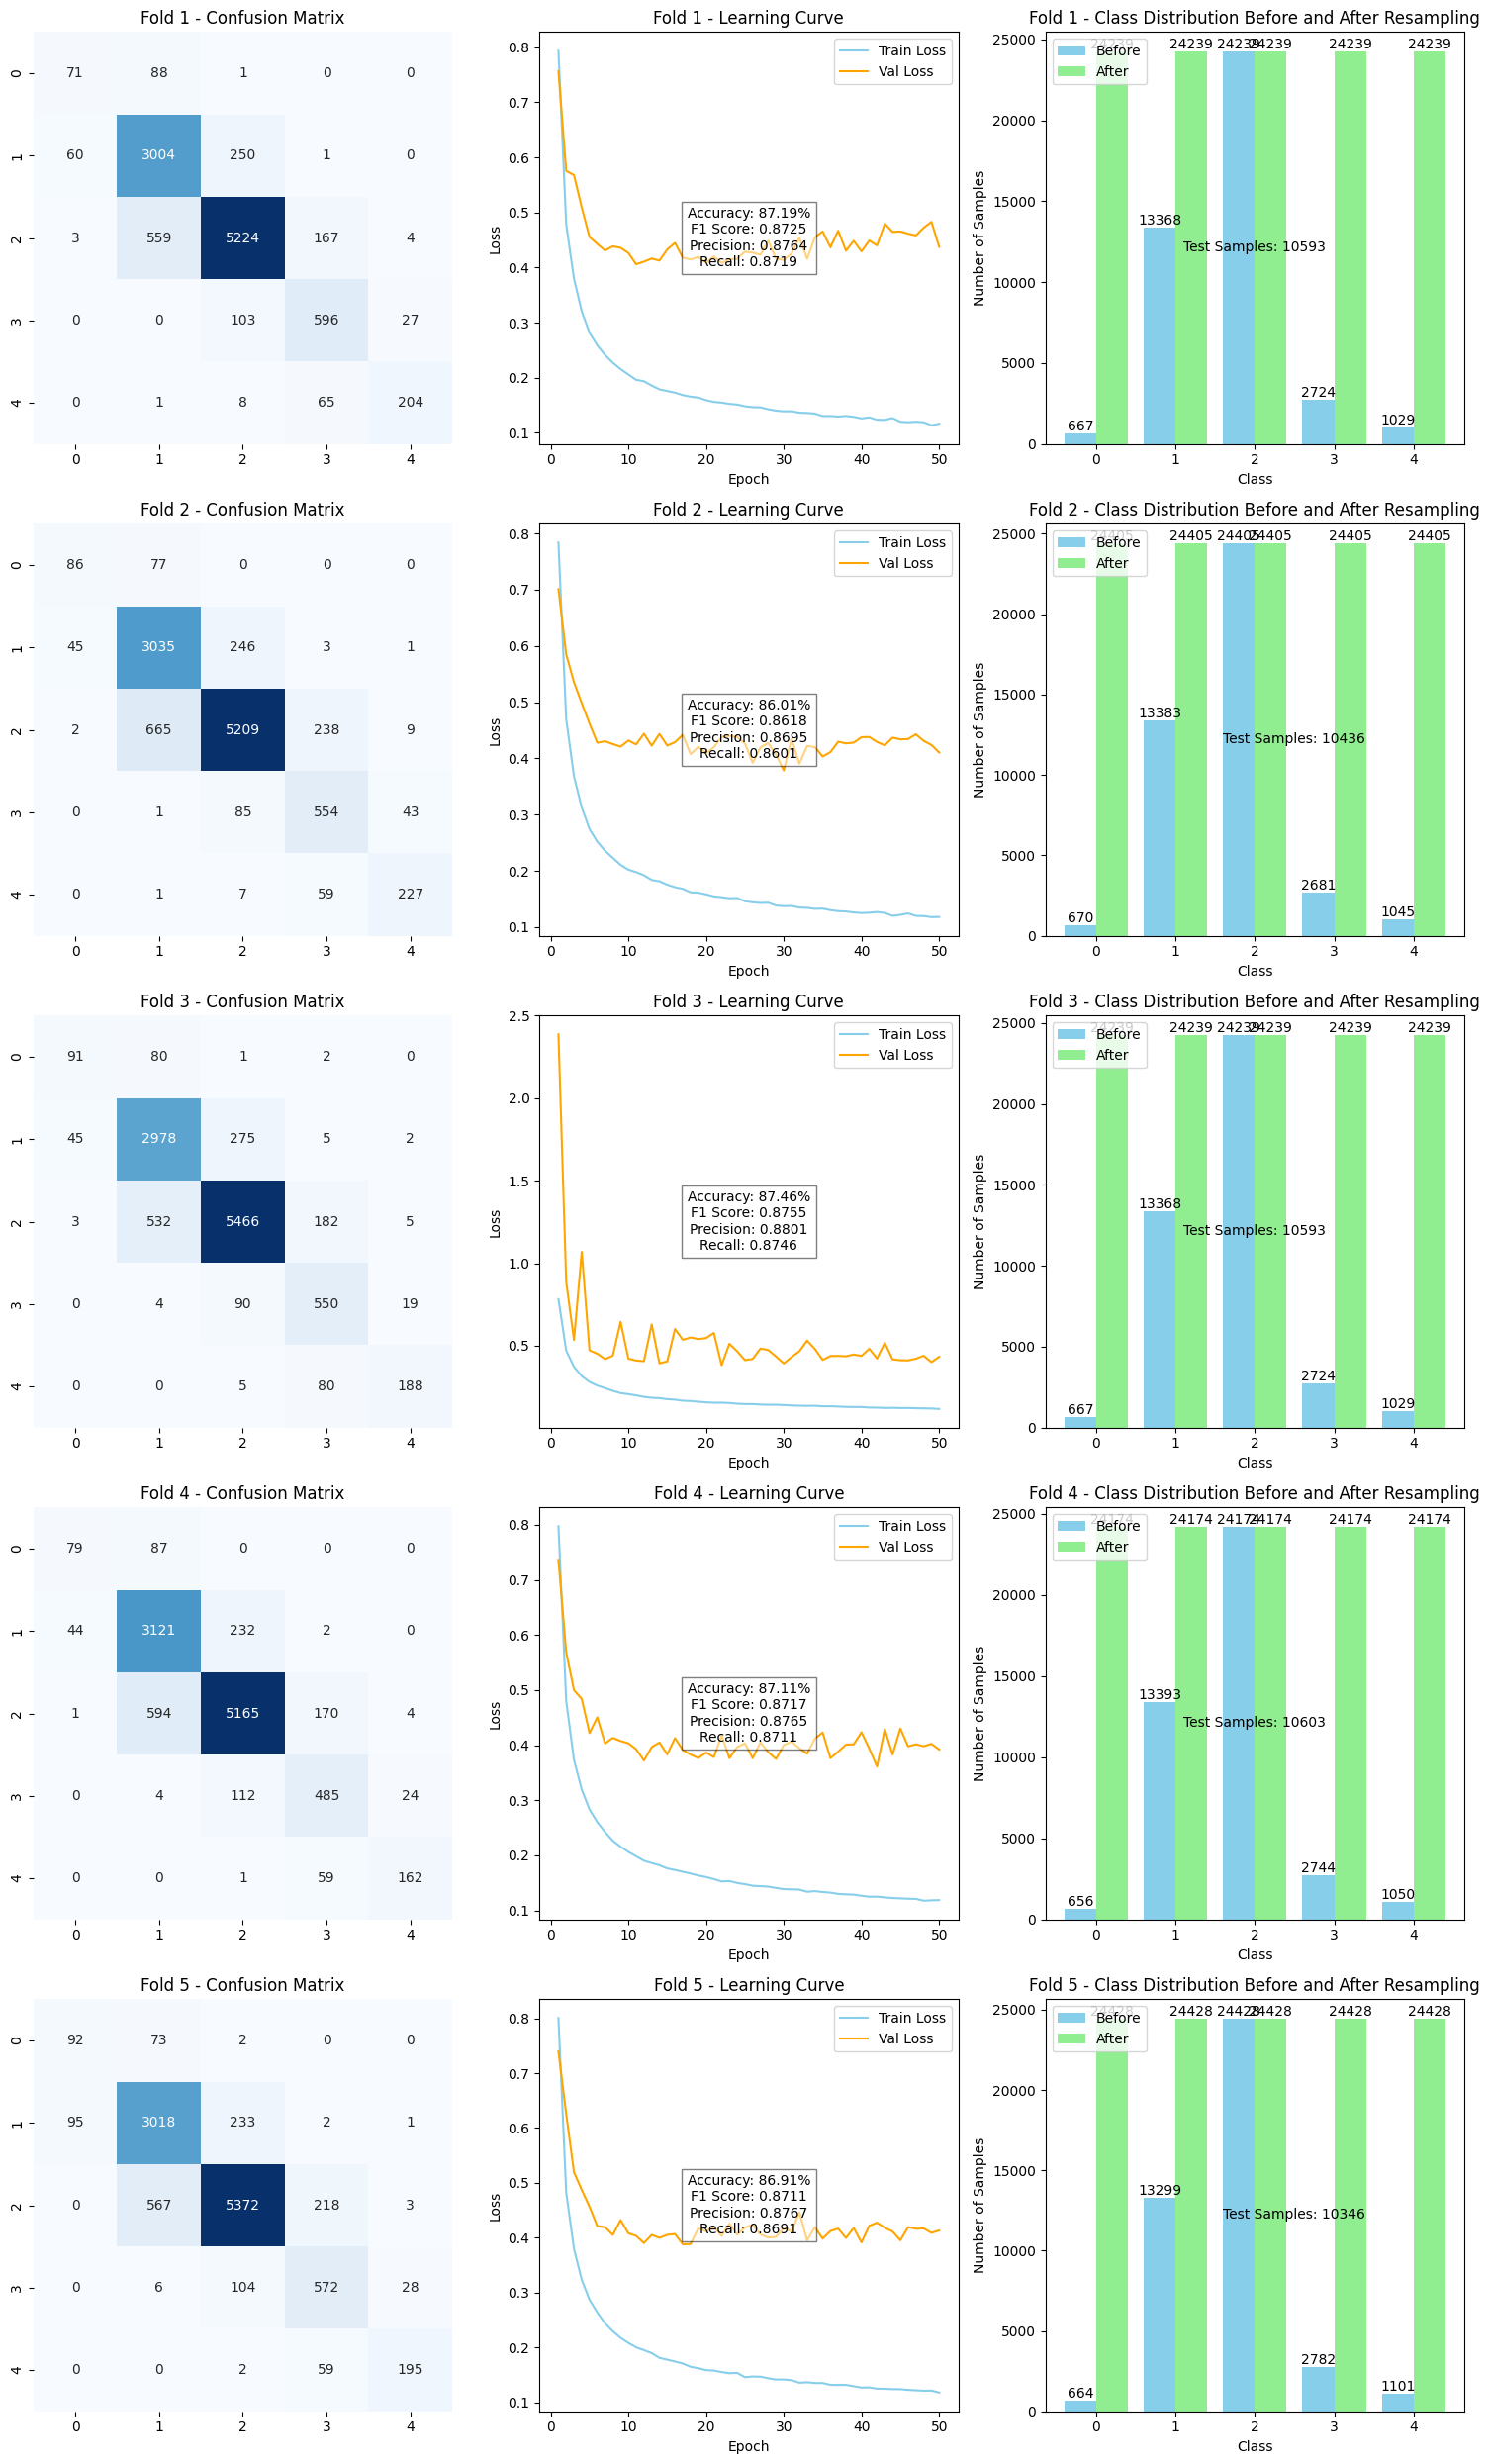

In [43]:
import seaborn as sns
from collections import Counter

fig, axes = plt.subplots(nrows=num_folds, ncols=3, figsize=(15, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = bi2_conf_mat_list[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Learning Curve (Training)
    ax2 = axes[fold, 1]
    ax2.plot(range(1, len(bi2_all_train_loss[fold]) + 1), bi2_all_train_loss[fold], color='skyblue', label='Train Loss')
    ax2.plot(range(1, len(bi2_all_val_loss[fold]) + 1), bi2_all_val_loss[fold], color='orange', label='Val Loss')

    ax2.set_title(f'Fold {fold + 1} - Learning Curve')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    # Annotate with final values
    ax2.text(0.5, 0.5, f'Accuracy: {bi2_accuracy_per_fold[fold]*100:.2f}%\nF1 Score: {bi2_f1_per_fold[fold]:.4f}\nPrecision: {bi2_precision_per_fold[fold]:.4f}\nRecall: {bi2_recall_per_fold[fold]:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.5))

    # Subplot 3: Original vs. Resampled Train Samples
    ax3 = axes[fold, 2]

    original_label_counts = Counter(bi2_y_train_before_resampled[fold])
    resampled_label_counts = Counter(bi2_y_train_after_resampled[fold])

    original_classes = list(original_label_counts.keys())
    resampled_classes = list(resampled_label_counts.keys())

    ax3.bar([cls - 0.2 for cls in original_classes], original_label_counts.values(), width=0.4, color='skyblue', label='Before')
    ax3.bar([cls + 0.2 for cls in resampled_classes], resampled_label_counts.values(), width=0.4, color='lightgreen', label='After')

    ax3.set_title(f'Fold {fold + 1} - Class Distribution Before and After Resampling')
    ax3.set_xlabel('Class')
    ax3.set_ylabel('Number of Samples')
    ax3.set_xticks(resampled_classes)
    ax3.legend()

    # Add text labels for each class in train set
    for cls, count in original_label_counts.items():
        ax3.text(cls - 0.2, count + 2, str(count), ha='center', va='bottom')

    for cls, count in resampled_label_counts.items():
        ax3.text(cls + 0.2, count + 2, str(count), ha='center', va='bottom')

    # Add text label for the number of test samples in the center
    center_x = 0.5 * (resampled_classes[-1] - original_classes[0]) + original_classes[0]
    center_y = 0.5 * (max(max(original_label_counts.values()), max(resampled_label_counts.values())))
    ax3.text(center_x, center_y, f'Test Samples: {bi2_test_sample_list[fold]}', ha='center', va='center')

# Display the subplots
plt.tight_layout()
plt.show()


## **Binary2 + RUS**

In [44]:
bi2_X = bi2.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','L1:eGFR','Stage'], axis=1)
bi2_y = bi2['Stage']

In [45]:
bi2_label_encoder = LabelEncoder()
bi2['Group'] = bi2_label_encoder.fit_transform(bi2['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
bi2_all_folds = bi2['Fold'].unique()

bi2_accuracy_per_fold = []
bi2_conf_mat_list = []

bi2_precision_per_fold = []
bi2_recall_per_fold = []
bi2_f1_per_fold = []

bi2_loss_per_fold = []
bi2_all_train_loss = []
bi2_all_val_loss = []

bi2_X_train_before_resampled = []
bi2_y_train_before_resampled = []

bi2_X_train_after_resampled = []
bi2_y_train_after_resampled = []

bi2_test_sample_list = []

# Create an instance of SMOTE
bi2_smote = SMOTE()

undersample = RandomUnderSampler()

In [46]:
for fold, (train_folds, test_fold) in enumerate(kf.split(bi2_all_folds)):
    train_folds = bi2_all_folds[train_folds]
    test_fold = bi2_all_folds[test_fold][0]
    train_indices = bi2['Fold'].isin(train_folds)
    test_indices = bi2['Fold'] == test_fold

    bi2_X_train, bi2_X_test = bi2_X[train_indices], bi2_X[test_indices]
    bi2_y_train, bi2_y_test = bi2_y[train_indices], bi2_y[test_indices]

    # Store the original X_train and y_train
    bi2_X_train_before_resampled.append(bi2_X_train)
    bi2_y_train_before_resampled.append(bi2_y_train)

    # Apply SMOTE only on the training data
    bi2_X_train_resampled, bi2_y_train_resampled = undersample.fit_resample(bi2_X_train, bi2_y_train)

    # Store the resampled X_train and y_train
    bi2_X_train_after_resampled.append(bi2_X_train_resampled)
    bi2_y_train_after_resampled.append(bi2_y_train_resampled)

    # Store the number of test samples
    bi2_test_sample_list.append(len(bi2_X_test))

    # Scale
    bi2_scaler = StandardScaler()
    bi2_X_train_scaled = bi2_scaler.fit_transform(bi2_X_train_resampled)
    bi2_X_test_scaled = bi2_scaler.transform(bi2_X_test)

    # Encode y_train and y_test
    num_classes = len(np.unique(bi2_y_train_resampled))  # Calculate the actual number of classes
    bi2_y_train_one_hot = tf.keras.utils.to_categorical(bi2_y_train_resampled, num_classes=num_classes)
    bi2_y_test_one_hot = tf.keras.utils.to_categorical(bi2_y_test, num_classes=num_classes)

    # Build and compile the model
    bi2_model = Sequential([
        Dense(256, input_dim=bi2_X_train_scaled.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(5, activation='softmax')
    ])

    bi2_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    bi2_model.compile(optimizer=bi2_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    bi2_history = bi2_model.fit(bi2_X_train_scaled, bi2_y_train_one_hot,
                                batch_size=128,
                                epochs=50,
                                verbose=0,
                                validation_data=(bi2_X_test_scaled, bi2_y_test_one_hot))

    # Evaluate on the test set
    bi2_scores = bi2_model.evaluate(bi2_X_test_scaled, bi2_y_test_one_hot, verbose=0)
    bi2_loss_per_fold.append(bi2_scores[0])

    # Store metrics for analysis
    bi2_all_train_loss.append(bi2_history.history['loss'])
    bi2_all_val_loss.append(bi2_history.history['val_loss'])

    bi2_y_pred = bi2_model.predict(bi2_X_test_scaled)
    bi2_y_pred_classes = np.argmax(bi2_y_pred, axis=1)
    bi2_conf_mat = confusion_matrix(bi2_y_test, bi2_y_pred_classes)
    bi2_conf_mat_list.append(bi2_conf_mat)

    bi2_accuracy = accuracy_score(bi2_y_test, bi2_y_pred_classes)
    bi2_precision = precision_score(bi2_y_test, bi2_y_pred_classes, average='weighted')
    bi2_recall = recall_score(bi2_y_test, bi2_y_pred_classes, average='weighted')
    bi2_f1 = f1_score(bi2_y_test, bi2_y_pred_classes, average='weighted')

    bi2_accuracy_per_fold.append(bi2_accuracy)
    bi2_precision_per_fold.append(bi2_precision)
    bi2_recall_per_fold.append(bi2_recall)
    bi2_f1_per_fold.append(bi2_f1)

    print(f"Table: bi2, Fold {fold + 1} - Loss: {bi2_loss_per_fold[-1]:.4f}, Accuracy: {bi2_accuracy_per_fold[-1] * 100:.2f}%")
    print(f"Precision: {bi2_precision_per_fold[-1]:.4f}, Recall: {bi2_recall_per_fold[-1]:.4f}, F1-Score: {bi2_f1_per_fold[-1]:.4f}")


332/332 [==============================] - 1s 2ms/step
Table: bi2, Fold 1 - Loss: 1.1949, Accuracy: 61.73%
Precision: 0.6944, Recall: 0.6173, F1-Score: 0.6379
324/324 [==============================] - 1s 2ms/step
Table: bi2, Fold 2 - Loss: 1.1751, Accuracy: 63.15%
Precision: 0.6998, Recall: 0.6315, F1-Score: 0.6459
332/332 [==============================] - 1s 1ms/step
Table: bi2, Fold 3 - Loss: 1.5964, Accuracy: 61.23%
Precision: 0.6898, Recall: 0.6123, F1-Score: 0.6343
327/327 [==============================] - 1s 1ms/step
Table: bi2, Fold 4 - Loss: 1.0834, Accuracy: 62.66%
Precision: 0.6870, Recall: 0.6266, F1-Score: 0.6414
333/333 [==============================] - 1s 2ms/step
Table: bi2, Fold 5 - Loss: 1.2349, Accuracy: 62.62%
Precision: 0.6907, Recall: 0.6262, F1-Score: 0.6454


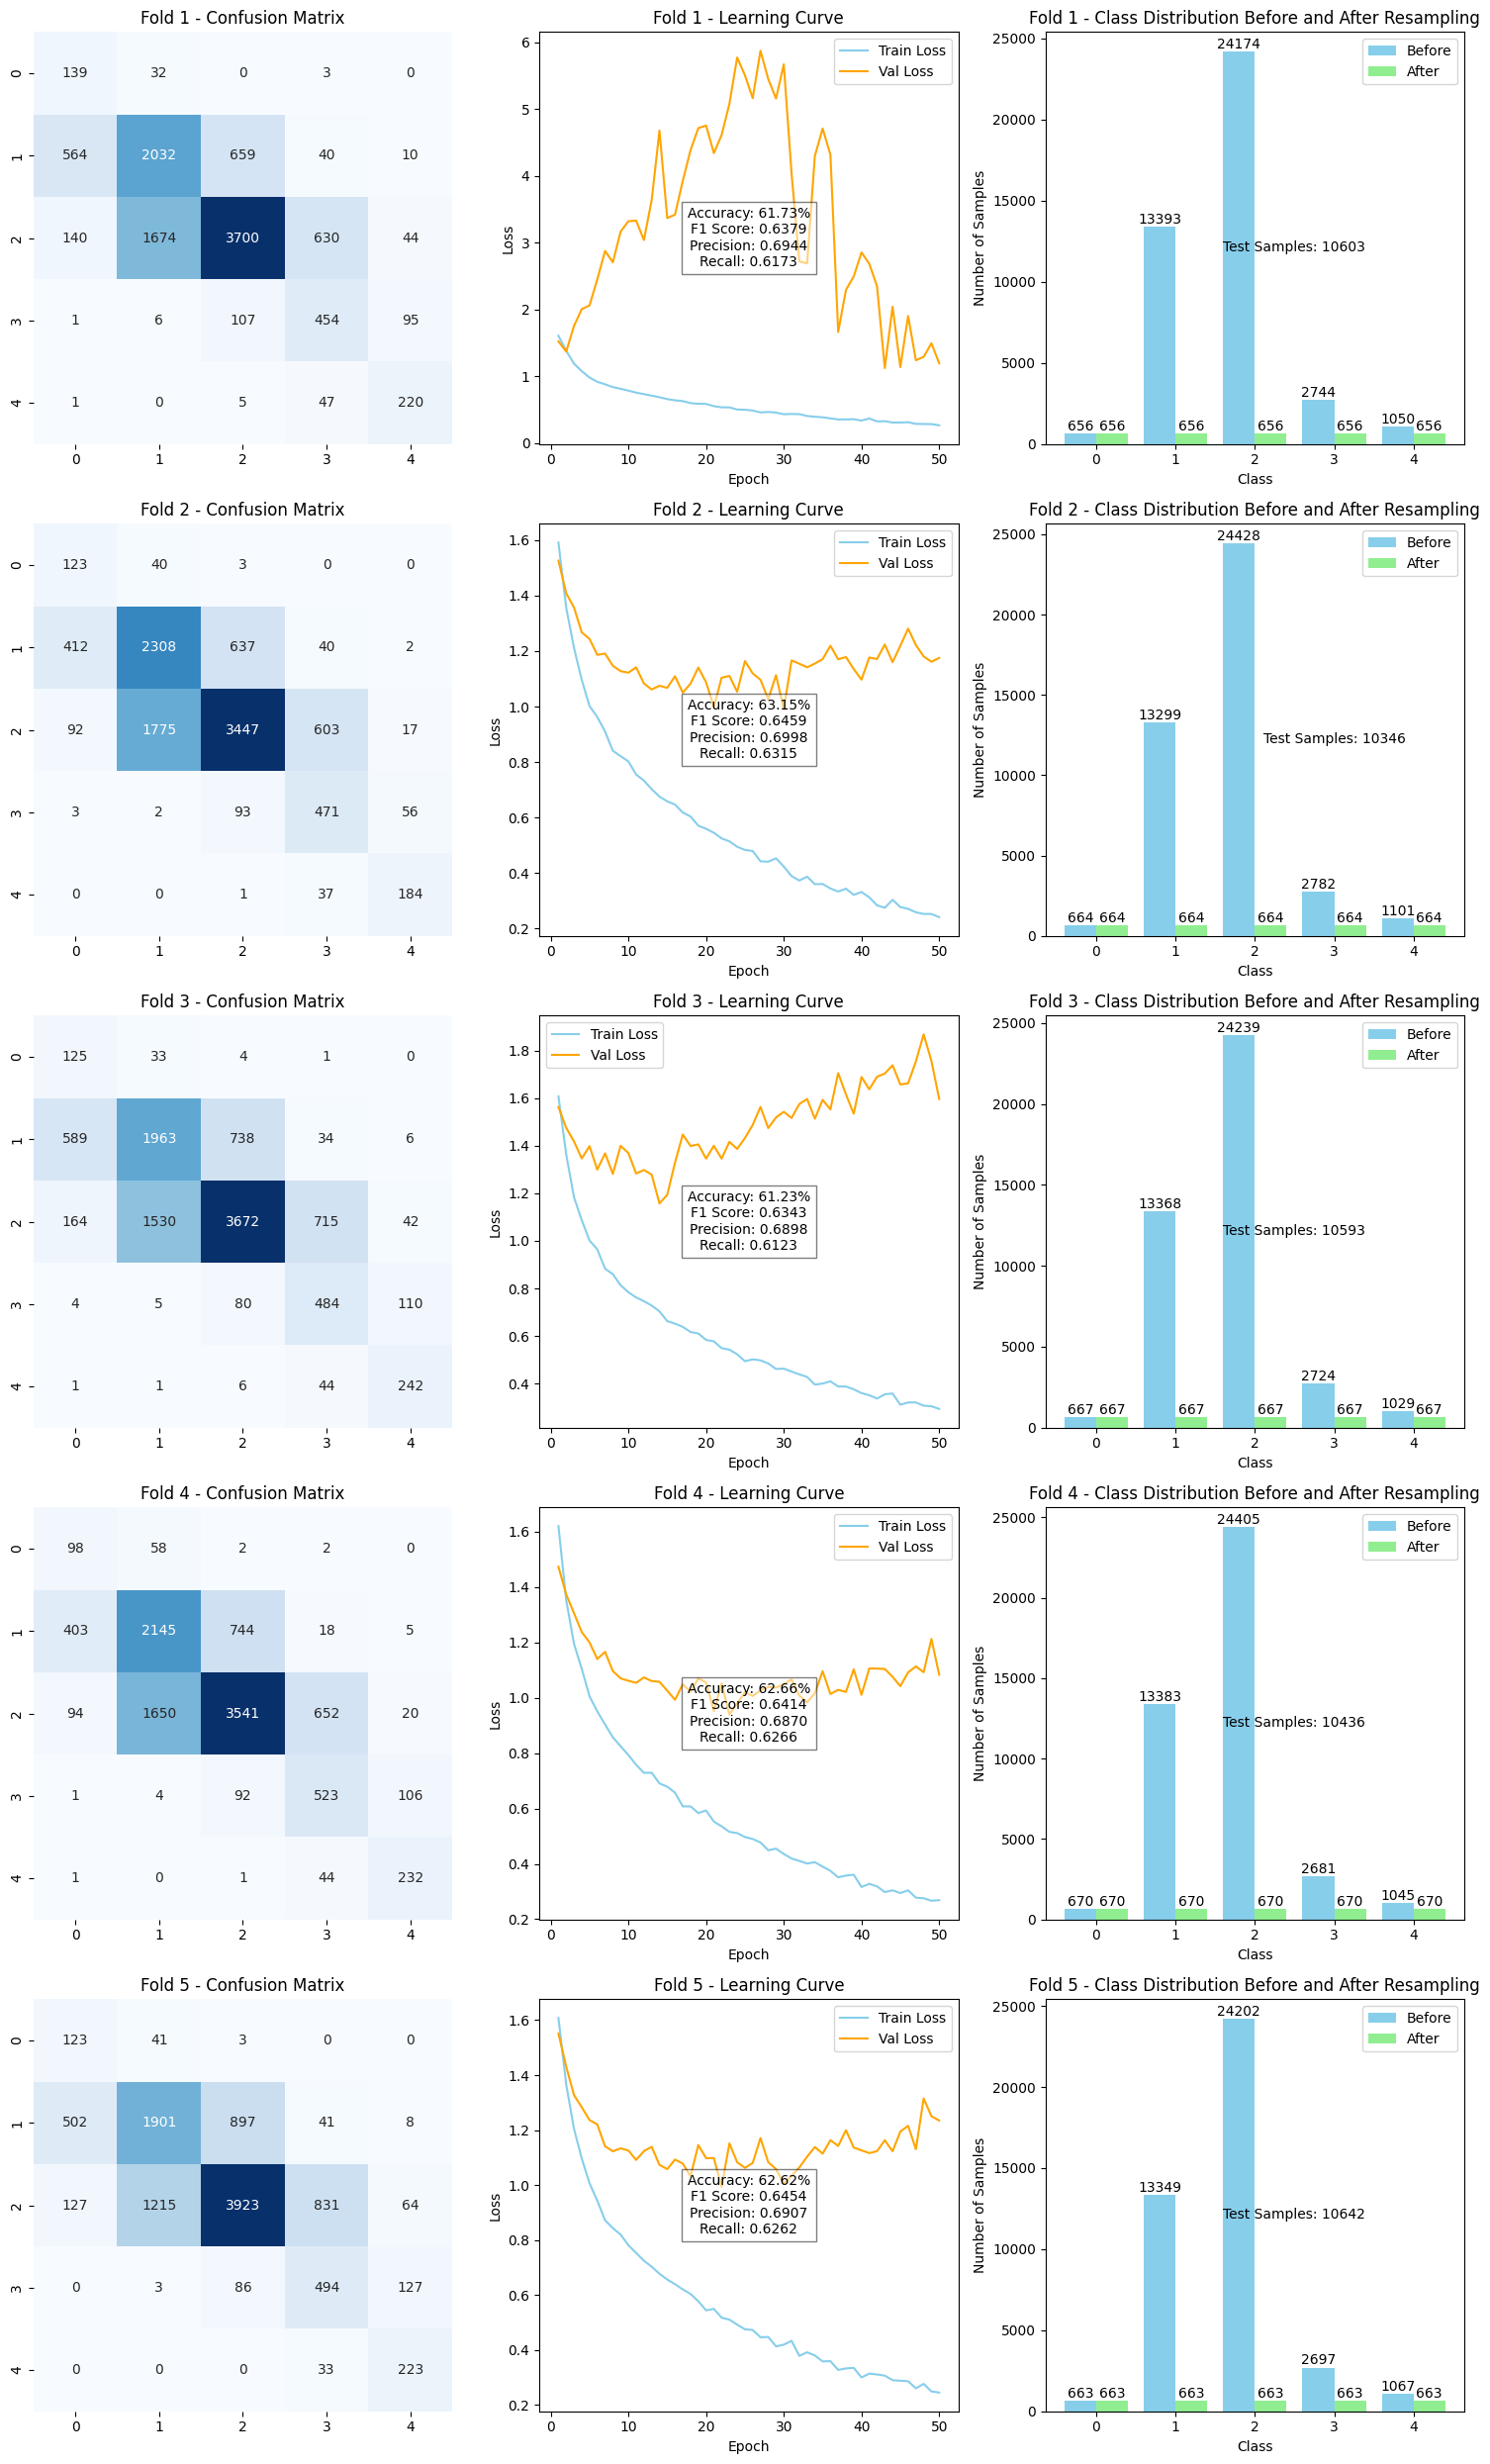

In [47]:
import seaborn as sns
from collections import Counter

fig, axes = plt.subplots(nrows=num_folds, ncols=3, figsize=(15, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = bi2_conf_mat_list[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Learning Curve (Training)
    ax2 = axes[fold, 1]
    ax2.plot(range(1, len(bi2_all_train_loss[fold]) + 1), bi2_all_train_loss[fold], color='skyblue', label='Train Loss')
    ax2.plot(range(1, len(bi2_all_val_loss[fold]) + 1), bi2_all_val_loss[fold], color='orange', label='Val Loss')

    ax2.set_title(f'Fold {fold + 1} - Learning Curve')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    # Annotate with final values
    ax2.text(0.5, 0.5, f'Accuracy: {bi2_accuracy_per_fold[fold]*100:.2f}%\nF1 Score: {bi2_f1_per_fold[fold]:.4f}\nPrecision: {bi2_precision_per_fold[fold]:.4f}\nRecall: {bi2_recall_per_fold[fold]:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.5))

    # Subplot 3: Original vs. Resampled Train Samples
    ax3 = axes[fold, 2]

    original_label_counts = Counter(bi2_y_train_before_resampled[fold])
    resampled_label_counts = Counter(bi2_y_train_after_resampled[fold])

    original_classes = list(original_label_counts.keys())
    resampled_classes = list(resampled_label_counts.keys())

    ax3.bar([cls - 0.2 for cls in original_classes], original_label_counts.values(), width=0.4, color='skyblue', label='Before')
    ax3.bar([cls + 0.2 for cls in resampled_classes], resampled_label_counts.values(), width=0.4, color='lightgreen', label='After')

    ax3.set_title(f'Fold {fold + 1} - Class Distribution Before and After Resampling')
    ax3.set_xlabel('Class')
    ax3.set_ylabel('Number of Samples')
    ax3.set_xticks(resampled_classes)
    ax3.legend()

    # Add text labels for each class in train set
    for cls, count in original_label_counts.items():
        ax3.text(cls - 0.2, count + 2, str(count), ha='center', va='bottom')

    for cls, count in resampled_label_counts.items():
        ax3.text(cls + 0.2, count + 2, str(count), ha='center', va='bottom')

    # Add text label for the number of test samples in the center
    center_x = 0.5 * (resampled_classes[-1] - original_classes[0]) + original_classes[0]
    center_y = 0.5 * (max(max(original_label_counts.values()), max(resampled_label_counts.values())))
    ax3.text(center_x, center_y, f'Test Samples: {bi2_test_sample_list[fold]}', ha='center', va='center')

# Display the subplots
plt.tight_layout()
plt.show()


## **Binary2 + SMOTE**

In [48]:
bi2_X = bi2.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','L1:eGFR','Stage'], axis=1)
bi2_y = bi2['Stage']

In [49]:
bi2_label_encoder = LabelEncoder()
bi2['Group'] = bi2_label_encoder.fit_transform(bi2['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
bi2_all_folds = bi2['Fold'].unique()

bi2_accuracy_per_fold = []
bi2_conf_mat_list = []

bi2_precision_per_fold = []
bi2_recall_per_fold = []
bi2_f1_per_fold = []

bi2_loss_per_fold = []
bi2_all_train_loss = []
bi2_all_val_loss = []

bi2_X_train_before_resampled = []
bi2_y_train_before_resampled = []

bi2_X_train_after_resampled = []
bi2_y_train_after_resampled = []

bi2_test_sample_list = []

# Create an instance of SMOTE
bi2_smote = SMOTE()
oversample = RandomOverSampler()

In [50]:
for fold, (train_folds, test_fold) in enumerate(kf.split(bi2_all_folds)):
    train_folds = bi2_all_folds[train_folds]
    test_fold = bi2_all_folds[test_fold][0]
    train_indices = bi2['Fold'].isin(train_folds)
    test_indices = bi2['Fold'] == test_fold

    bi2_X_train, bi2_X_test = bi2_X[train_indices], bi2_X[test_indices]
    bi2_y_train, bi2_y_test = bi2_y[train_indices], bi2_y[test_indices]

    # Store the original X_train and y_train
    bi2_X_train_before_resampled.append(bi2_X_train)
    bi2_y_train_before_resampled.append(bi2_y_train)

    # Apply SMOTE only on the training data
    bi2_X_train_resampled, bi2_y_train_resampled = bi2_smote.fit_resample(bi2_X_train, bi2_y_train)

    # Store the resampled X_train and y_train
    bi2_X_train_after_resampled.append(bi2_X_train_resampled)
    bi2_y_train_after_resampled.append(bi2_y_train_resampled)

    # Store the number of test samples
    bi2_test_sample_list.append(len(bi2_X_test))

    # Scale
    bi2_scaler = StandardScaler()
    bi2_X_train_scaled = bi2_scaler.fit_transform(bi2_X_train_resampled)
    bi2_X_test_scaled = bi2_scaler.transform(bi2_X_test)

    # Encode y_train and y_test
    num_classes = len(np.unique(bi2_y_train_resampled))  # Calculate the actual number of classes
    bi2_y_train_one_hot = tf.keras.utils.to_categorical(bi2_y_train_resampled, num_classes=num_classes)
    bi2_y_test_one_hot = tf.keras.utils.to_categorical(bi2_y_test, num_classes=num_classes)

    # Build and compile the model
    bi2_model = Sequential([
        Dense(256, input_dim=bi2_X_train_scaled.shape[1], activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(5, activation='softmax')
    ])

    bi2_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    bi2_model.compile(optimizer=bi2_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    bi2_history = bi2_model.fit(bi2_X_train_scaled, bi2_y_train_one_hot,
                                batch_size=128,
                                epochs=50,
                                verbose=0,
                                validation_data=(bi2_X_test_scaled, bi2_y_test_one_hot))

    # Evaluate on the test set
    bi2_scores = bi2_model.evaluate(bi2_X_test_scaled, bi2_y_test_one_hot, verbose=0)
    bi2_loss_per_fold.append(bi2_scores[0])

    # Store metrics for analysis
    bi2_all_train_loss.append(bi2_history.history['loss'])
    bi2_all_val_loss.append(bi2_history.history['val_loss'])

    bi2_y_pred = bi2_model.predict(bi2_X_test_scaled)
    bi2_y_pred_classes = np.argmax(bi2_y_pred, axis=1)
    bi2_conf_mat = confusion_matrix(bi2_y_test, bi2_y_pred_classes)
    bi2_conf_mat_list.append(bi2_conf_mat)

    bi2_accuracy = accuracy_score(bi2_y_test, bi2_y_pred_classes)
    bi2_precision = precision_score(bi2_y_test, bi2_y_pred_classes, average='weighted')
    bi2_recall = recall_score(bi2_y_test, bi2_y_pred_classes, average='weighted')
    bi2_f1 = f1_score(bi2_y_test, bi2_y_pred_classes, average='weighted')

    bi2_accuracy_per_fold.append(bi2_accuracy)
    bi2_precision_per_fold.append(bi2_precision)
    bi2_recall_per_fold.append(bi2_recall)
    bi2_f1_per_fold.append(bi2_f1)

    print(f"Table: bi2, Fold {fold + 1} - Loss: {bi2_loss_per_fold[-1]:.4f}, Accuracy: {bi2_accuracy_per_fold[-1] * 100:.2f}%")
    print(f"Precision: {bi2_precision_per_fold[-1]:.4f}, Recall: {bi2_recall_per_fold[-1]:.4f}, F1-Score: {bi2_f1_per_fold[-1]:.4f}")


333/333 [==============================] - 1s 1ms/step
Table: bi2, Fold 1 - Loss: 0.3528, Accuracy: 86.36%
Precision: 0.8682, Recall: 0.8636, F1-Score: 0.8646
327/327 [==============================] - 1s 2ms/step
Table: bi2, Fold 2 - Loss: 0.3776, Accuracy: 86.06%
Precision: 0.8629, Recall: 0.8606, F1-Score: 0.8610
324/324 [==============================] - 1s 2ms/step
Table: bi2, Fold 3 - Loss: 0.3545, Accuracy: 85.63%
Precision: 0.8642, Recall: 0.8563, F1-Score: 0.8577
332/332 [==============================] - 1s 2ms/step
Table: bi2, Fold 4 - Loss: 0.3731, Accuracy: 86.70%
Precision: 0.8716, Recall: 0.8670, F1-Score: 0.8678
332/332 [==============================] - 1s 1ms/step
Table: bi2, Fold 5 - Loss: 0.3546, Accuracy: 86.27%
Precision: 0.8690, Recall: 0.8627, F1-Score: 0.8645


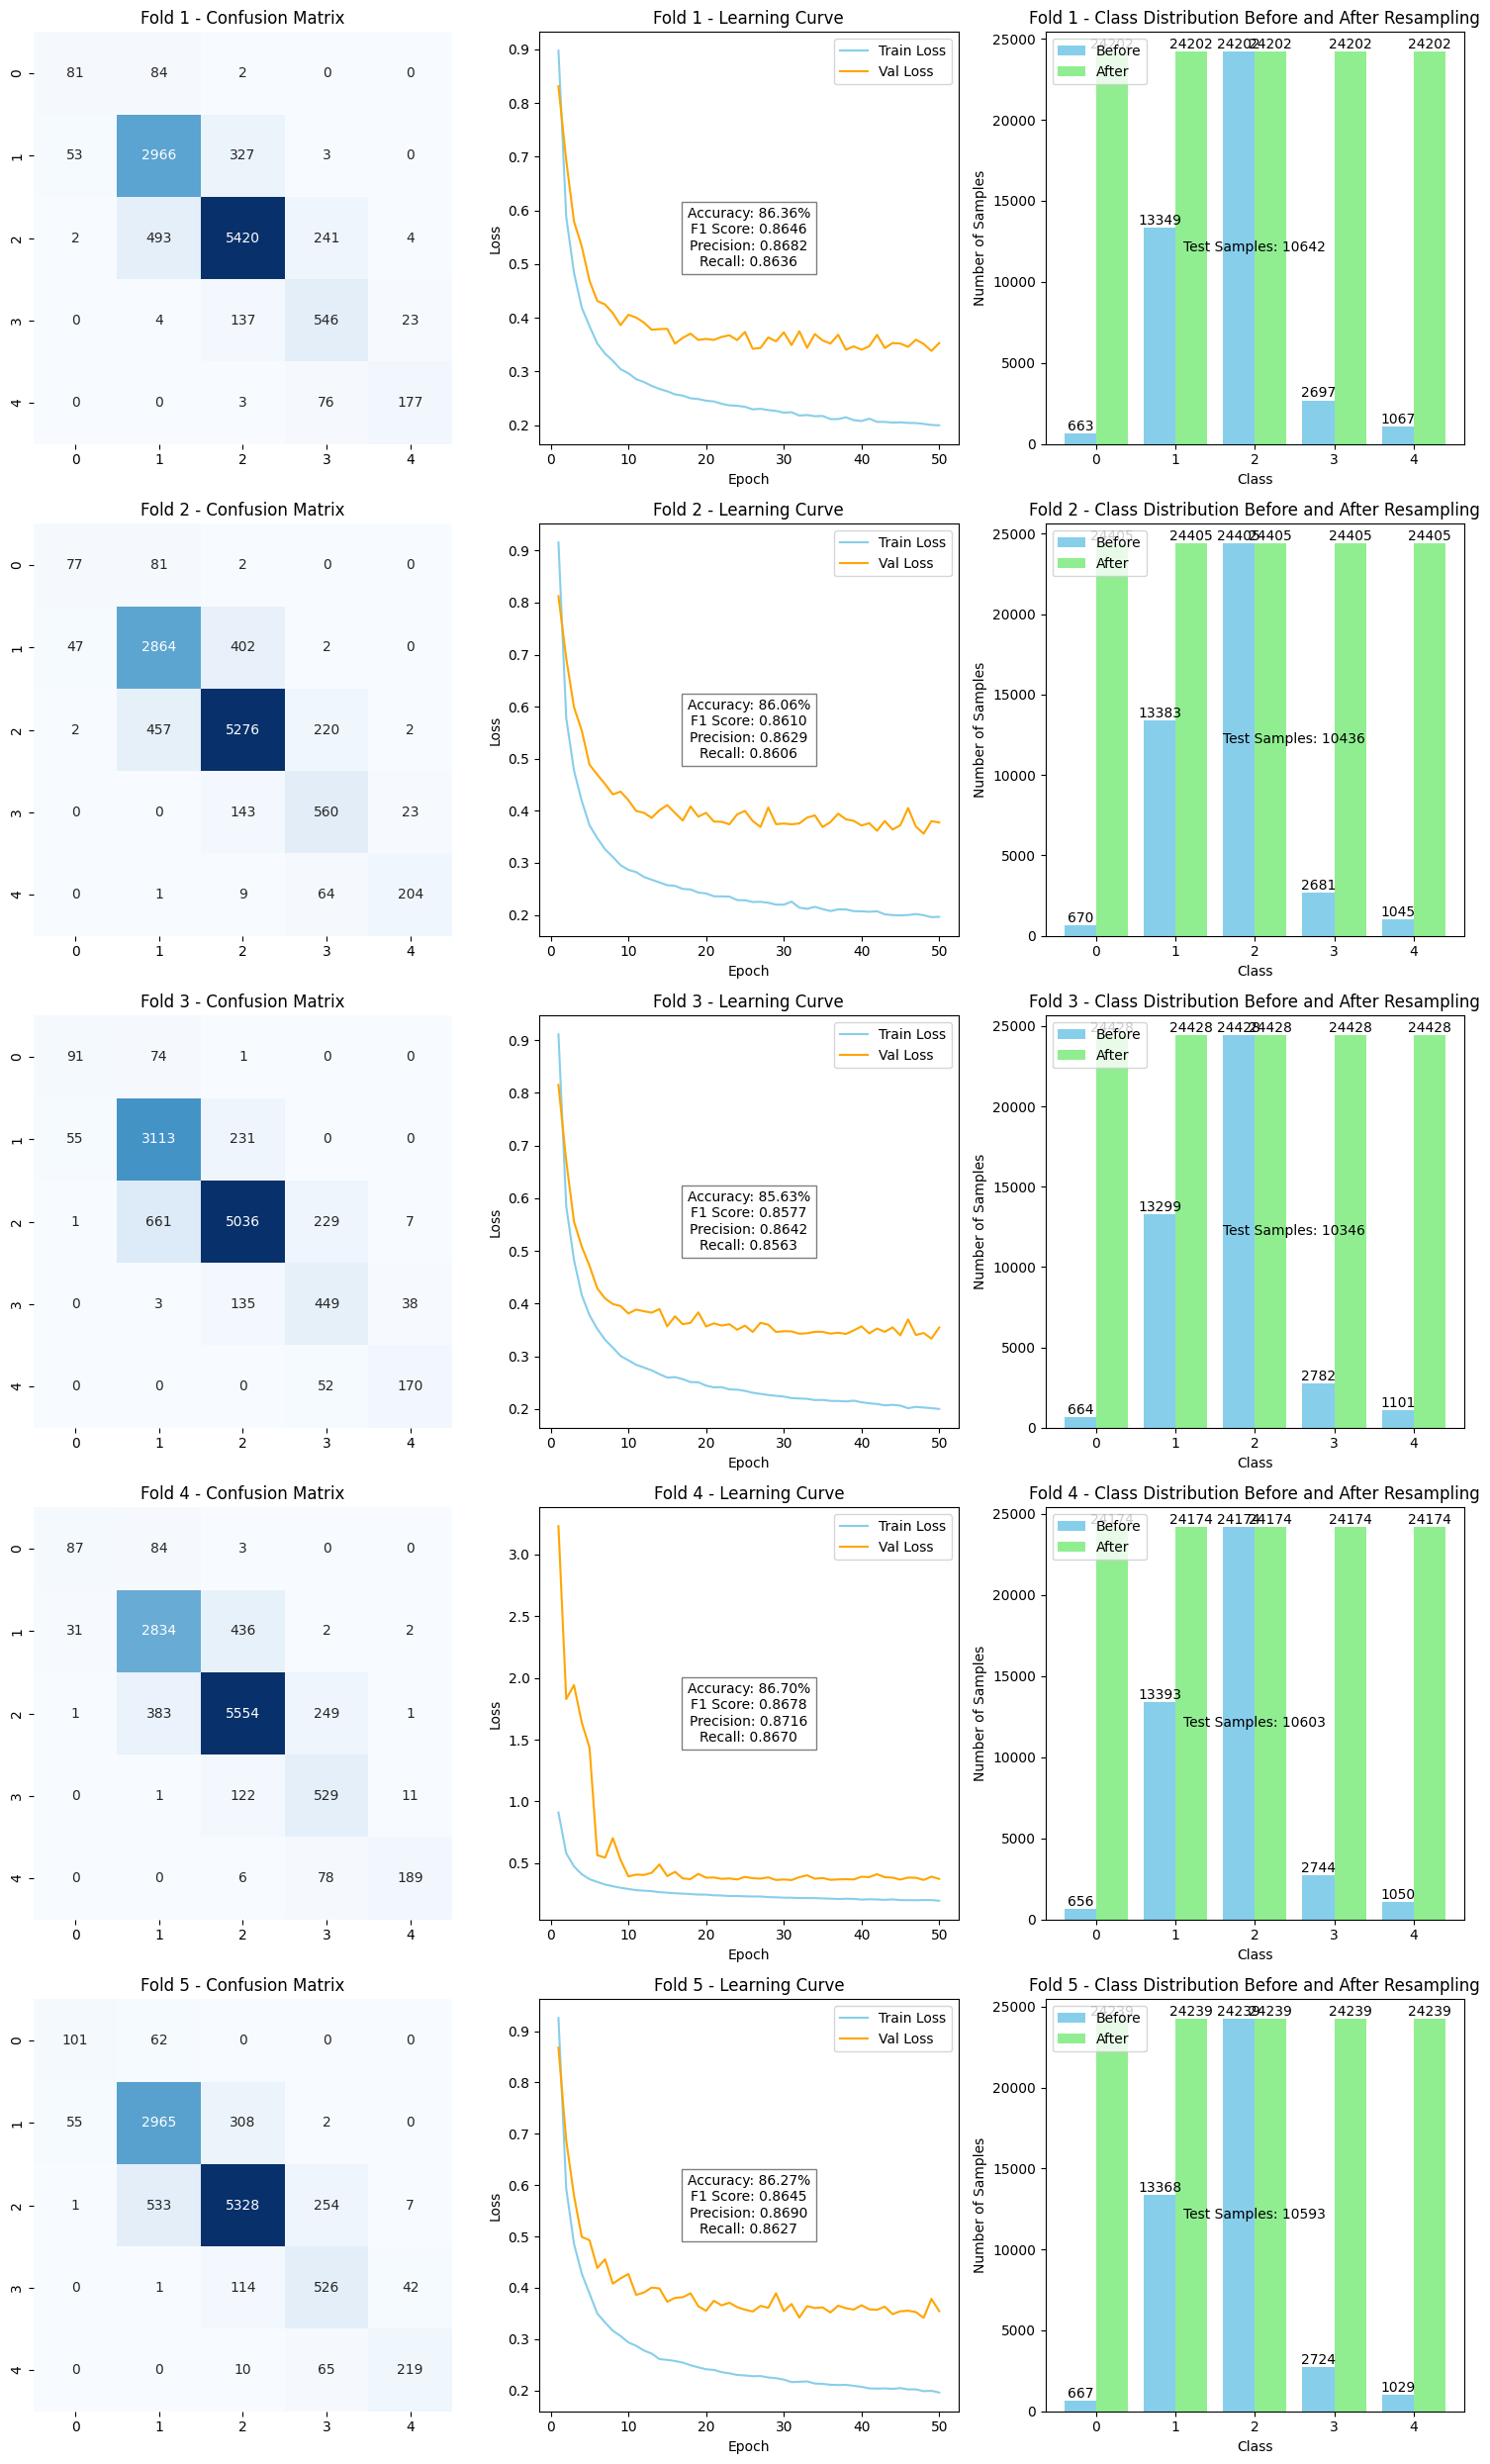

In [51]:
import seaborn as sns
from collections import Counter

fig, axes = plt.subplots(nrows=num_folds, ncols=3, figsize=(15, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = bi2_conf_mat_list[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Learning Curve (Training)
    ax2 = axes[fold, 1]
    ax2.plot(range(1, len(bi2_all_train_loss[fold]) + 1), bi2_all_train_loss[fold], color='skyblue', label='Train Loss')
    ax2.plot(range(1, len(bi2_all_val_loss[fold]) + 1), bi2_all_val_loss[fold], color='orange', label='Val Loss')

    ax2.set_title(f'Fold {fold + 1} - Learning Curve')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    # Annotate with final values
    ax2.text(0.5, 0.5, f'Accuracy: {bi2_accuracy_per_fold[fold]*100:.2f}%\nF1 Score: {bi2_f1_per_fold[fold]:.4f}\nPrecision: {bi2_precision_per_fold[fold]:.4f}\nRecall: {bi2_recall_per_fold[fold]:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.5))

    # Subplot 3: Original vs. Resampled Train Samples
    ax3 = axes[fold, 2]

    original_label_counts = Counter(bi2_y_train_before_resampled[fold])
    resampled_label_counts = Counter(bi2_y_train_after_resampled[fold])

    original_classes = list(original_label_counts.keys())
    resampled_classes = list(resampled_label_counts.keys())

    ax3.bar([cls - 0.2 for cls in original_classes], original_label_counts.values(), width=0.4, color='skyblue', label='Before')
    ax3.bar([cls + 0.2 for cls in resampled_classes], resampled_label_counts.values(), width=0.4, color='lightgreen', label='After')

    ax3.set_title(f'Fold {fold + 1} - Class Distribution Before and After Resampling')
    ax3.set_xlabel('Class')
    ax3.set_ylabel('Number of Samples')
    ax3.set_xticks(resampled_classes)
    ax3.legend()

    # Add text labels for each class in train set
    for cls, count in original_label_counts.items():
        ax3.text(cls - 0.2, count + 2, str(count), ha='center', va='bottom')

    for cls, count in resampled_label_counts.items():
        ax3.text(cls + 0.2, count + 2, str(count), ha='center', va='bottom')

    # Add text label for the number of test samples in the center
    center_x = 0.5 * (resampled_classes[-1] - original_classes[0]) + original_classes[0]
    center_y = 0.5 * (max(max(original_label_counts.values()), max(resampled_label_counts.values())))
    ax3.text(center_x, center_y, f'Test Samples: {bi2_test_sample_list[fold]}', ha='center', va='center')

# Display the subplots
plt.tight_layout()
plt.show()


# Binary3

## **Binary 3 + ROS**

In [52]:
bi3_X = bi3.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','L1:eGFR','Stage'], axis=1)
bi3_y = bi3['Stage']

In [53]:
bi3_label_encoder = LabelEncoder()
bi3['Group'] = bi3_label_encoder.fit_transform(bi3['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
bi3_all_folds = bi3['Fold'].unique()

bi3_accuracy_per_fold = []
bi3_conf_mat_list = []

bi3_precision_per_fold = []
bi3_recall_per_fold = []
bi3_f1_per_fold = []

bi3_loss_per_fold = []
bi3_all_train_loss = []
bi3_all_val_loss = []

bi3_X_train_before_resampled = []
bi3_y_train_before_resampled = []

bi3_X_train_after_resampled = []
bi3_y_train_after_resampled = []

bi3_test_sample_list = []

bi3_smote = SMOTE()
oversample = RandomOverSampler()
undersample = RandomUnderSampler()

In [54]:
for fold, (train_folds, test_fold) in enumerate(kf.split(bi3_all_folds)):
    train_folds = bi3_all_folds[train_folds]
    test_fold = bi3_all_folds[test_fold][0]
    train_indices = bi3['Fold'].isin(train_folds)
    test_indices = bi3['Fold'] == test_fold

    bi3_X_train, bi3_X_test = bi3_X[train_indices], bi3_X[test_indices]
    bi3_y_train, bi3_y_test = bi3_y[train_indices], bi3_y[test_indices]

    # Store the original X_train and y_train
    bi3_X_train_before_resampled.append(bi3_X_train)
    bi3_y_train_before_resampled.append(bi3_y_train)

    # Apply SMOTE only on the training data
    bi3_X_train_resampled, bi3_y_train_resampled = oversample.fit_resample(bi3_X_train, bi3_y_train)

    # Store the resampled X_train and y_train
    bi3_X_train_after_resampled.append(bi3_X_train_resampled)
    bi3_y_train_after_resampled.append(bi3_y_train_resampled)

    # Store the number of test samples
    bi3_test_sample_list.append(len(bi3_X_test))

    # Scale
    bi3_scaler = StandardScaler()
    bi3_X_train_scaled = bi3_scaler.fit_transform(bi3_X_train_resampled)
    bi3_X_test_scaled = bi3_scaler.transform(bi3_X_test)

    # Encode y_train and y_test
    num_classes = len(np.unique(bi3_y_train_resampled))  # Calculate the actual number of classes
    bi3_y_train_one_hot = tf.keras.utils.to_categorical(bi3_y_train_resampled, num_classes=num_classes)
    bi3_y_test_one_hot = tf.keras.utils.to_categorical(bi3_y_test, num_classes=num_classes)

    # Build and compile the model
    bi3_model = Sequential([
        Dense(256, input_dim=bi3_X_train_scaled.shape[1], activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(5, activation='softmax')
    ])

    bi3_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    bi3_model.compile(optimizer=bi3_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    bi3_history = bi3_model.fit(bi3_X_train_scaled, bi3_y_train_one_hot,
                                batch_size=128,
                                epochs=50,
                                verbose=0,
                                validation_data=(bi3_X_test_scaled, bi3_y_test_one_hot))

    # Evaluate on the test set
    bi3_scores = bi3_model.evaluate(bi3_X_test_scaled, bi3_y_test_one_hot, verbose=0)
    bi3_loss_per_fold.append(bi3_scores[0])

    # Store metrics for analysis
    bi3_all_train_loss.append(bi3_history.history['loss'])
    bi3_all_val_loss.append(bi3_history.history['val_loss'])

    bi3_y_pred = bi3_model.predict(bi3_X_test_scaled)
    bi3_y_pred_classes = np.argmax(bi3_y_pred, axis=1)
    bi3_conf_mat = confusion_matrix(bi3_y_test, bi3_y_pred_classes)
    bi3_conf_mat_list.append(bi3_conf_mat)

    bi3_accuracy = accuracy_score(bi3_y_test, bi3_y_pred_classes)
    bi3_precision = precision_score(bi3_y_test, bi3_y_pred_classes, average='weighted')
    bi3_recall = recall_score(bi3_y_test, bi3_y_pred_classes, average='weighted')
    bi3_f1 = f1_score(bi3_y_test, bi3_y_pred_classes, average='weighted')

    bi3_accuracy_per_fold.append(bi3_accuracy)
    bi3_precision_per_fold.append(bi3_precision)
    bi3_recall_per_fold.append(bi3_recall)
    bi3_f1_per_fold.append(bi3_f1)

    print(f"Table: bi3, Fold {fold + 1} - Loss: {bi3_loss_per_fold[-1]:.4f}, Accuracy: {bi3_accuracy_per_fold[-1] * 100:.2f}%")
    print(f"Precision: {bi3_precision_per_fold[-1]:.4f}, Recall: {bi3_recall_per_fold[-1]:.4f}, F1-Score: {bi3_f1_per_fold[-1]:.4f}")

332/332 [==============================] - 1s 1ms/step
Table: bi3, Fold 1 - Loss: 0.4463, Accuracy: 84.75%
Precision: 0.8691, Recall: 0.8475, F1-Score: 0.8506
327/327 [==============================] - 1s 2ms/step
Table: bi3, Fold 2 - Loss: 0.4306, Accuracy: 85.84%
Precision: 0.8725, Recall: 0.8584, F1-Score: 0.8603
324/324 [==============================] - 1s 2ms/step
Table: bi3, Fold 3 - Loss: 0.4122, Accuracy: 85.66%
Precision: 0.8721, Recall: 0.8566, F1-Score: 0.8590
333/333 [==============================] - 1s 2ms/step
Table: bi3, Fold 4 - Loss: 0.3774, Accuracy: 86.54%
Precision: 0.8769, Recall: 0.8654, F1-Score: 0.8675
332/332 [==============================] - 1s 2ms/step
Table: bi3, Fold 5 - Loss: 0.4064, Accuracy: 87.08%
Precision: 0.8797, Recall: 0.8708, F1-Score: 0.8721


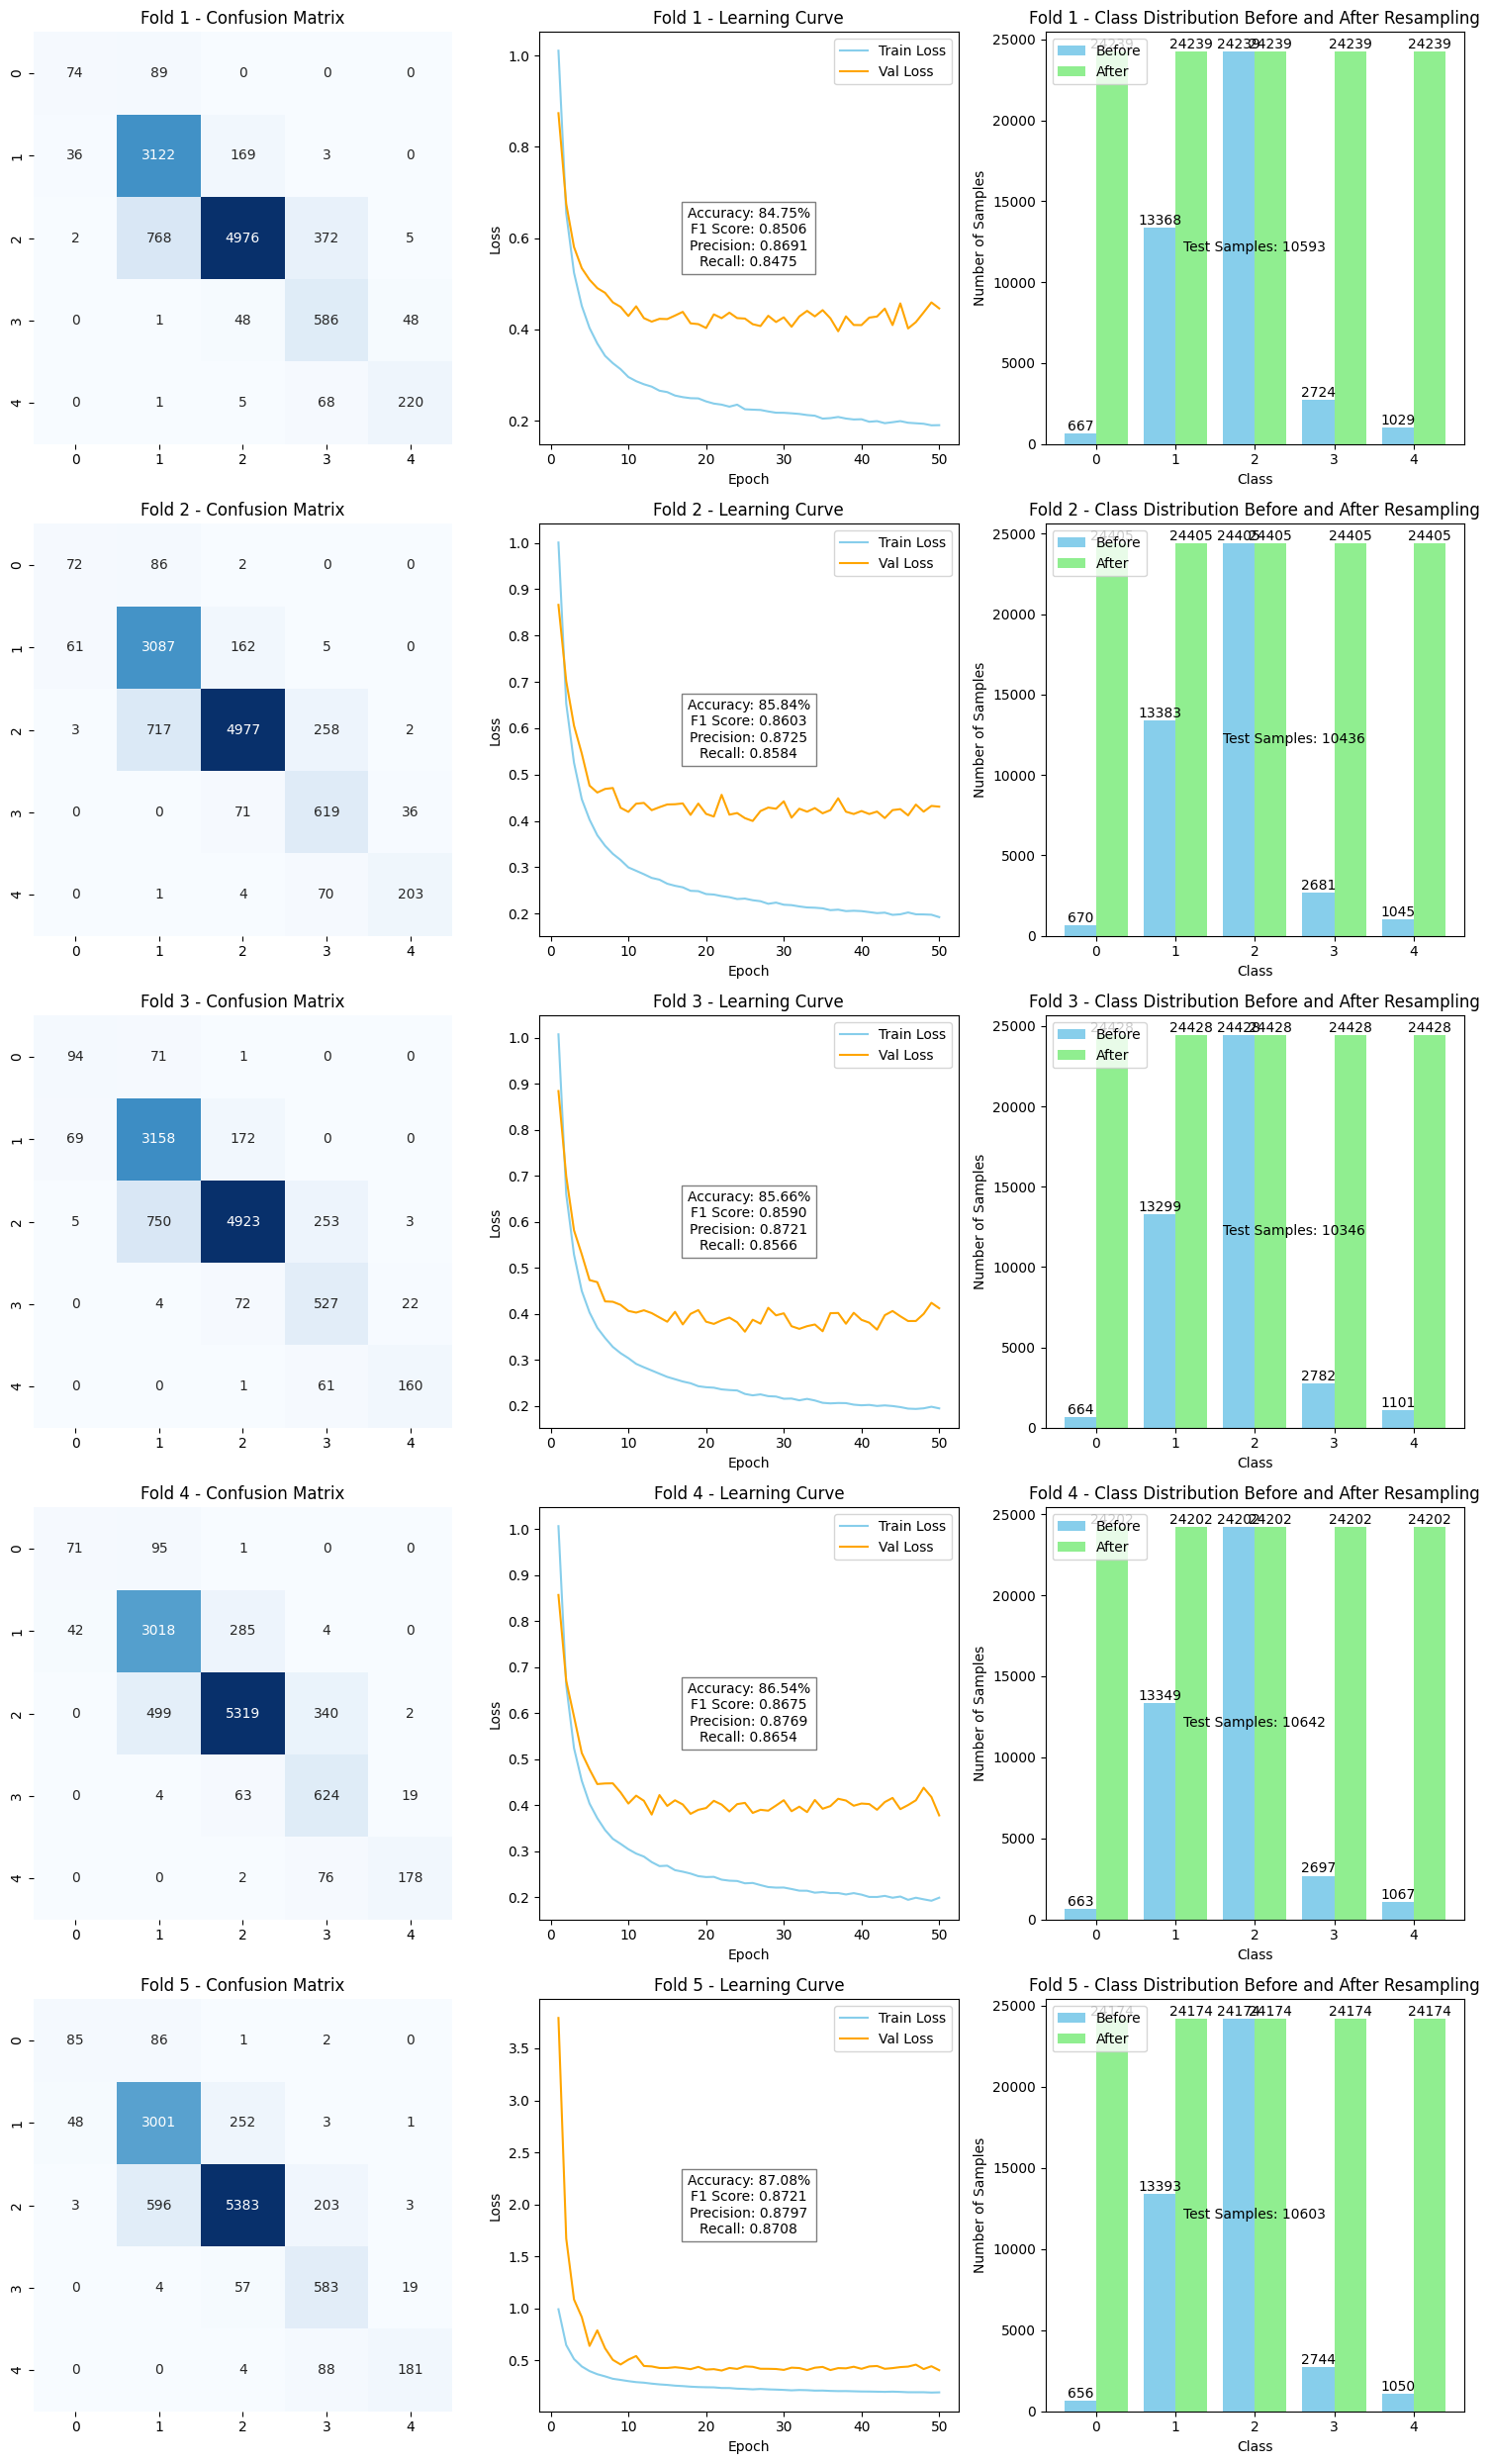

In [55]:
import seaborn as sns
from collections import Counter

fig, axes = plt.subplots(nrows=num_folds, ncols=3, figsize=(15, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = bi3_conf_mat_list[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Learning Curve (Training)
    ax2 = axes[fold, 1]
    ax2.plot(range(1, len(bi3_all_train_loss[fold]) + 1), bi3_all_train_loss[fold], color='skyblue', label='Train Loss')
    ax2.plot(range(1, len(bi3_all_val_loss[fold]) + 1), bi3_all_val_loss[fold], color='orange', label='Val Loss')

    ax2.set_title(f'Fold {fold + 1} - Learning Curve')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    # Annotate with final values
    ax2.text(0.5, 0.5, f'Accuracy: {bi3_accuracy_per_fold[fold]*100:.2f}%\nF1 Score: {bi3_f1_per_fold[fold]:.4f}\nPrecision: {bi3_precision_per_fold[fold]:.4f}\nRecall: {bi3_recall_per_fold[fold]:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.5))

    # Subplot 3: Original vs. Resampled Train Samples
    ax3 = axes[fold, 2]

    original_label_counts = Counter(bi3_y_train_before_resampled[fold])
    resampled_label_counts = Counter(bi3_y_train_after_resampled[fold])

    original_classes = list(original_label_counts.keys())
    resampled_classes = list(resampled_label_counts.keys())

    ax3.bar([cls - 0.2 for cls in original_classes], original_label_counts.values(), width=0.4, color='skyblue', label='Before')
    ax3.bar([cls + 0.2 for cls in resampled_classes], resampled_label_counts.values(), width=0.4, color='lightgreen', label='After')

    ax3.set_title(f'Fold {fold + 1} - Class Distribution Before and After Resampling')
    ax3.set_xlabel('Class')
    ax3.set_ylabel('Number of Samples')
    ax3.set_xticks(resampled_classes)
    ax3.legend()

    # Add text labels for each class in train set
    for cls, count in original_label_counts.items():
        ax3.text(cls - 0.2, count + 2, str(count), ha='center', va='bottom')

    for cls, count in resampled_label_counts.items():
        ax3.text(cls + 0.2, count + 2, str(count), ha='center', va='bottom')

    # Add text label for the number of test samples in the center
    center_x = 0.5 * (resampled_classes[-1] - original_classes[0]) + original_classes[0]
    center_y = 0.5 * (max(max(original_label_counts.values()), max(resampled_label_counts.values())))
    ax3.text(center_x, center_y, f'Test Samples: {bi3_test_sample_list[fold]}', ha='center', va='center')

# Display the subplots
plt.tight_layout()
plt.show()

## **Binary3 + RUS**

In [56]:
bi3_X = bi3.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','L1:eGFR','Stage'], axis=1)
bi3_y = bi3['Stage']

In [57]:
bi3_label_encoder = LabelEncoder()
bi3['Group'] = bi3_label_encoder.fit_transform(bi3['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
bi3_all_folds = bi3['Fold'].unique()

bi3_accuracy_per_fold = []
bi3_conf_mat_list = []

bi3_precision_per_fold = []
bi3_recall_per_fold = []
bi3_f1_per_fold = []

bi3_loss_per_fold = []
bi3_all_train_loss = []
bi3_all_val_loss = []

bi3_X_train_before_resampled = []
bi3_y_train_before_resampled = []

bi3_X_train_after_resampled = []
bi3_y_train_after_resampled = []

bi3_test_sample_list = []

bi3_smote = SMOTE()
oversample = RandomOverSampler()
undersample = RandomUnderSampler()

In [58]:
for fold, (train_folds, test_fold) in enumerate(kf.split(bi3_all_folds)):
    train_folds = bi3_all_folds[train_folds]
    test_fold = bi3_all_folds[test_fold][0]
    train_indices = bi3['Fold'].isin(train_folds)
    test_indices = bi3['Fold'] == test_fold

    bi3_X_train, bi3_X_test = bi3_X[train_indices], bi3_X[test_indices]
    bi3_y_train, bi3_y_test = bi3_y[train_indices], bi3_y[test_indices]

    # Store the original X_train and y_train
    bi3_X_train_before_resampled.append(bi3_X_train)
    bi3_y_train_before_resampled.append(bi3_y_train)

    # Apply SMOTE only on the training data
    bi3_X_train_resampled, bi3_y_train_resampled = undersample.fit_resample(bi3_X_train, bi3_y_train)

    # Store the resampled X_train and y_train
    bi3_X_train_after_resampled.append(bi3_X_train_resampled)
    bi3_y_train_after_resampled.append(bi3_y_train_resampled)

    # Store the number of test samples
    bi3_test_sample_list.append(len(bi3_X_test))

    # Scale
    bi3_scaler = StandardScaler()
    bi3_X_train_scaled = bi3_scaler.fit_transform(bi3_X_train_resampled)
    bi3_X_test_scaled = bi3_scaler.transform(bi3_X_test)

    # Encode y_train and y_test
    num_classes = len(np.unique(bi3_y_train_resampled))  # Calculate the actual number of classes
    bi3_y_train_one_hot = tf.keras.utils.to_categorical(bi3_y_train_resampled, num_classes=num_classes)
    bi3_y_test_one_hot = tf.keras.utils.to_categorical(bi3_y_test, num_classes=num_classes)

    # Build and compile the model
    bi3_model = Sequential([
        Dense(256, input_dim=bi3_X_train_scaled.shape[1], activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(5, activation='softmax')
    ])

    bi3_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    bi3_model.compile(optimizer=bi3_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    bi3_history = bi3_model.fit(bi3_X_train_scaled, bi3_y_train_one_hot,
                                batch_size=128,
                                epochs=50,
                                verbose=0,
                                validation_data=(bi3_X_test_scaled, bi3_y_test_one_hot))

    # Evaluate on the test set
    bi3_scores = bi3_model.evaluate(bi3_X_test_scaled, bi3_y_test_one_hot, verbose=0)
    bi3_loss_per_fold.append(bi3_scores[0])

    # Store metrics for analysis
    bi3_all_train_loss.append(bi3_history.history['loss'])
    bi3_all_val_loss.append(bi3_history.history['val_loss'])

    bi3_y_pred = bi3_model.predict(bi3_X_test_scaled)
    bi3_y_pred_classes = np.argmax(bi3_y_pred, axis=1)
    bi3_conf_mat = confusion_matrix(bi3_y_test, bi3_y_pred_classes)
    bi3_conf_mat_list.append(bi3_conf_mat)

    bi3_accuracy = accuracy_score(bi3_y_test, bi3_y_pred_classes)
    bi3_precision = precision_score(bi3_y_test, bi3_y_pred_classes, average='weighted')
    bi3_recall = recall_score(bi3_y_test, bi3_y_pred_classes, average='weighted')
    bi3_f1 = f1_score(bi3_y_test, bi3_y_pred_classes, average='weighted')

    bi3_accuracy_per_fold.append(bi3_accuracy)
    bi3_precision_per_fold.append(bi3_precision)
    bi3_recall_per_fold.append(bi3_recall)
    bi3_f1_per_fold.append(bi3_f1)

    print(f"Table: bi3, Fold {fold + 1} - Loss: {bi3_loss_per_fold[-1]:.4f}, Accuracy: {bi3_accuracy_per_fold[-1] * 100:.2f}%")
    print(f"Precision: {bi3_precision_per_fold[-1]:.4f}, Recall: {bi3_recall_per_fold[-1]:.4f}, F1-Score: {bi3_f1_per_fold[-1]:.4f}")

333/333 [==============================] - 1s 2ms/step
Table: bi3, Fold 1 - Loss: 0.9435, Accuracy: 60.29%
Precision: 0.6827, Recall: 0.6029, F1-Score: 0.6273
327/327 [==============================] - 1s 2ms/step
Table: bi3, Fold 2 - Loss: 0.9668, Accuracy: 58.54%
Precision: 0.6846, Recall: 0.5854, F1-Score: 0.6149
332/332 [==============================] - 1s 2ms/step
Table: bi3, Fold 3 - Loss: 3.9012, Accuracy: 61.02%
Precision: 0.7014, Recall: 0.6102, F1-Score: 0.6327
324/324 [==============================] - 1s 2ms/step
Table: bi3, Fold 4 - Loss: 0.9299, Accuracy: 58.15%
Precision: 0.6769, Recall: 0.5815, F1-Score: 0.6102
332/332 [==============================] - 1s 2ms/step
Table: bi3, Fold 5 - Loss: 0.8849, Accuracy: 61.11%
Precision: 0.6908, Recall: 0.6111, F1-Score: 0.6360


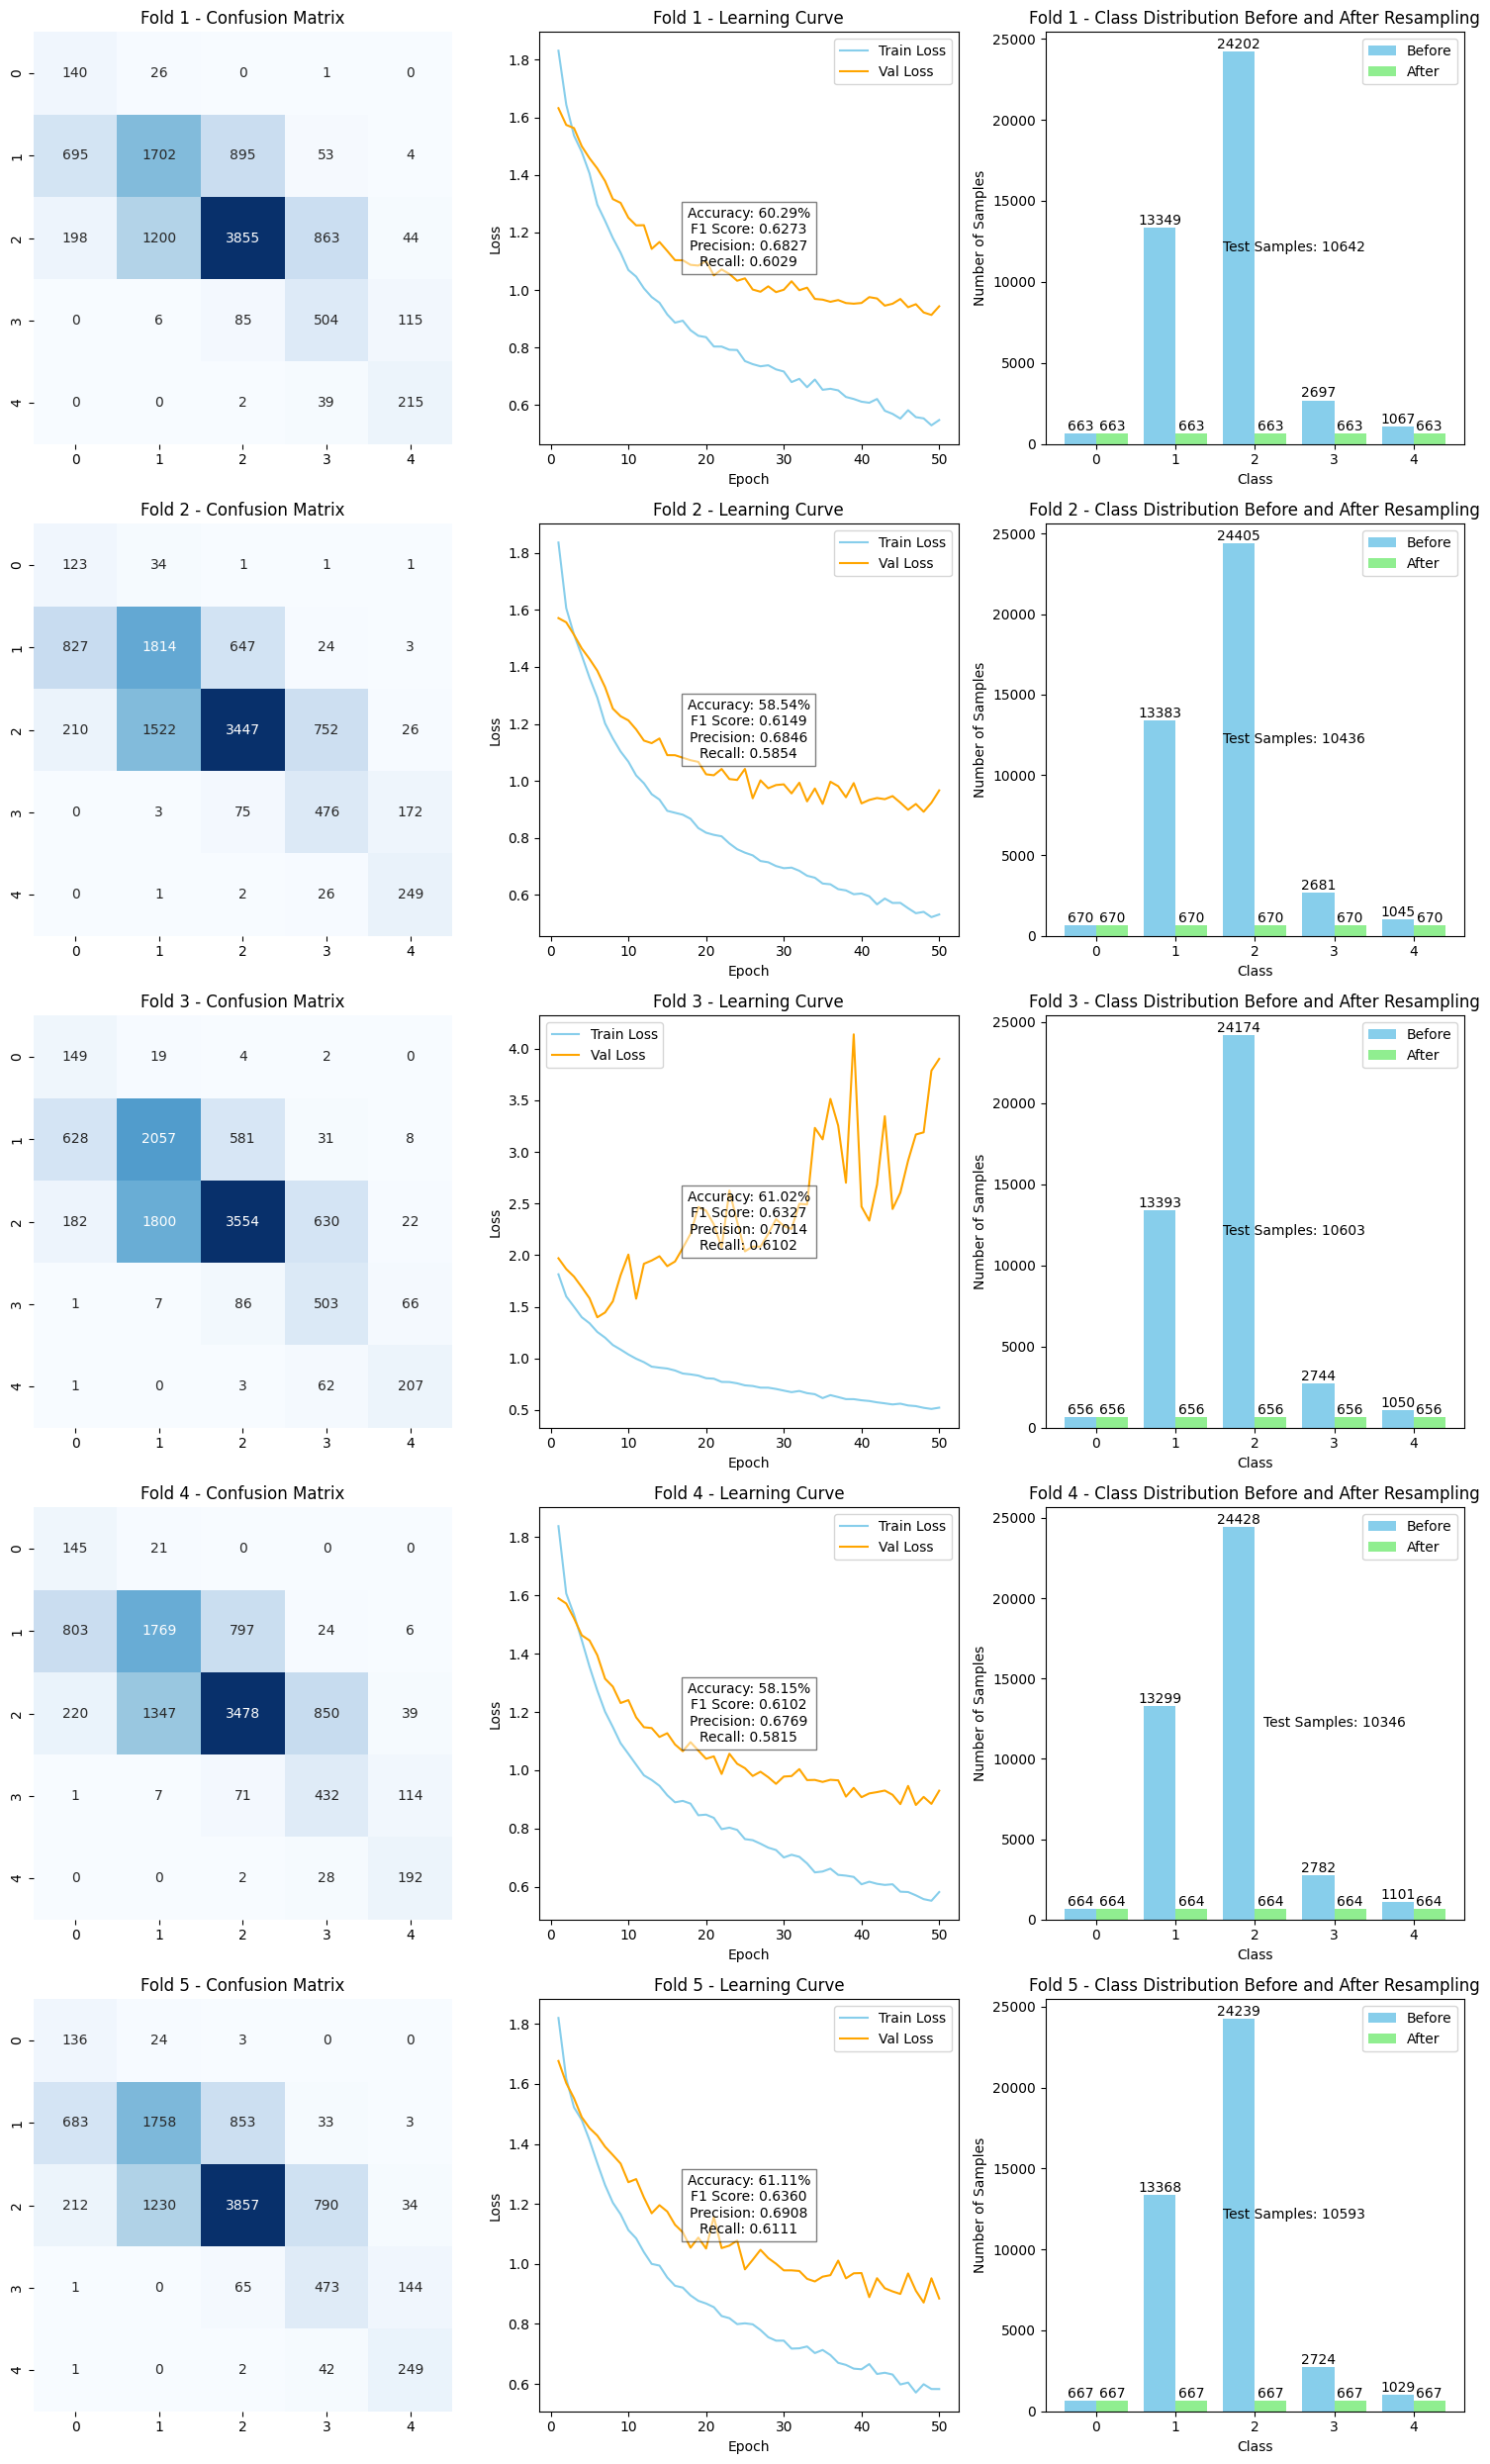

In [59]:
import seaborn as sns
from collections import Counter

fig, axes = plt.subplots(nrows=num_folds, ncols=3, figsize=(15, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = bi3_conf_mat_list[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Learning Curve (Training)
    ax2 = axes[fold, 1]
    ax2.plot(range(1, len(bi3_all_train_loss[fold]) + 1), bi3_all_train_loss[fold], color='skyblue', label='Train Loss')
    ax2.plot(range(1, len(bi3_all_val_loss[fold]) + 1), bi3_all_val_loss[fold], color='orange', label='Val Loss')

    ax2.set_title(f'Fold {fold + 1} - Learning Curve')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    # Annotate with final values
    ax2.text(0.5, 0.5, f'Accuracy: {bi3_accuracy_per_fold[fold]*100:.2f}%\nF1 Score: {bi3_f1_per_fold[fold]:.4f}\nPrecision: {bi3_precision_per_fold[fold]:.4f}\nRecall: {bi3_recall_per_fold[fold]:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.5))

    # Subplot 3: Original vs. Resampled Train Samples
    ax3 = axes[fold, 2]

    original_label_counts = Counter(bi3_y_train_before_resampled[fold])
    resampled_label_counts = Counter(bi3_y_train_after_resampled[fold])

    original_classes = list(original_label_counts.keys())
    resampled_classes = list(resampled_label_counts.keys())

    ax3.bar([cls - 0.2 for cls in original_classes], original_label_counts.values(), width=0.4, color='skyblue', label='Before')
    ax3.bar([cls + 0.2 for cls in resampled_classes], resampled_label_counts.values(), width=0.4, color='lightgreen', label='After')

    ax3.set_title(f'Fold {fold + 1} - Class Distribution Before and After Resampling')
    ax3.set_xlabel('Class')
    ax3.set_ylabel('Number of Samples')
    ax3.set_xticks(resampled_classes)
    ax3.legend()

    # Add text labels for each class in train set
    for cls, count in original_label_counts.items():
        ax3.text(cls - 0.2, count + 2, str(count), ha='center', va='bottom')

    for cls, count in resampled_label_counts.items():
        ax3.text(cls + 0.2, count + 2, str(count), ha='center', va='bottom')

    # Add text label for the number of test samples in the center
    center_x = 0.5 * (resampled_classes[-1] - original_classes[0]) + original_classes[0]
    center_y = 0.5 * (max(max(original_label_counts.values()), max(resampled_label_counts.values())))
    ax3.text(center_x, center_y, f'Test Samples: {bi3_test_sample_list[fold]}', ha='center', va='center')

# Display the subplots
plt.tight_layout()
plt.show()

## **Binary3 + SMOTE**

In [60]:
bi3_X = bi3.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','L1:eGFR','Stage'], axis=1)
bi3_y = bi3['Stage']

In [61]:
bi3_label_encoder = LabelEncoder()
bi3['Group'] = bi3_label_encoder.fit_transform(bi3['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
bi3_all_folds = bi3['Fold'].unique()

bi3_accuracy_per_fold = []
bi3_conf_mat_list = []

bi3_precision_per_fold = []
bi3_recall_per_fold = []
bi3_f1_per_fold = []

bi3_loss_per_fold = []
bi3_all_train_loss = []
bi3_all_val_loss = []

bi3_X_train_before_resampled = []
bi3_y_train_before_resampled = []

bi3_X_train_after_resampled = []
bi3_y_train_after_resampled = []

bi3_test_sample_list = []

bi3_smote = SMOTE()
oversample = RandomOverSampler()
undersample = RandomUnderSampler()

In [62]:
for fold, (train_folds, test_fold) in enumerate(kf.split(bi3_all_folds)):
    train_folds = bi3_all_folds[train_folds]
    test_fold = bi3_all_folds[test_fold][0]
    train_indices = bi3['Fold'].isin(train_folds)
    test_indices = bi3['Fold'] == test_fold

    bi3_X_train, bi3_X_test = bi3_X[train_indices], bi3_X[test_indices]
    bi3_y_train, bi3_y_test = bi3_y[train_indices], bi3_y[test_indices]

    # Store the original X_train and y_train
    bi3_X_train_before_resampled.append(bi3_X_train)
    bi3_y_train_before_resampled.append(bi3_y_train)

    # Apply SMOTE only on the training data
    bi3_X_train_resampled, bi3_y_train_resampled = bi3_smote.fit_resample(bi3_X_train, bi3_y_train)

    # Store the resampled X_train and y_train
    bi3_X_train_after_resampled.append(bi3_X_train_resampled)
    bi3_y_train_after_resampled.append(bi3_y_train_resampled)

    # Store the number of test samples
    bi3_test_sample_list.append(len(bi3_X_test))

    # Scale
    bi3_scaler = StandardScaler()
    bi3_X_train_scaled = bi3_scaler.fit_transform(bi3_X_train_resampled)
    bi3_X_test_scaled = bi3_scaler.transform(bi3_X_test)

    # Encode y_train and y_test
    num_classes = len(np.unique(bi3_y_train_resampled))  # Calculate the actual number of classes
    bi3_y_train_one_hot = tf.keras.utils.to_categorical(bi3_y_train_resampled, num_classes=num_classes)
    bi3_y_test_one_hot = tf.keras.utils.to_categorical(bi3_y_test, num_classes=num_classes)

    # Build and compile the model
    bi3_model = Sequential([
        Dense(256, input_dim=bi3_X_train_scaled.shape[1], activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(5, activation='softmax')
    ])

    bi3_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    bi3_model.compile(optimizer=bi3_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    bi3_history = bi3_model.fit(bi3_X_train_scaled, bi3_y_train_one_hot,
                                batch_size=128,
                                epochs=50,
                                verbose=0,
                                validation_data=(bi3_X_test_scaled, bi3_y_test_one_hot))

    # Evaluate on the test set
    bi3_scores = bi3_model.evaluate(bi3_X_test_scaled, bi3_y_test_one_hot, verbose=0)
    bi3_loss_per_fold.append(bi3_scores[0])

    # Store metrics for analysis
    bi3_all_train_loss.append(bi3_history.history['loss'])
    bi3_all_val_loss.append(bi3_history.history['val_loss'])

    bi3_y_pred = bi3_model.predict(bi3_X_test_scaled)
    bi3_y_pred_classes = np.argmax(bi3_y_pred, axis=1)
    bi3_conf_mat = confusion_matrix(bi3_y_test, bi3_y_pred_classes)
    bi3_conf_mat_list.append(bi3_conf_mat)

    bi3_accuracy = accuracy_score(bi3_y_test, bi3_y_pred_classes)
    bi3_precision = precision_score(bi3_y_test, bi3_y_pred_classes, average='weighted')
    bi3_recall = recall_score(bi3_y_test, bi3_y_pred_classes, average='weighted')
    bi3_f1 = f1_score(bi3_y_test, bi3_y_pred_classes, average='weighted')

    bi3_accuracy_per_fold.append(bi3_accuracy)
    bi3_precision_per_fold.append(bi3_precision)
    bi3_recall_per_fold.append(bi3_recall)
    bi3_f1_per_fold.append(bi3_f1)

    print(f"Table: bi3, Fold {fold + 1} - Loss: {bi3_loss_per_fold[-1]:.4f}, Accuracy: {bi3_accuracy_per_fold[-1] * 100:.2f}%")
    print(f"Precision: {bi3_precision_per_fold[-1]:.4f}, Recall: {bi3_recall_per_fold[-1]:.4f}, F1-Score: {bi3_f1_per_fold[-1]:.4f}")

324/324 [==============================] - 1s 2ms/step
Table: bi3, Fold 1 - Loss: 0.3426, Accuracy: 86.27%
Precision: 0.8670, Recall: 0.8627, F1-Score: 0.8639
327/327 [==============================] - 1s 2ms/step
Table: bi3, Fold 2 - Loss: 0.3783, Accuracy: 85.99%
Precision: 0.8618, Recall: 0.8599, F1-Score: 0.8605
333/333 [==============================] - 1s 1ms/step
Table: bi3, Fold 3 - Loss: 0.3359, Accuracy: 86.86%
Precision: 0.8746, Recall: 0.8686, F1-Score: 0.8703
332/332 [==============================] - 1s 2ms/step
Table: bi3, Fold 4 - Loss: 0.4282, Accuracy: 83.78%
Precision: 0.8547, Recall: 0.8378, F1-Score: 0.8400
332/332 [==============================] - 1s 2ms/step
Table: bi3, Fold 5 - Loss: 0.3658, Accuracy: 86.02%
Precision: 0.8669, Recall: 0.8602, F1-Score: 0.8619


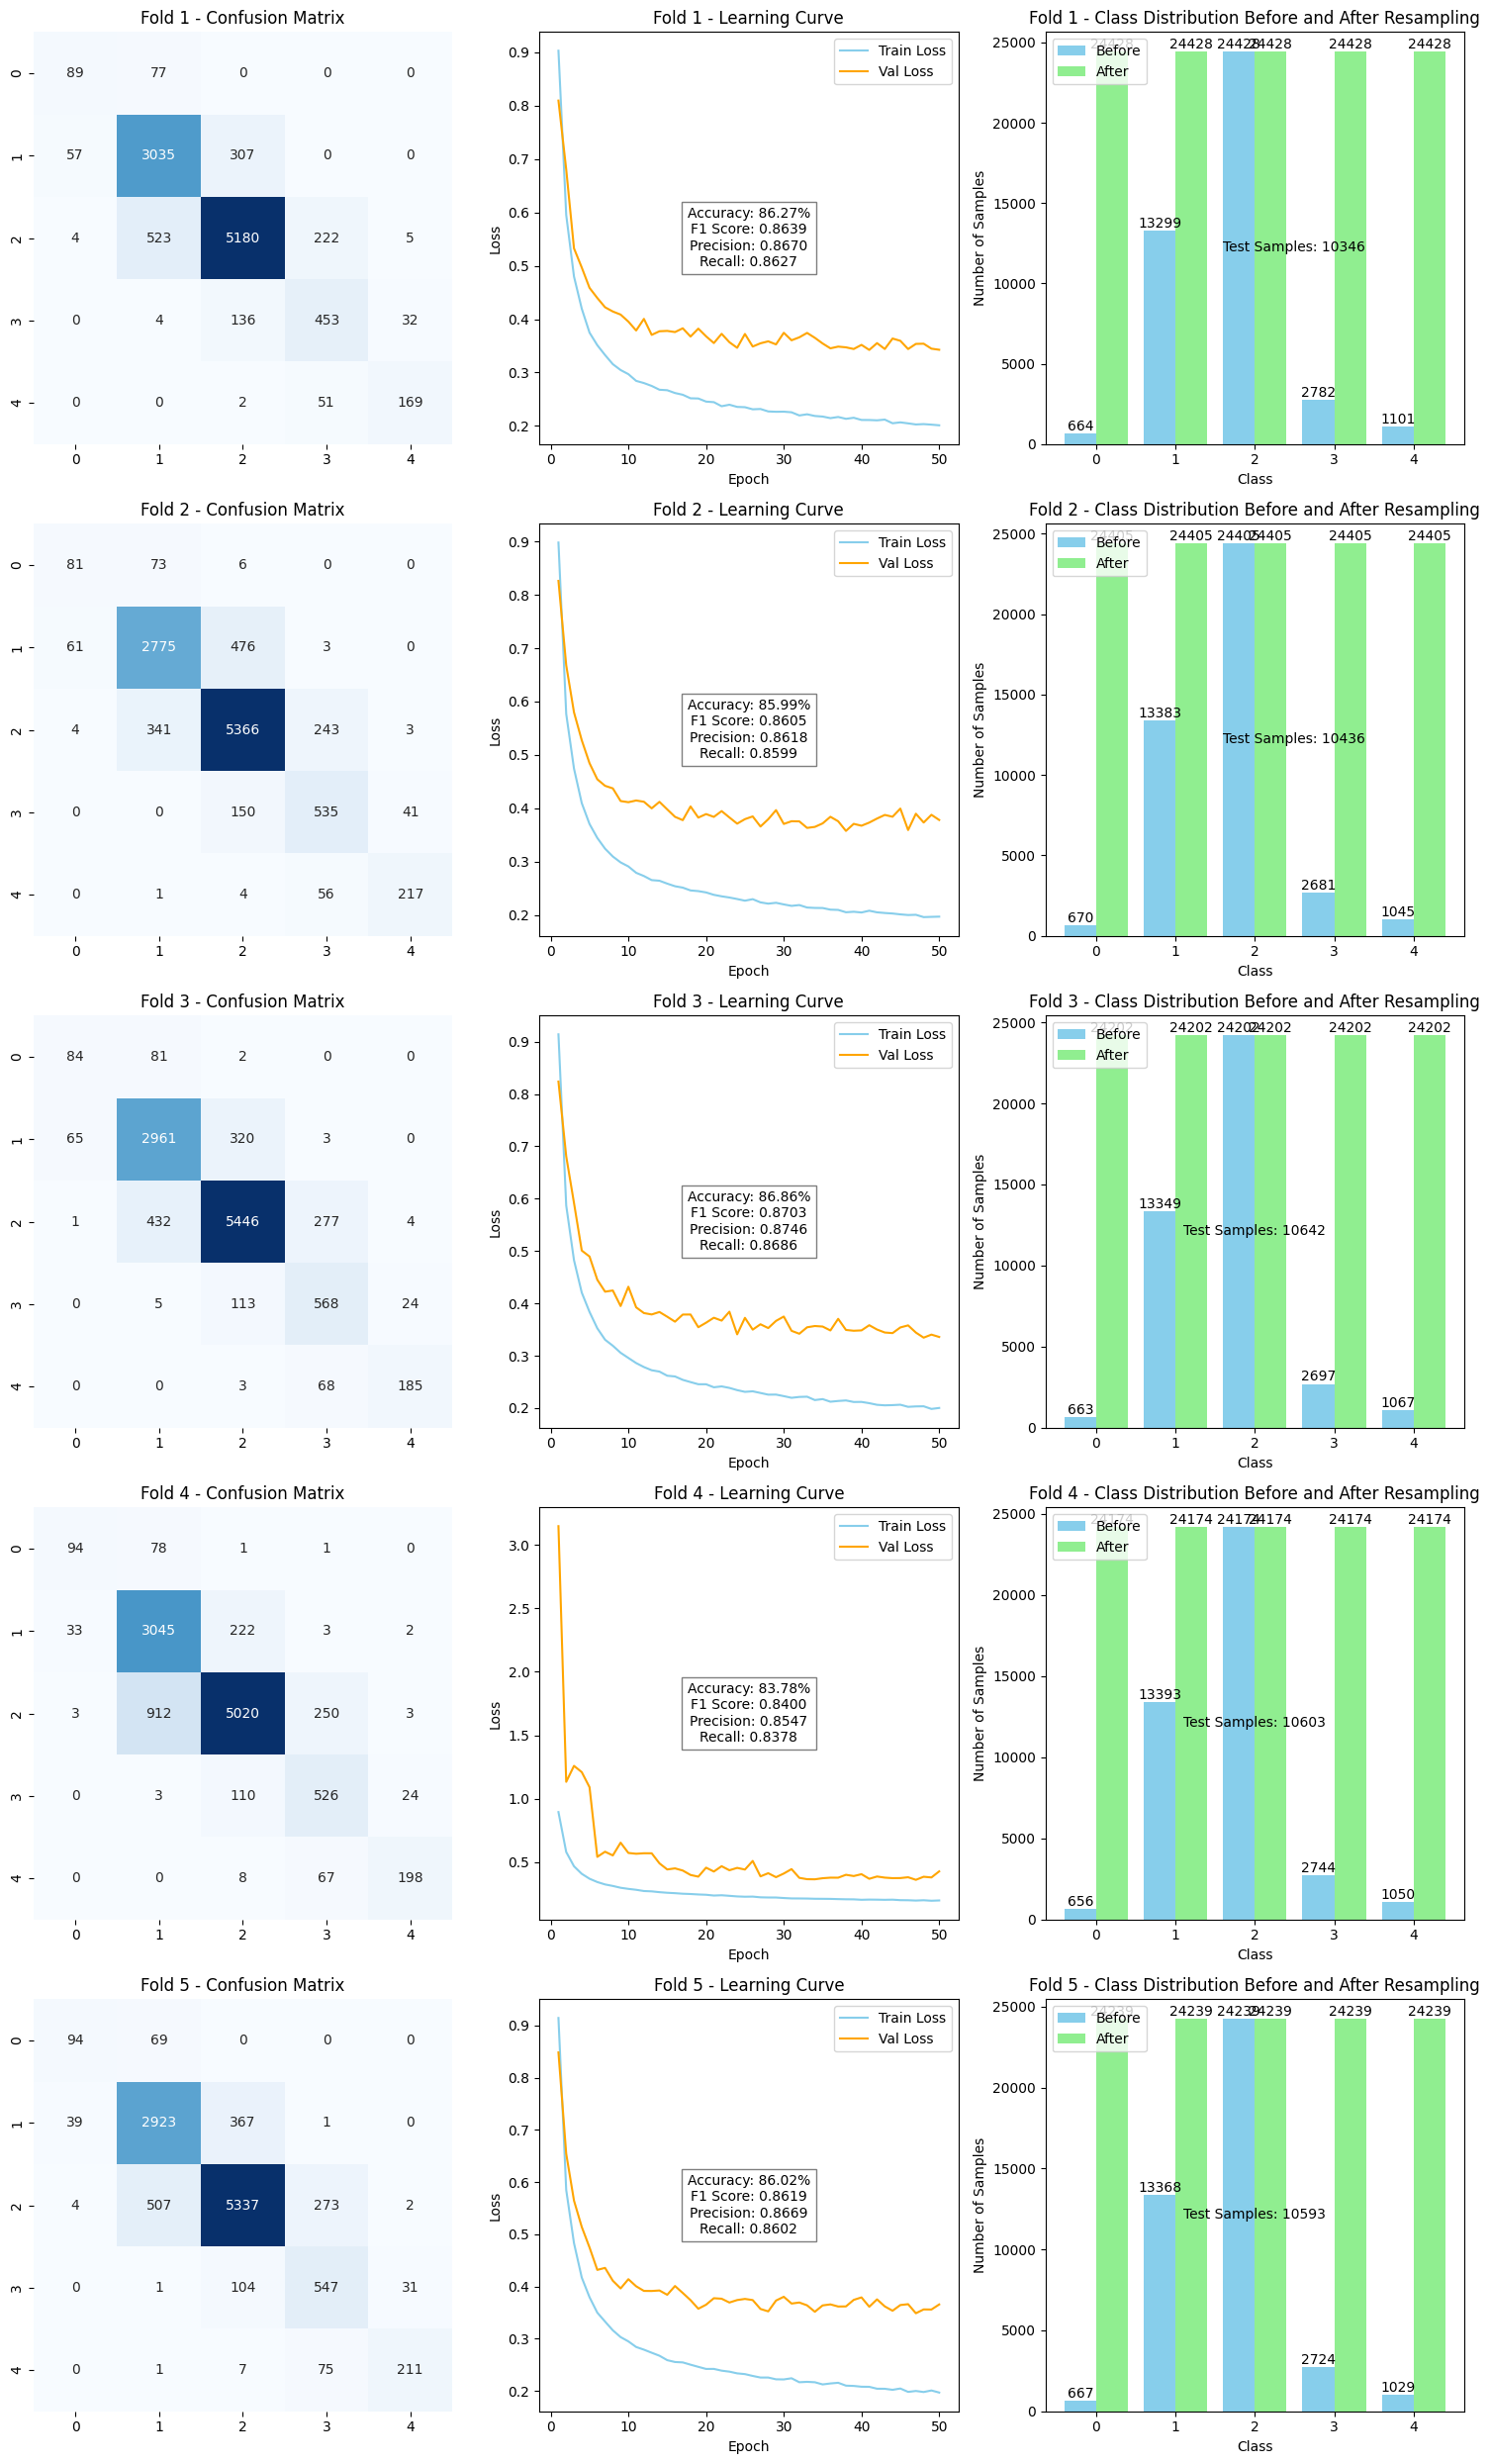

In [63]:
import seaborn as sns
from collections import Counter

fig, axes = plt.subplots(nrows=num_folds, ncols=3, figsize=(15, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = bi3_conf_mat_list[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Learning Curve (Training)
    ax2 = axes[fold, 1]
    ax2.plot(range(1, len(bi3_all_train_loss[fold]) + 1), bi3_all_train_loss[fold], color='skyblue', label='Train Loss')
    ax2.plot(range(1, len(bi3_all_val_loss[fold]) + 1), bi3_all_val_loss[fold], color='orange', label='Val Loss')

    ax2.set_title(f'Fold {fold + 1} - Learning Curve')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    # Annotate with final values
    ax2.text(0.5, 0.5, f'Accuracy: {bi3_accuracy_per_fold[fold]*100:.2f}%\nF1 Score: {bi3_f1_per_fold[fold]:.4f}\nPrecision: {bi3_precision_per_fold[fold]:.4f}\nRecall: {bi3_recall_per_fold[fold]:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.5))

    # Subplot 3: Original vs. Resampled Train Samples
    ax3 = axes[fold, 2]

    original_label_counts = Counter(bi3_y_train_before_resampled[fold])
    resampled_label_counts = Counter(bi3_y_train_after_resampled[fold])

    original_classes = list(original_label_counts.keys())
    resampled_classes = list(resampled_label_counts.keys())

    ax3.bar([cls - 0.2 for cls in original_classes], original_label_counts.values(), width=0.4, color='skyblue', label='Before')
    ax3.bar([cls + 0.2 for cls in resampled_classes], resampled_label_counts.values(), width=0.4, color='lightgreen', label='After')

    ax3.set_title(f'Fold {fold + 1} - Class Distribution Before and After Resampling')
    ax3.set_xlabel('Class')
    ax3.set_ylabel('Number of Samples')
    ax3.set_xticks(resampled_classes)
    ax3.legend()

    # Add text labels for each class in train set
    for cls, count in original_label_counts.items():
        ax3.text(cls - 0.2, count + 2, str(count), ha='center', va='bottom')

    for cls, count in resampled_label_counts.items():
        ax3.text(cls + 0.2, count + 2, str(count), ha='center', va='bottom')

    # Add text label for the number of test samples in the center
    center_x = 0.5 * (resampled_classes[-1] - original_classes[0]) + original_classes[0]
    center_y = 0.5 * (max(max(original_label_counts.values()), max(resampled_label_counts.values())))
    ax3.text(center_x, center_y, f'Test Samples: {bi3_test_sample_list[fold]}', ha='center', va='center')

# Display the subplots
plt.tight_layout()
plt.show()

# **Data2**

## **Data2 + ROS**

In [64]:
data2_X = data2.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','L1-eGFR','Stage'], axis=1)
data2_y = data2['Stage']

In [65]:
data2_label_encoder = LabelEncoder()
data2['Group'] = data2_label_encoder.fit_transform(data2['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
data2_all_folds = data2['Fold'].unique()

data2_accuracy_per_fold = []
data2_conf_mat_list = []
data2_precision_per_fold = []
data2_recall_per_fold = []
data2_f1_per_fold = []
data2_loss_per_fold = []
data2_all_train_loss = []
data2_all_val_loss = []

data2_X_train_before_resampled = []
data2_y_train_before_resampled = []
data2_X_train_after_resampled = []
data2_y_train_after_resampled = []

data2_test_sample_list = []

data2_smote = SMOTE()
oversample = RandomOverSampler()
undersample = RandomUnderSampler()

In [66]:
for fold, (train_folds, test_fold) in enumerate(kf.split(data2_all_folds)):
    train_folds = data2_all_folds[train_folds]
    test_fold = data2_all_folds[test_fold][0]
    train_indices = data2['Fold'].isin(train_folds)
    test_indices = data2['Fold'] == test_fold

    data2_X_train, data2_X_test = data2_X[train_indices], data2_X[test_indices]
    data2_y_train, data2_y_test = data2_y[train_indices], data2_y[test_indices]

    # Store the original X_train and y_train
    data2_X_train_before_resampled.append(data2_X_train)
    data2_y_train_before_resampled.append(data2_y_train)

    # Apply SMOTE only on the training data
    data2_X_train_resampled, data2_y_train_resampled = oversample.fit_resample(data2_X_train, data2_y_train)

    # Store the resampled X_train and y_train
    data2_X_train_after_resampled.append(data2_X_train_resampled)
    data2_y_train_after_resampled.append(data2_y_train_resampled)

    # Store the number of test samples
    data2_test_sample_list.append(len(data2_X_test))

    # Scale
    data2_scaler = StandardScaler()
    data2_X_train_scaled = data2_scaler.fit_transform(data2_X_train_resampled)
    data2_X_test_scaled = data2_scaler.transform(data2_X_test)

    # Encode y_train and y_test
    num_classes = len(np.unique(data2_y_train_resampled))  # Calculate the actual number of classes
    data2_y_train_one_hot = tf.keras.utils.to_categorical(data2_y_train_resampled, num_classes=num_classes)
    data2_y_test_one_hot = tf.keras.utils.to_categorical(data2_y_test, num_classes=num_classes)

    # Build and compile the model
    data2_model = Sequential([
        Dense(256, input_dim=data2_X_train_scaled.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(5, activation='softmax')
    ])

    data2_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    data2_model.compile(optimizer=data2_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    data2_history = data2_model.fit(data2_X_train_scaled, data2_y_train_one_hot,
                                    batch_size=500,
                                    epochs=50,
                                    verbose=0,
                                    validation_data=(data2_X_test_scaled, data2_y_test_one_hot))

    # Evaluate on the test set
    data2_scores = data2_model.evaluate(data2_X_test_scaled, data2_y_test_one_hot, verbose=0)
    data2_loss_per_fold.append(data2_scores[0])

    # Store metrics for analysis
    data2_all_train_loss.append(data2_history.history['loss'])
    data2_all_val_loss.append(data2_history.history['val_loss'])

    data2_y_pred = data2_model.predict(data2_X_test_scaled)
    data2_y_pred_classes = np.argmax(data2_y_pred, axis=1)
    data2_conf_mat = confusion_matrix(data2_y_test, data2_y_pred_classes)
    data2_conf_mat_list.append(data2_conf_mat)

    data2_accuracy = accuracy_score(data2_y_test, data2_y_pred_classes)
    data2_precision = precision_score(data2_y_test, data2_y_pred_classes, average='weighted')
    data2_recall = recall_score(data2_y_test, data2_y_pred_classes, average='weighted')
    data2_f1 = f1_score(data2_y_test, data2_y_pred_classes, average='weighted')

    data2_accuracy_per_fold.append(data2_accuracy)
    data2_precision_per_fold.append(data2_precision)
    data2_recall_per_fold.append(data2_recall)
    data2_f1_per_fold.append(data2_f1)

    print(f"Table: data2, Fold {fold + 1} - Loss: {data2_loss_per_fold[-1]:.4f}, Accuracy: {data2_accuracy_per_fold[-1] * 100:.2f}%")
    print(f"Precision: {data2_precision_per_fold[-1]:.4f}, Recall: {data2_recall_per_fold[-1]:.4f}, F1-Score: {data2_f1_per_fold[-1]:.4f}")

332/332 [==============================] - 1s 2ms/step
Table: data2, Fold 1 - Loss: 0.3994, Accuracy: 87.20%
Precision: 0.8853, Recall: 0.8720, F1-Score: 0.8740
333/333 [==============================] - 1s 2ms/step
Table: data2, Fold 2 - Loss: 0.3440, Accuracy: 87.88%
Precision: 0.8863, Recall: 0.8788, F1-Score: 0.8810
324/324 [==============================] - 1s 2ms/step
Table: data2, Fold 3 - Loss: 0.3508, Accuracy: 87.46%
Precision: 0.8831, Recall: 0.8746, F1-Score: 0.8763
332/332 [==============================] - 1s 2ms/step
Table: data2, Fold 4 - Loss: 0.3668, Accuracy: 87.70%
Precision: 0.8857, Recall: 0.8770, F1-Score: 0.8793
327/327 [==============================] - 1s 1ms/step
Table: data2, Fold 5 - Loss: 0.3871, Accuracy: 87.27%
Precision: 0.8809, Recall: 0.8727, F1-Score: 0.8743


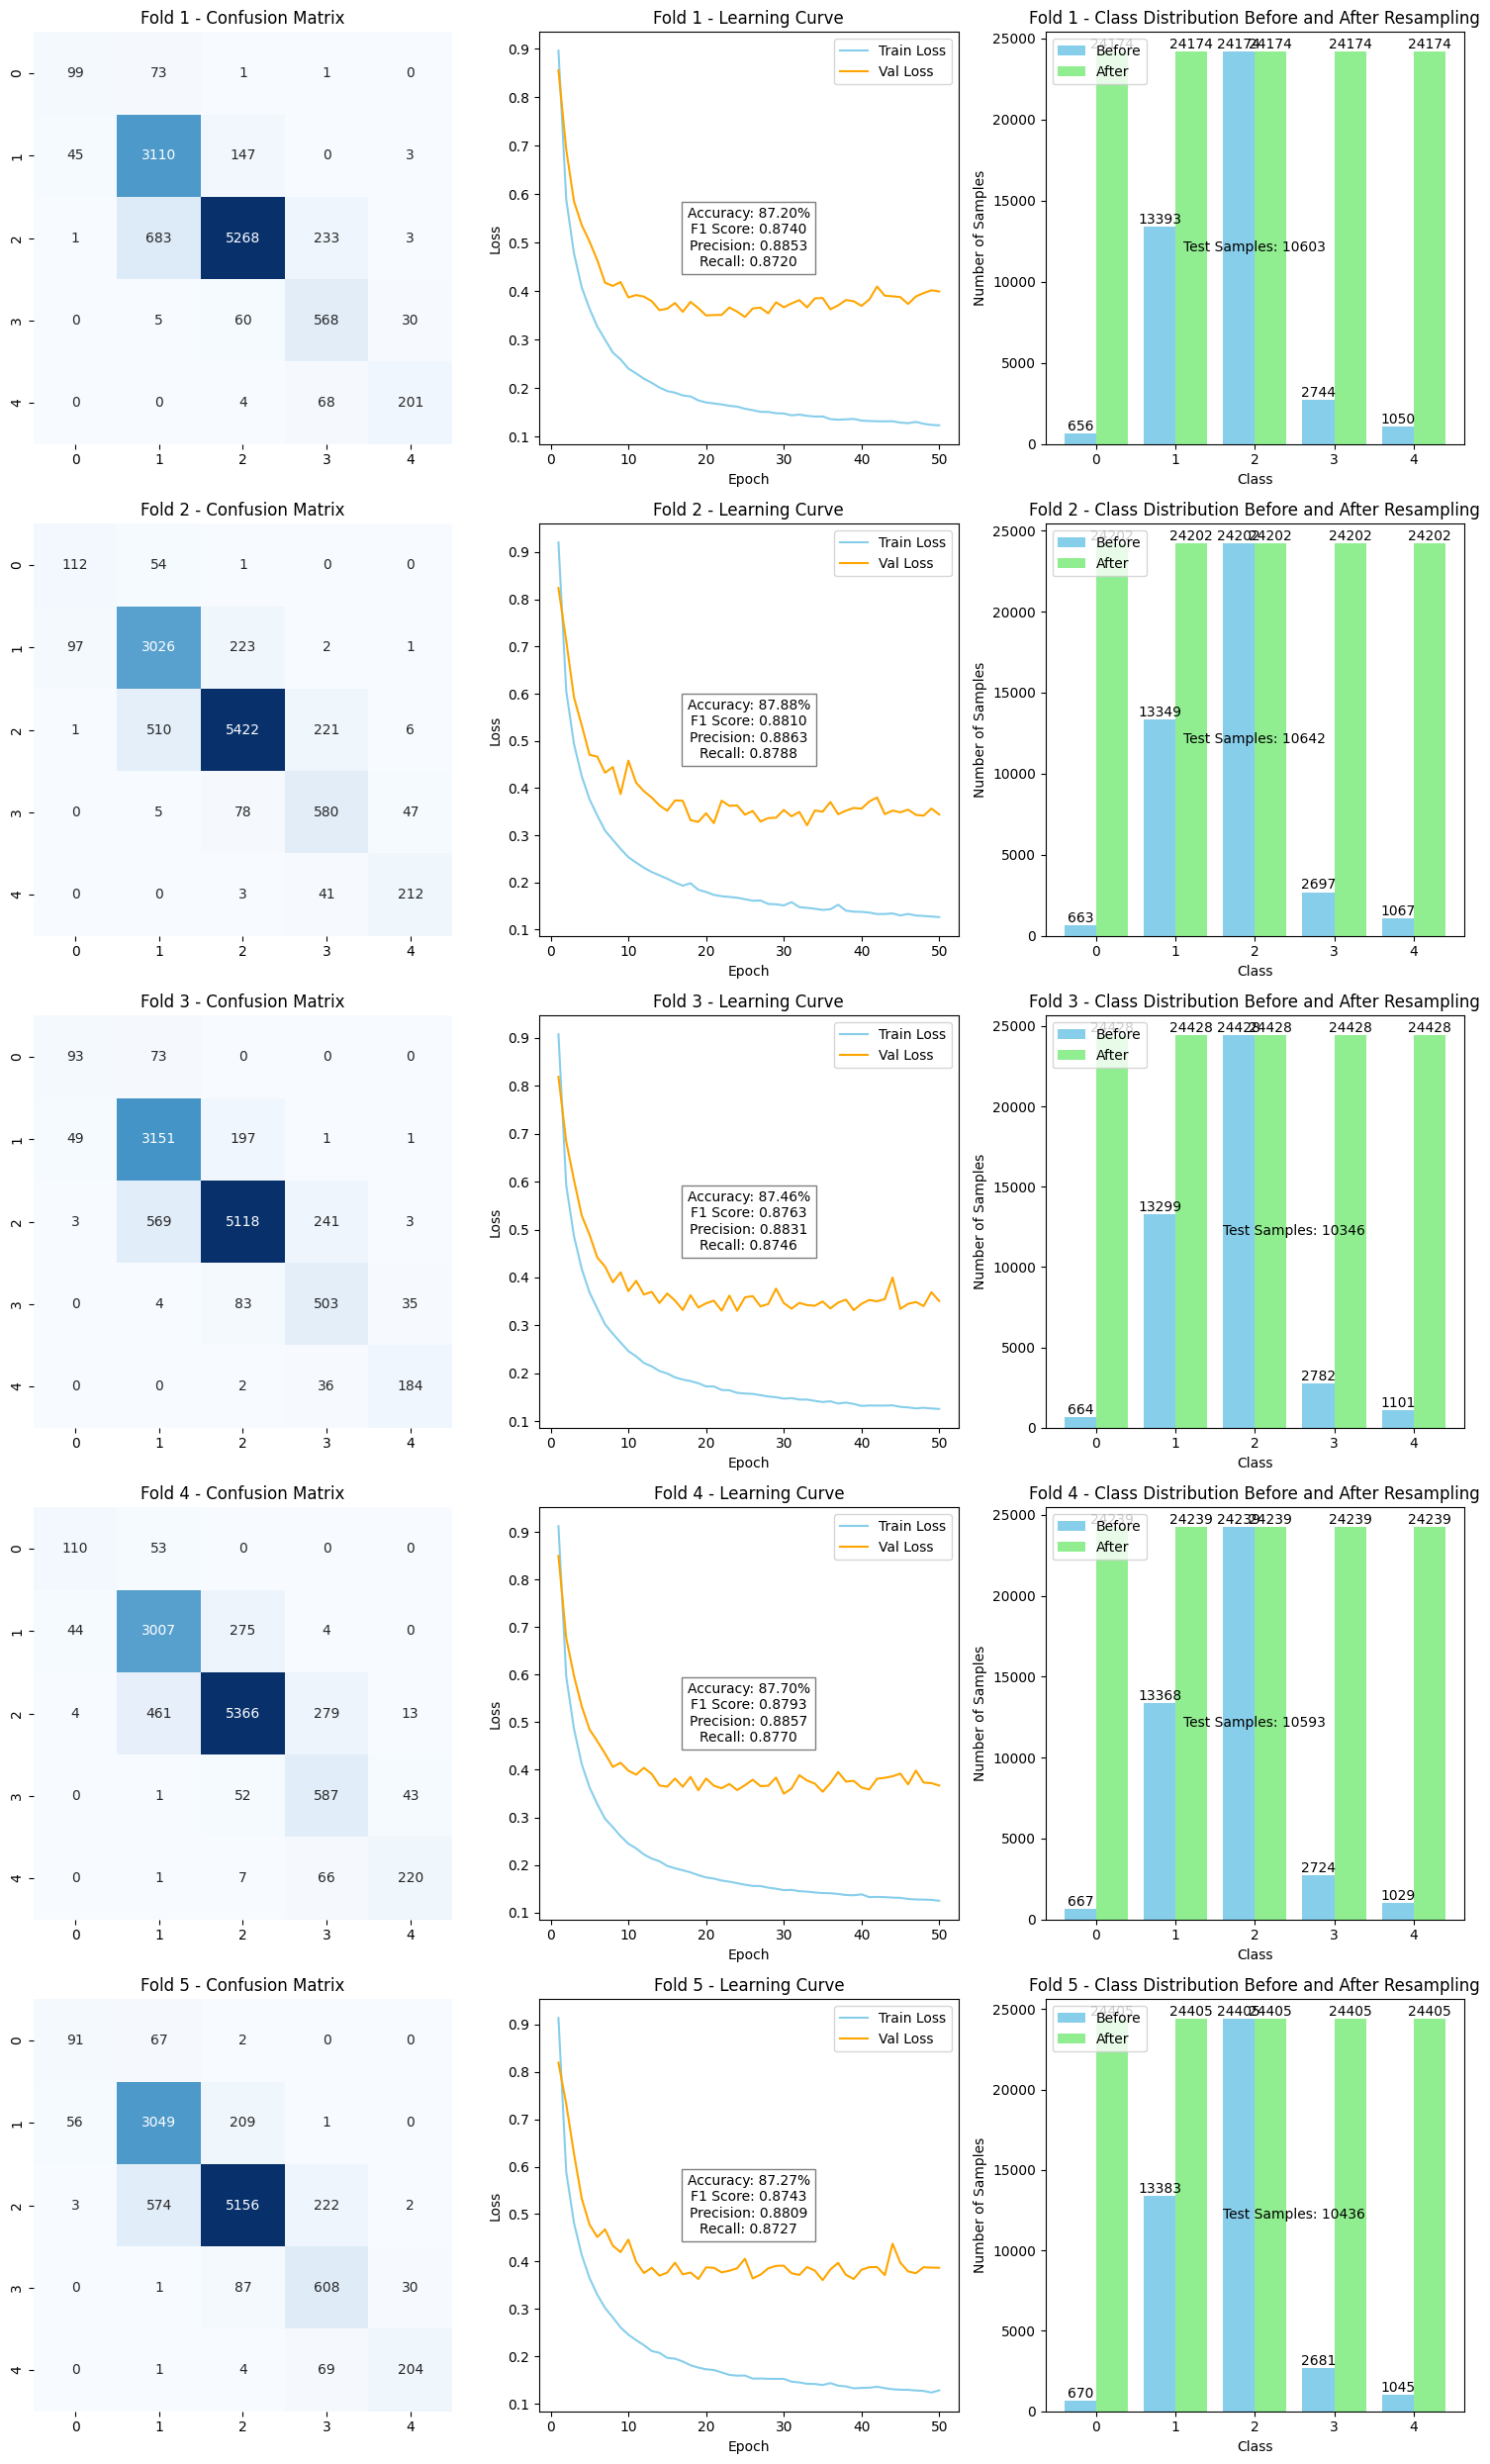

In [67]:
import seaborn as sns
from collections import Counter

fig, axes = plt.subplots(nrows=num_folds, ncols=3, figsize=(15, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = data2_conf_mat_list[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Learning Curve (Training)
    ax2 = axes[fold, 1]
    ax2.plot(range(1, len(data2_all_train_loss[fold]) + 1), data2_all_train_loss[fold], color='skyblue', label='Train Loss')
    ax2.plot(range(1, len(data2_all_val_loss[fold]) + 1), data2_all_val_loss[fold], color='orange', label='Val Loss')

    ax2.set_title(f'Fold {fold + 1} - Learning Curve')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    # Annotate with final values
    ax2.text(0.5, 0.5, f'Accuracy: {data2_accuracy_per_fold[fold]*100:.2f}%\nF1 Score: {data2_f1_per_fold[fold]:.4f}\nPrecision: {data2_precision_per_fold[fold]:.4f}\nRecall: {data2_recall_per_fold[fold]:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.5))

    # Subplot 3: Original vs. Resampled Train Samples
    ax3 = axes[fold, 2]

    original_label_counts = Counter(data2_y_train_before_resampled[fold])
    resampled_label_counts = Counter(data2_y_train_after_resampled[fold])

    original_classes = list(original_label_counts.keys())
    resampled_classes = list(resampled_label_counts.keys())

    ax3.bar([cls - 0.2 for cls in original_classes], original_label_counts.values(), width=0.4, color='skyblue', label='Before')
    ax3.bar([cls + 0.2 for cls in resampled_classes], resampled_label_counts.values(), width=0.4, color='lightgreen', label='After')

    ax3.set_title(f'Fold {fold + 1} - Class Distribution Before and After Resampling')
    ax3.set_xlabel('Class')
    ax3.set_ylabel('Number of Samples')
    ax3.set_xticks(resampled_classes)
    ax3.legend()

    # Add text labels for each class in train set
    for cls, count in original_label_counts.items():
        ax3.text(cls - 0.2, count + 2, str(count), ha='center', va='bottom')

    for cls, count in resampled_label_counts.items():
        ax3.text(cls + 0.2, count + 2, str(count), ha='center', va='bottom')

    # Add text label for the number of test samples in the center
    center_x = 0.5 * (resampled_classes[-1] - original_classes[0]) + original_classes[0]
    center_y = 0.5 * (max(max(original_label_counts.values()), max(resampled_label_counts.values())))
    ax3.text(center_x, center_y, f'Test Samples: {data2_test_sample_list[fold]}', ha='center', va='center')

# Display the subplots
plt.tight_layout()
plt.show()


## **Data2 + RUS**

In [68]:
data2_X = data2.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','L1-eGFR','Stage'], axis=1)
data2_y = data2['Stage']

In [69]:
data2_label_encoder = LabelEncoder()
data2['Group'] = data2_label_encoder.fit_transform(data2['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
data2_all_folds = data2['Fold'].unique()

data2_accuracy_per_fold = []
data2_conf_mat_list = []
data2_precision_per_fold = []
data2_recall_per_fold = []
data2_f1_per_fold = []
data2_loss_per_fold = []
data2_all_train_loss = []
data2_all_val_loss = []

data2_X_train_before_resampled = []
data2_y_train_before_resampled = []
data2_X_train_after_resampled = []
data2_y_train_after_resampled = []

data2_test_sample_list = []

data2_smote = SMOTE()
oversample = RandomOverSampler()
undersample = RandomUnderSampler()

In [70]:
for fold, (train_folds, test_fold) in enumerate(kf.split(data2_all_folds)):
    train_folds = data2_all_folds[train_folds]
    test_fold = data2_all_folds[test_fold][0]
    train_indices = data2['Fold'].isin(train_folds)
    test_indices = data2['Fold'] == test_fold

    data2_X_train, data2_X_test = data2_X[train_indices], data2_X[test_indices]
    data2_y_train, data2_y_test = data2_y[train_indices], data2_y[test_indices]

    # Store the original X_train and y_train
    data2_X_train_before_resampled.append(data2_X_train)
    data2_y_train_before_resampled.append(data2_y_train)

    # Apply SMOTE only on the training data
    data2_X_train_resampled, data2_y_train_resampled = undersample.fit_resample(data2_X_train, data2_y_train)

    # Store the resampled X_train and y_train
    data2_X_train_after_resampled.append(data2_X_train_resampled)
    data2_y_train_after_resampled.append(data2_y_train_resampled)

    # Store the number of test samples
    data2_test_sample_list.append(len(data2_X_test))

    # Scale
    data2_scaler = StandardScaler()
    data2_X_train_scaled = data2_scaler.fit_transform(data2_X_train_resampled)
    data2_X_test_scaled = data2_scaler.transform(data2_X_test)

    # Encode y_train and y_test
    num_classes = len(np.unique(data2_y_train_resampled))  # Calculate the actual number of classes
    data2_y_train_one_hot = tf.keras.utils.to_categorical(data2_y_train_resampled, num_classes=num_classes)
    data2_y_test_one_hot = tf.keras.utils.to_categorical(data2_y_test, num_classes=num_classes)

    # Build and compile the model
    data2_model = Sequential([
        Dense(256, input_dim=data2_X_train_scaled.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(5, activation='softmax')
    ])

    data2_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    data2_model.compile(optimizer=data2_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    data2_history = data2_model.fit(data2_X_train_scaled, data2_y_train_one_hot,
                                    batch_size=500,
                                    epochs=50,
                                    verbose=0,
                                    validation_data=(data2_X_test_scaled, data2_y_test_one_hot))

    # Evaluate on the test set
    data2_scores = data2_model.evaluate(data2_X_test_scaled, data2_y_test_one_hot, verbose=0)
    data2_loss_per_fold.append(data2_scores[0])

    # Store metrics for analysis
    data2_all_train_loss.append(data2_history.history['loss'])
    data2_all_val_loss.append(data2_history.history['val_loss'])

    data2_y_pred = data2_model.predict(data2_X_test_scaled)
    data2_y_pred_classes = np.argmax(data2_y_pred, axis=1)
    data2_conf_mat = confusion_matrix(data2_y_test, data2_y_pred_classes)
    data2_conf_mat_list.append(data2_conf_mat)

    data2_accuracy = accuracy_score(data2_y_test, data2_y_pred_classes)
    data2_precision = precision_score(data2_y_test, data2_y_pred_classes, average='weighted')
    data2_recall = recall_score(data2_y_test, data2_y_pred_classes, average='weighted')
    data2_f1 = f1_score(data2_y_test, data2_y_pred_classes, average='weighted')

    data2_accuracy_per_fold.append(data2_accuracy)
    data2_precision_per_fold.append(data2_precision)
    data2_recall_per_fold.append(data2_recall)
    data2_f1_per_fold.append(data2_f1)

    print(f"Table: data2, Fold {fold + 1} - Loss: {data2_loss_per_fold[-1]:.4f}, Accuracy: {data2_accuracy_per_fold[-1] * 100:.2f}%")
    print(f"Precision: {data2_precision_per_fold[-1]:.4f}, Recall: {data2_recall_per_fold[-1]:.4f}, F1-Score: {data2_f1_per_fold[-1]:.4f}")

324/324 [==============================] - 1s 1ms/step
Table: data2, Fold 1 - Loss: 0.8650, Accuracy: 64.21%
Precision: 0.7023, Recall: 0.6421, F1-Score: 0.6604
332/332 [==============================] - 1s 1ms/step
Table: data2, Fold 2 - Loss: 0.8781, Accuracy: 62.82%
Precision: 0.7008, Recall: 0.6282, F1-Score: 0.6472
332/332 [==============================] - 1s 2ms/step
Table: data2, Fold 3 - Loss: 0.9550, Accuracy: 61.52%
Precision: 0.6949, Recall: 0.6152, F1-Score: 0.6370
333/333 [==============================] - 1s 2ms/step
Table: data2, Fold 4 - Loss: 0.9209, Accuracy: 61.23%
Precision: 0.7033, Recall: 0.6123, F1-Score: 0.6360
327/327 [==============================] - 1s 2ms/step
Table: data2, Fold 5 - Loss: 0.9429, Accuracy: 60.52%
Precision: 0.6925, Recall: 0.6052, F1-Score: 0.6295


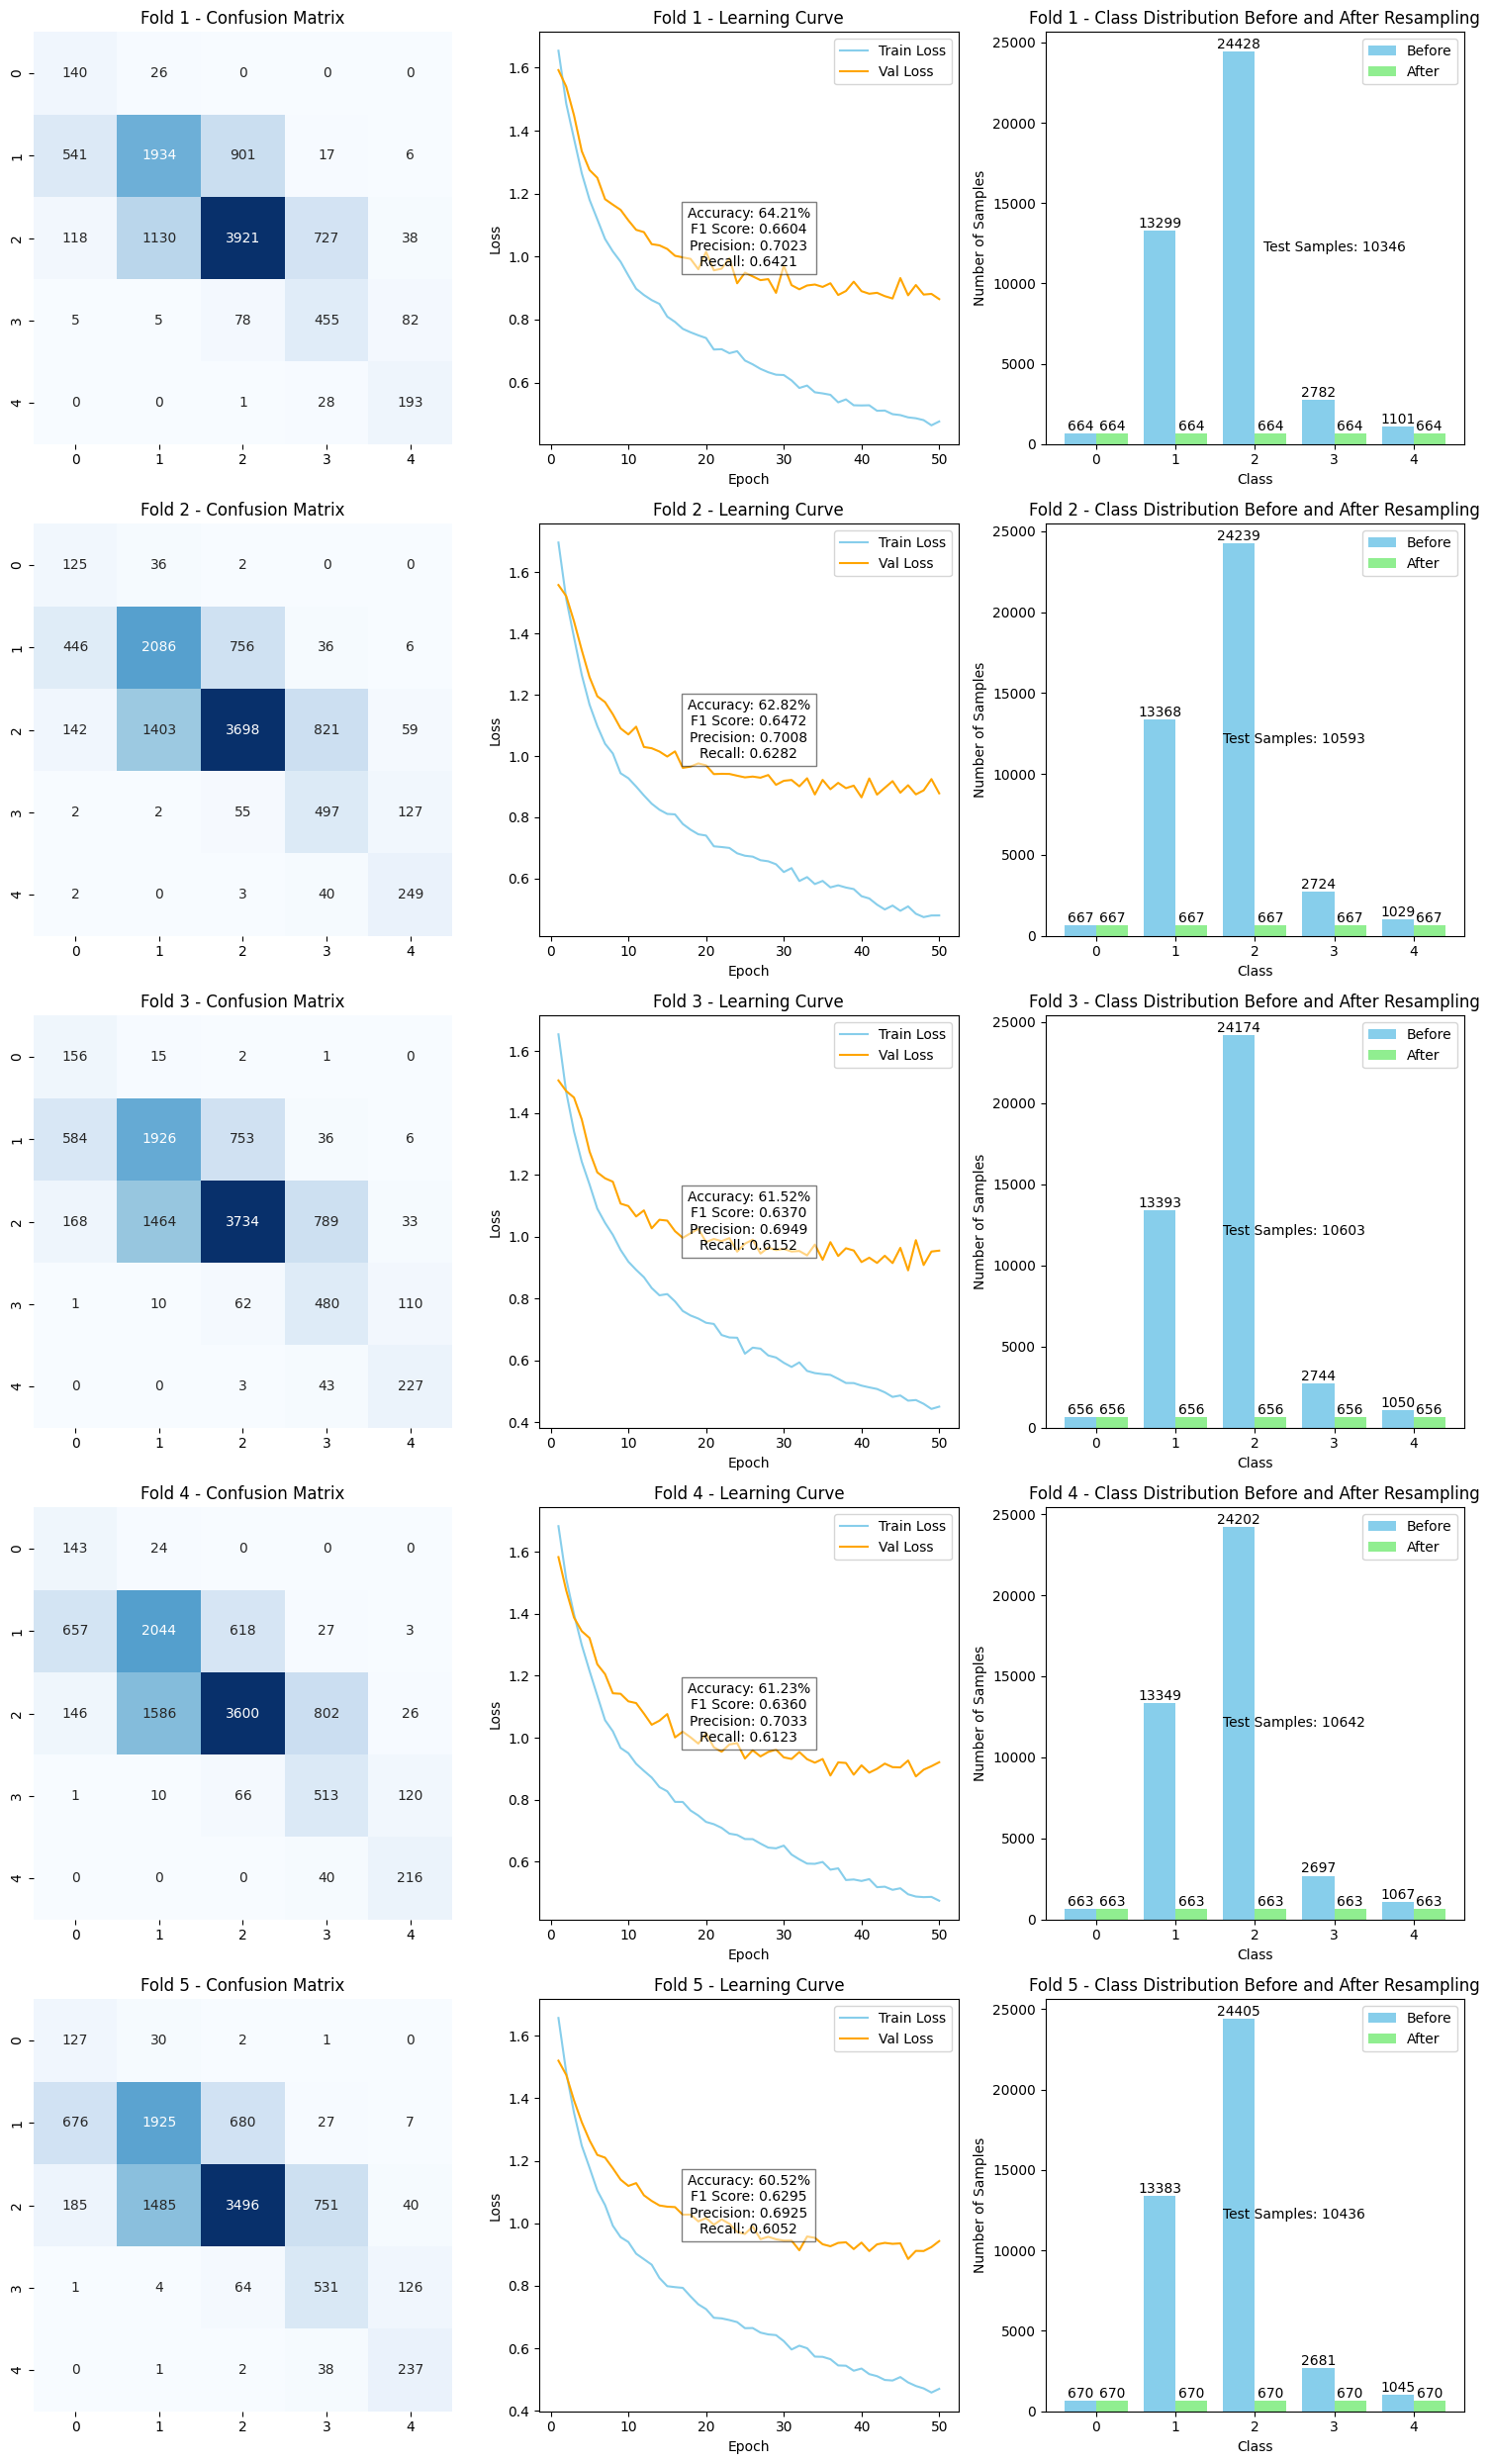

In [71]:
import seaborn as sns
from collections import Counter

fig, axes = plt.subplots(nrows=num_folds, ncols=3, figsize=(15, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = data2_conf_mat_list[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Learning Curve (Training)
    ax2 = axes[fold, 1]
    ax2.plot(range(1, len(data2_all_train_loss[fold]) + 1), data2_all_train_loss[fold], color='skyblue', label='Train Loss')
    ax2.plot(range(1, len(data2_all_val_loss[fold]) + 1), data2_all_val_loss[fold], color='orange', label='Val Loss')

    ax2.set_title(f'Fold {fold + 1} - Learning Curve')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    # Annotate with final values
    ax2.text(0.5, 0.5, f'Accuracy: {data2_accuracy_per_fold[fold]*100:.2f}%\nF1 Score: {data2_f1_per_fold[fold]:.4f}\nPrecision: {data2_precision_per_fold[fold]:.4f}\nRecall: {data2_recall_per_fold[fold]:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.5))

    # Subplot 3: Original vs. Resampled Train Samples
    ax3 = axes[fold, 2]

    original_label_counts = Counter(data2_y_train_before_resampled[fold])
    resampled_label_counts = Counter(data2_y_train_after_resampled[fold])

    original_classes = list(original_label_counts.keys())
    resampled_classes = list(resampled_label_counts.keys())

    ax3.bar([cls - 0.2 for cls in original_classes], original_label_counts.values(), width=0.4, color='skyblue', label='Before')
    ax3.bar([cls + 0.2 for cls in resampled_classes], resampled_label_counts.values(), width=0.4, color='lightgreen', label='After')

    ax3.set_title(f'Fold {fold + 1} - Class Distribution Before and After Resampling')
    ax3.set_xlabel('Class')
    ax3.set_ylabel('Number of Samples')
    ax3.set_xticks(resampled_classes)
    ax3.legend()

    # Add text labels for each class in train set
    for cls, count in original_label_counts.items():
        ax3.text(cls - 0.2, count + 2, str(count), ha='center', va='bottom')

    for cls, count in resampled_label_counts.items():
        ax3.text(cls + 0.2, count + 2, str(count), ha='center', va='bottom')

    # Add text label for the number of test samples in the center
    center_x = 0.5 * (resampled_classes[-1] - original_classes[0]) + original_classes[0]
    center_y = 0.5 * (max(max(original_label_counts.values()), max(resampled_label_counts.values())))
    ax3.text(center_x, center_y, f'Test Samples: {data2_test_sample_list[fold]}', ha='center', va='center')

# Display the subplots
plt.tight_layout()
plt.show()


## **Data2 + SMOTE**

In [72]:
data2_X = data2.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','L1-eGFR','Stage'], axis=1)
data2_y = data2['Stage']

In [73]:
data2_label_encoder = LabelEncoder()
data2['Group'] = data2_label_encoder.fit_transform(data2['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
data2_all_folds = data2['Fold'].unique()

data2_accuracy_per_fold = []
data2_conf_mat_list = []
data2_precision_per_fold = []
data2_recall_per_fold = []
data2_f1_per_fold = []
data2_loss_per_fold = []
data2_all_train_loss = []
data2_all_val_loss = []

data2_X_train_before_resampled = []
data2_y_train_before_resampled = []
data2_X_train_after_resampled = []
data2_y_train_after_resampled = []

data2_test_sample_list = []

data2_smote = SMOTE()
oversample = RandomOverSampler()
undersample = RandomUnderSampler()

In [74]:
for fold, (train_folds, test_fold) in enumerate(kf.split(data2_all_folds)):
    train_folds = data2_all_folds[train_folds]
    test_fold = data2_all_folds[test_fold][0]
    train_indices = data2['Fold'].isin(train_folds)
    test_indices = data2['Fold'] == test_fold

    data2_X_train, data2_X_test = data2_X[train_indices], data2_X[test_indices]
    data2_y_train, data2_y_test = data2_y[train_indices], data2_y[test_indices]

    # Store the original X_train and y_train
    data2_X_train_before_resampled.append(data2_X_train)
    data2_y_train_before_resampled.append(data2_y_train)

    # Apply SMOTE only on the training data
    data2_X_train_resampled, data2_y_train_resampled = data2_smote.fit_resample(data2_X_train, data2_y_train)

    # Store the resampled X_train and y_train
    data2_X_train_after_resampled.append(data2_X_train_resampled)
    data2_y_train_after_resampled.append(data2_y_train_resampled)

    # Store the number of test samples
    data2_test_sample_list.append(len(data2_X_test))

    # Scale
    data2_scaler = StandardScaler()
    data2_X_train_scaled = data2_scaler.fit_transform(data2_X_train_resampled)
    data2_X_test_scaled = data2_scaler.transform(data2_X_test)

    # Encode y_train and y_test
    num_classes = len(np.unique(data2_y_train_resampled))  # Calculate the actual number of classes
    data2_y_train_one_hot = tf.keras.utils.to_categorical(data2_y_train_resampled, num_classes=num_classes)
    data2_y_test_one_hot = tf.keras.utils.to_categorical(data2_y_test, num_classes=num_classes)

    # Build and compile the model
    data2_model = Sequential([
        Dense(256, input_dim=data2_X_train_scaled.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(5, activation='softmax')
    ])

    data2_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    data2_model.compile(optimizer=data2_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    data2_history = data2_model.fit(data2_X_train_scaled, data2_y_train_one_hot,
                                    batch_size=500,
                                    epochs=50,
                                    verbose=0,
                                    validation_data=(data2_X_test_scaled, data2_y_test_one_hot))

    # Evaluate on the test set
    data2_scores = data2_model.evaluate(data2_X_test_scaled, data2_y_test_one_hot, verbose=0)
    data2_loss_per_fold.append(data2_scores[0])

    # Store metrics for analysis
    data2_all_train_loss.append(data2_history.history['loss'])
    data2_all_val_loss.append(data2_history.history['val_loss'])

    data2_y_pred = data2_model.predict(data2_X_test_scaled)
    data2_y_pred_classes = np.argmax(data2_y_pred, axis=1)
    data2_conf_mat = confusion_matrix(data2_y_test, data2_y_pred_classes)
    data2_conf_mat_list.append(data2_conf_mat)

    data2_accuracy = accuracy_score(data2_y_test, data2_y_pred_classes)
    data2_precision = precision_score(data2_y_test, data2_y_pred_classes, average='weighted')
    data2_recall = recall_score(data2_y_test, data2_y_pred_classes, average='weighted')
    data2_f1 = f1_score(data2_y_test, data2_y_pred_classes, average='weighted')

    data2_accuracy_per_fold.append(data2_accuracy)
    data2_precision_per_fold.append(data2_precision)
    data2_recall_per_fold.append(data2_recall)
    data2_f1_per_fold.append(data2_f1)

    print(f"Table: data2, Fold {fold + 1} - Loss: {data2_loss_per_fold[-1]:.4f}, Accuracy: {data2_accuracy_per_fold[-1] * 100:.2f}%")
    print(f"Precision: {data2_precision_per_fold[-1]:.4f}, Recall: {data2_recall_per_fold[-1]:.4f}, F1-Score: {data2_f1_per_fold[-1]:.4f}")

324/324 [==============================] - 1s 1ms/step
Table: data2, Fold 1 - Loss: 0.3238, Accuracy: 87.49%
Precision: 0.8772, Recall: 0.8749, F1-Score: 0.8754
333/333 [==============================] - 1s 2ms/step
Table: data2, Fold 2 - Loss: 0.3240, Accuracy: 87.93%
Precision: 0.8816, Recall: 0.8793, F1-Score: 0.8801
332/332 [==============================] - 1s 1ms/step
Table: data2, Fold 3 - Loss: 0.3520, Accuracy: 87.03%
Precision: 0.8737, Recall: 0.8703, F1-Score: 0.8714
327/327 [==============================] - 1s 2ms/step
Table: data2, Fold 4 - Loss: 0.3503, Accuracy: 87.08%
Precision: 0.8750, Recall: 0.8708, F1-Score: 0.8719
332/332 [==============================] - 1s 2ms/step
Table: data2, Fold 5 - Loss: 0.3504, Accuracy: 88.18%
Precision: 0.8847, Recall: 0.8818, F1-Score: 0.8820


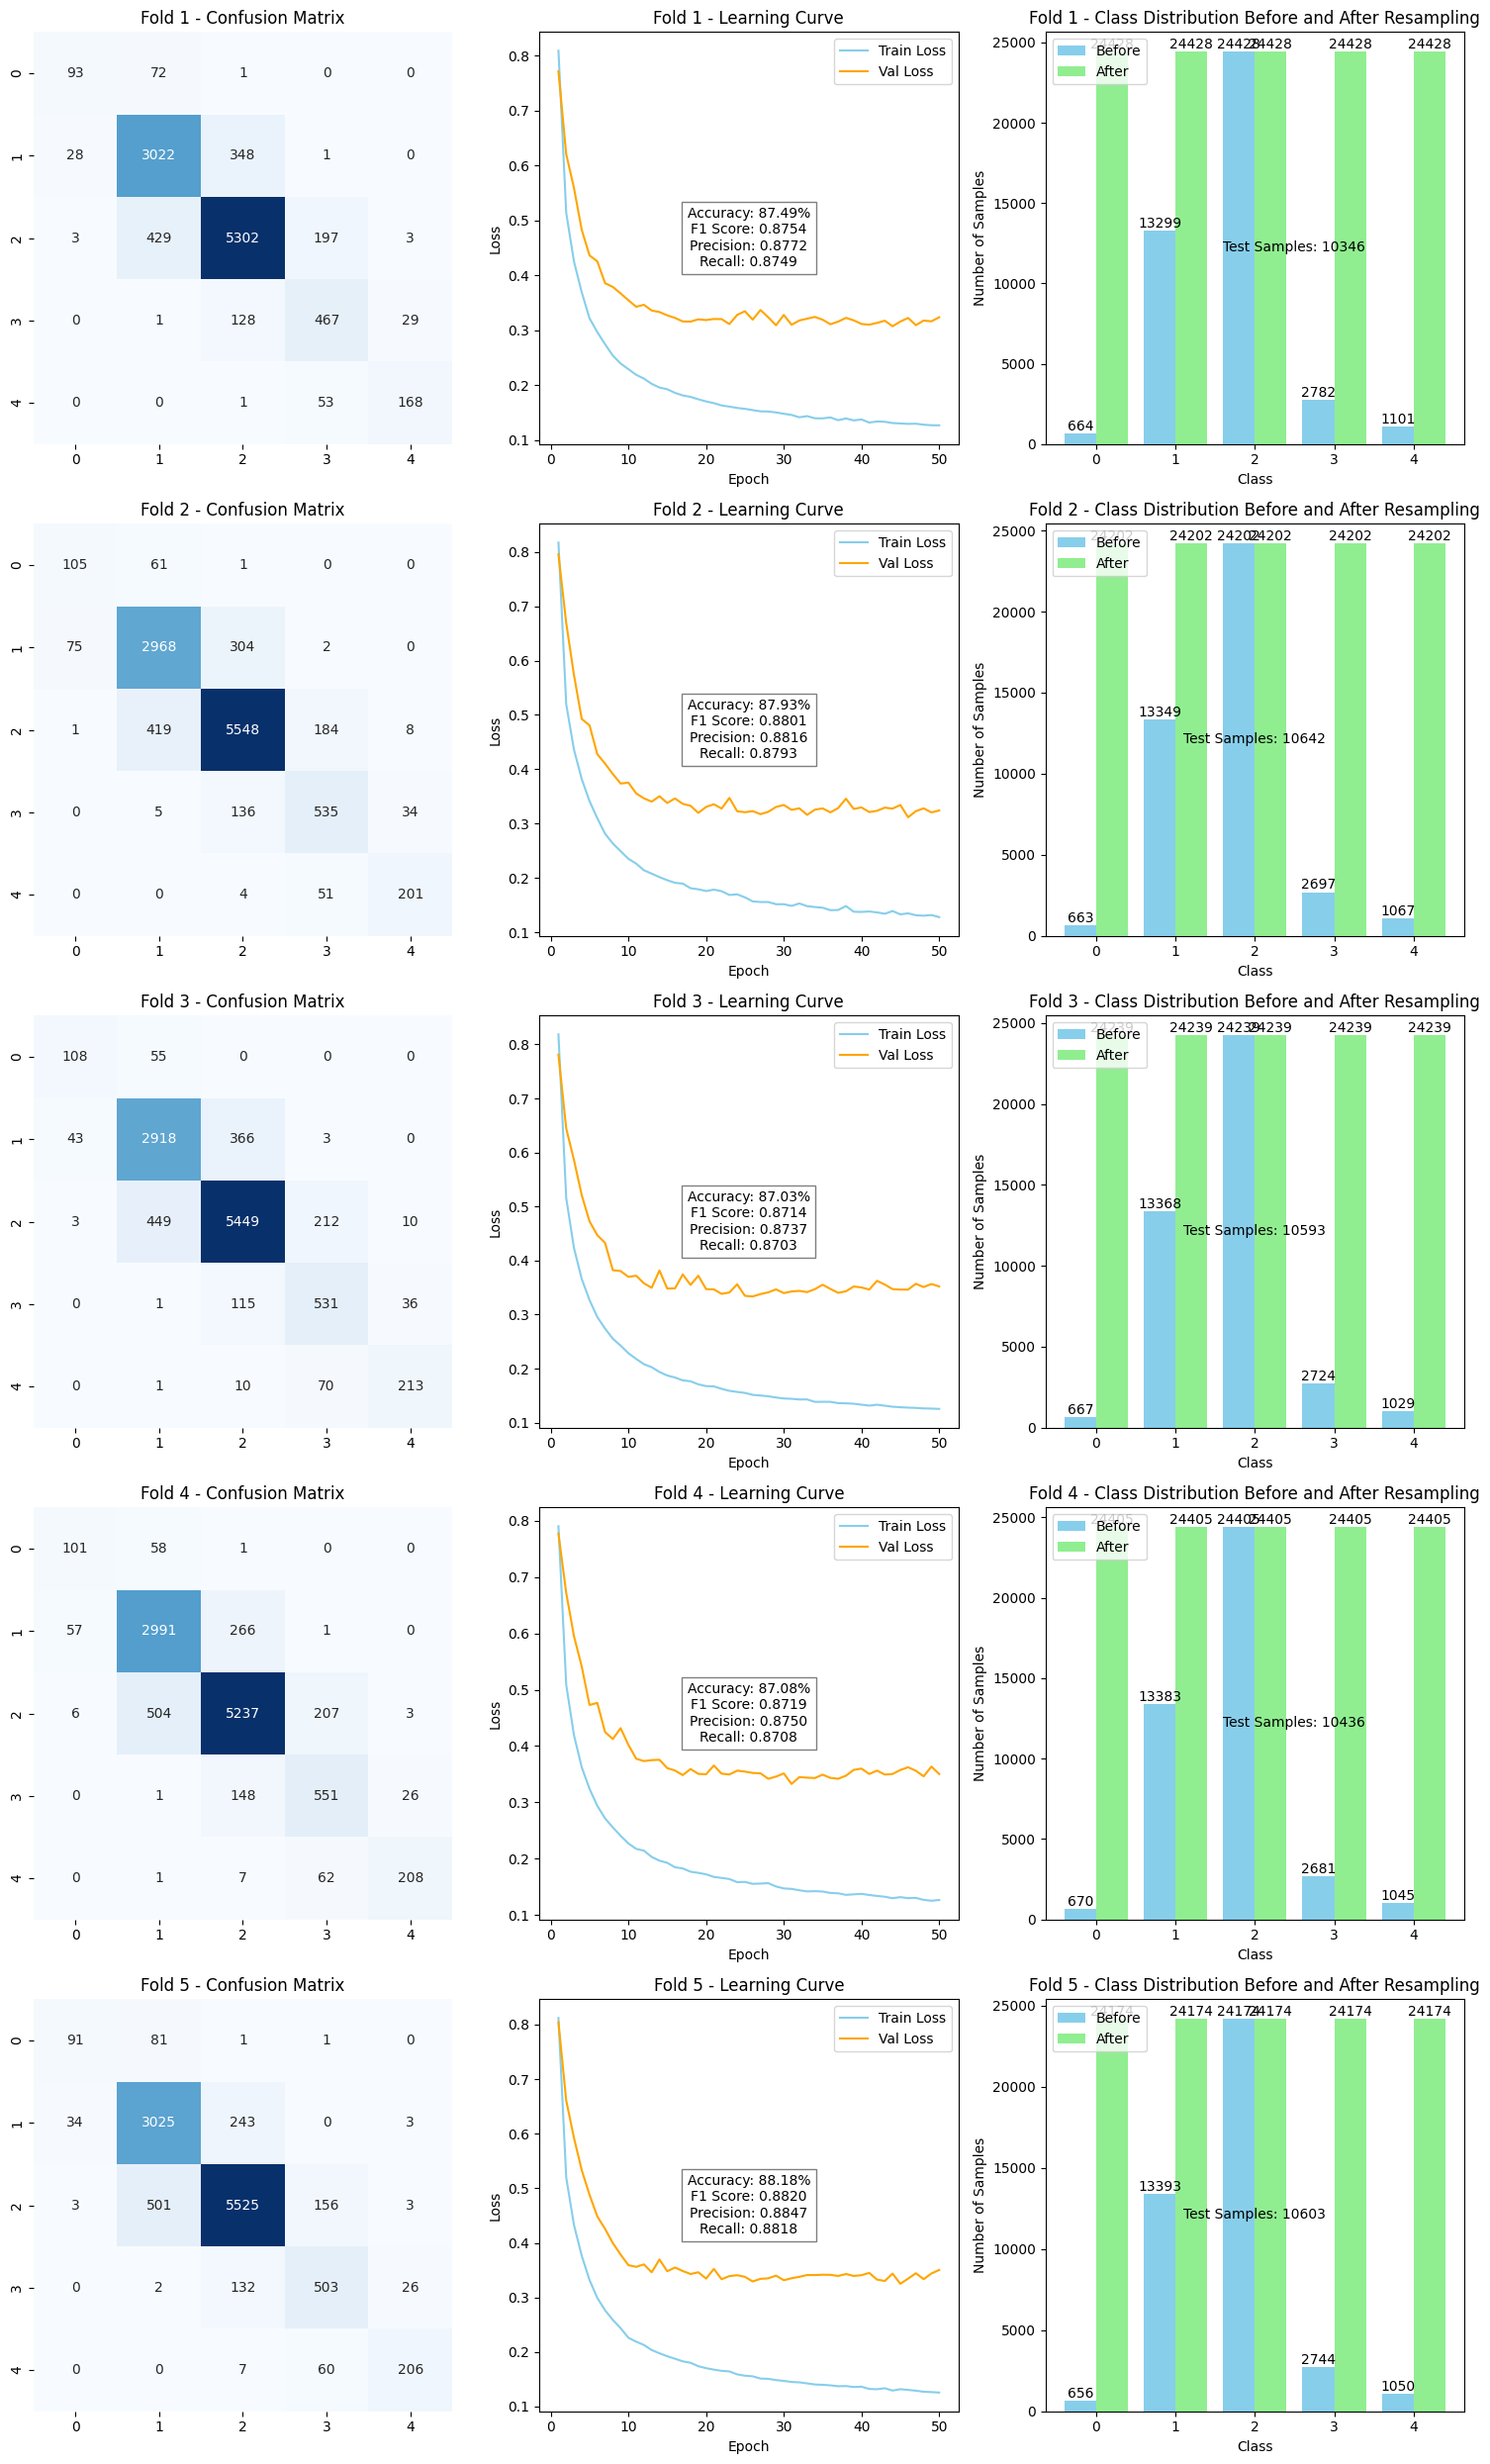

In [75]:
import seaborn as sns
from collections import Counter

fig, axes = plt.subplots(nrows=num_folds, ncols=3, figsize=(15, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = data2_conf_mat_list[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Learning Curve (Training)
    ax2 = axes[fold, 1]
    ax2.plot(range(1, len(data2_all_train_loss[fold]) + 1), data2_all_train_loss[fold], color='skyblue', label='Train Loss')
    ax2.plot(range(1, len(data2_all_val_loss[fold]) + 1), data2_all_val_loss[fold], color='orange', label='Val Loss')

    ax2.set_title(f'Fold {fold + 1} - Learning Curve')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    # Annotate with final values
    ax2.text(0.5, 0.5, f'Accuracy: {data2_accuracy_per_fold[fold]*100:.2f}%\nF1 Score: {data2_f1_per_fold[fold]:.4f}\nPrecision: {data2_precision_per_fold[fold]:.4f}\nRecall: {data2_recall_per_fold[fold]:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.5))

    # Subplot 3: Original vs. Resampled Train Samples
    ax3 = axes[fold, 2]

    original_label_counts = Counter(data2_y_train_before_resampled[fold])
    resampled_label_counts = Counter(data2_y_train_after_resampled[fold])

    original_classes = list(original_label_counts.keys())
    resampled_classes = list(resampled_label_counts.keys())

    ax3.bar([cls - 0.2 for cls in original_classes], original_label_counts.values(), width=0.4, color='skyblue', label='Before')
    ax3.bar([cls + 0.2 for cls in resampled_classes], resampled_label_counts.values(), width=0.4, color='lightgreen', label='After')

    ax3.set_title(f'Fold {fold + 1} - Class Distribution Before and After Resampling')
    ax3.set_xlabel('Class')
    ax3.set_ylabel('Number of Samples')
    ax3.set_xticks(resampled_classes)
    ax3.legend()

    # Add text labels for each class in train set
    for cls, count in original_label_counts.items():
        ax3.text(cls - 0.2, count + 2, str(count), ha='center', va='bottom')

    for cls, count in resampled_label_counts.items():
        ax3.text(cls + 0.2, count + 2, str(count), ha='center', va='bottom')

    # Add text label for the number of test samples in the center
    center_x = 0.5 * (resampled_classes[-1] - original_classes[0]) + original_classes[0]
    center_y = 0.5 * (max(max(original_label_counts.values()), max(resampled_label_counts.values())))
    ax3.text(center_x, center_y, f'Test Samples: {data2_test_sample_list[fold]}', ha='center', va='center')

# Display the subplots
plt.tight_layout()
plt.show()


# **Data3**

## **Data3 + ROS**

In [76]:
data3_X = data3.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','L1-eGFR','Stage'], axis=1)
data3_y = data3['Stage']

In [77]:
data3_label_encoder = LabelEncoder()
data3['Group'] = data3_label_encoder.fit_transform(data3['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
data3_all_folds = data3['Fold'].unique()

data3_accuracy_per_fold = []
data3_conf_mat_list = []
data3_precision_per_fold = []
data3_recall_per_fold = []
data3_f1_per_fold = []
data3_loss_per_fold = []
data3_all_train_loss = []
data3_all_val_loss = []

data3_X_train_before_resampled = []
data3_y_train_before_resampled = []
data3_X_train_after_resampled = []
data3_y_train_after_resampled = []

data3_test_sample_list = []

data3_smote = SMOTE()
oversample = RandomOverSampler()
undersample = RandomUnderSampler()

In [78]:
for fold, (train_folds, test_fold) in enumerate(kf.split(data3_all_folds)):
    train_folds = data3_all_folds[train_folds]
    test_fold = data3_all_folds[test_fold][0]
    train_indices = data3['Fold'].isin(train_folds)
    test_indices = data3['Fold'] == test_fold

    data3_X_train, data3_X_test = data3_X[train_indices], data3_X[test_indices]
    data3_y_train, data3_y_test = data3_y[train_indices], data3_y[test_indices]

    # Store the original X_train and y_train
    data3_X_train_before_resampled.append(data3_X_train)
    data3_y_train_before_resampled.append(data3_y_train)

    # Apply SMOTE only on the training data
    data3_X_train_resampled, data3_y_train_resampled = oversample.fit_resample(data3_X_train, data3_y_train)

    # Store the resampled X_train and y_train
    data3_X_train_after_resampled.append(data3_X_train_resampled)
    data3_y_train_after_resampled.append(data3_y_train_resampled)

    # Store the number of test samples
    data3_test_sample_list.append(len(data3_X_test))

    # Scale
    data3_scaler = StandardScaler()
    data3_X_train_scaled = data3_scaler.fit_transform(data3_X_train_resampled)
    data3_X_test_scaled = data3_scaler.transform(data3_X_test)

    # Encode y_train and y_test
    num_classes = len(np.unique(data3_y_train_resampled))  # Calculate the actual number of classes
    data3_y_train_one_hot = tf.keras.utils.to_categorical(data3_y_train_resampled, num_classes=num_classes)
    data3_y_test_one_hot = tf.keras.utils.to_categorical(data3_y_test, num_classes=num_classes)

    # Build and compile the model
    data3_model = Sequential([
        Dense(256, input_dim=data3_X_train_scaled.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(5, activation='softmax')
    ])

    data3_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    data3_model.compile(optimizer=data3_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    data3_history = data3_model.fit(data3_X_train_scaled, data3_y_train_one_hot,
                                    batch_size=500,
                                    epochs=50,
                                    verbose=0,
                                    validation_data=(data3_X_test_scaled, data3_y_test_one_hot))

    # Evaluate on the test set
    data3_scores = data3_model.evaluate(data3_X_test_scaled, data3_y_test_one_hot, verbose=0)
    data3_loss_per_fold.append(data3_scores[0])

    # Store metrics for analysis
    data3_all_train_loss.append(data3_history.history['loss'])
    data3_all_val_loss.append(data3_history.history['val_loss'])

    data3_y_pred = data3_model.predict(data3_X_test_scaled)
    data3_y_pred_classes = np.argmax(data3_y_pred, axis=1)
    data3_conf_mat = confusion_matrix(data3_y_test, data3_y_pred_classes)
    data3_conf_mat_list.append(data3_conf_mat)

    data3_accuracy = accuracy_score(data3_y_test, data3_y_pred_classes)
    data3_precision = precision_score(data3_y_test, data3_y_pred_classes, average='weighted')
    data3_recall = recall_score(data3_y_test, data3_y_pred_classes, average='weighted')
    data3_f1 = f1_score(data3_y_test, data3_y_pred_classes, average='weighted')

    data3_accuracy_per_fold.append(data3_accuracy)
    data3_precision_per_fold.append(data3_precision)
    data3_recall_per_fold.append(data3_recall)
    data3_f1_per_fold.append(data3_f1)

    print(f"Table: data3, Fold {fold + 1} - Loss: {data3_loss_per_fold[-1]:.4f}, Accuracy: {data3_accuracy_per_fold[-1] * 100:.2f}%")
    print(f"Precision: {data3_precision_per_fold[-1]:.4f}, Recall: {data3_recall_per_fold[-1]:.4f}, F1-Score: {data3_f1_per_fold[-1]:.4f}")


324/324 [==============================] - 1s 1ms/step
Table: data3, Fold 1 - Loss: 0.3514, Accuracy: 88.16%
Precision: 0.8877, Recall: 0.8816, F1-Score: 0.8828
332/332 [==============================] - 1s 2ms/step
Table: data3, Fold 2 - Loss: 0.3646, Accuracy: 87.98%
Precision: 0.8875, Recall: 0.8798, F1-Score: 0.8818
333/333 [==============================] - 1s 2ms/step
Table: data3, Fold 3 - Loss: 0.3732, Accuracy: 87.37%
Precision: 0.8846, Recall: 0.8737, F1-Score: 0.8769
332/332 [==============================] - 1s 2ms/step
Table: data3, Fold 4 - Loss: 0.3783, Accuracy: 87.46%
Precision: 0.8854, Recall: 0.8746, F1-Score: 0.8770
327/327 [==============================] - 1s 2ms/step
Table: data3, Fold 5 - Loss: 0.3836, Accuracy: 87.57%
Precision: 0.8851, Recall: 0.8757, F1-Score: 0.8778


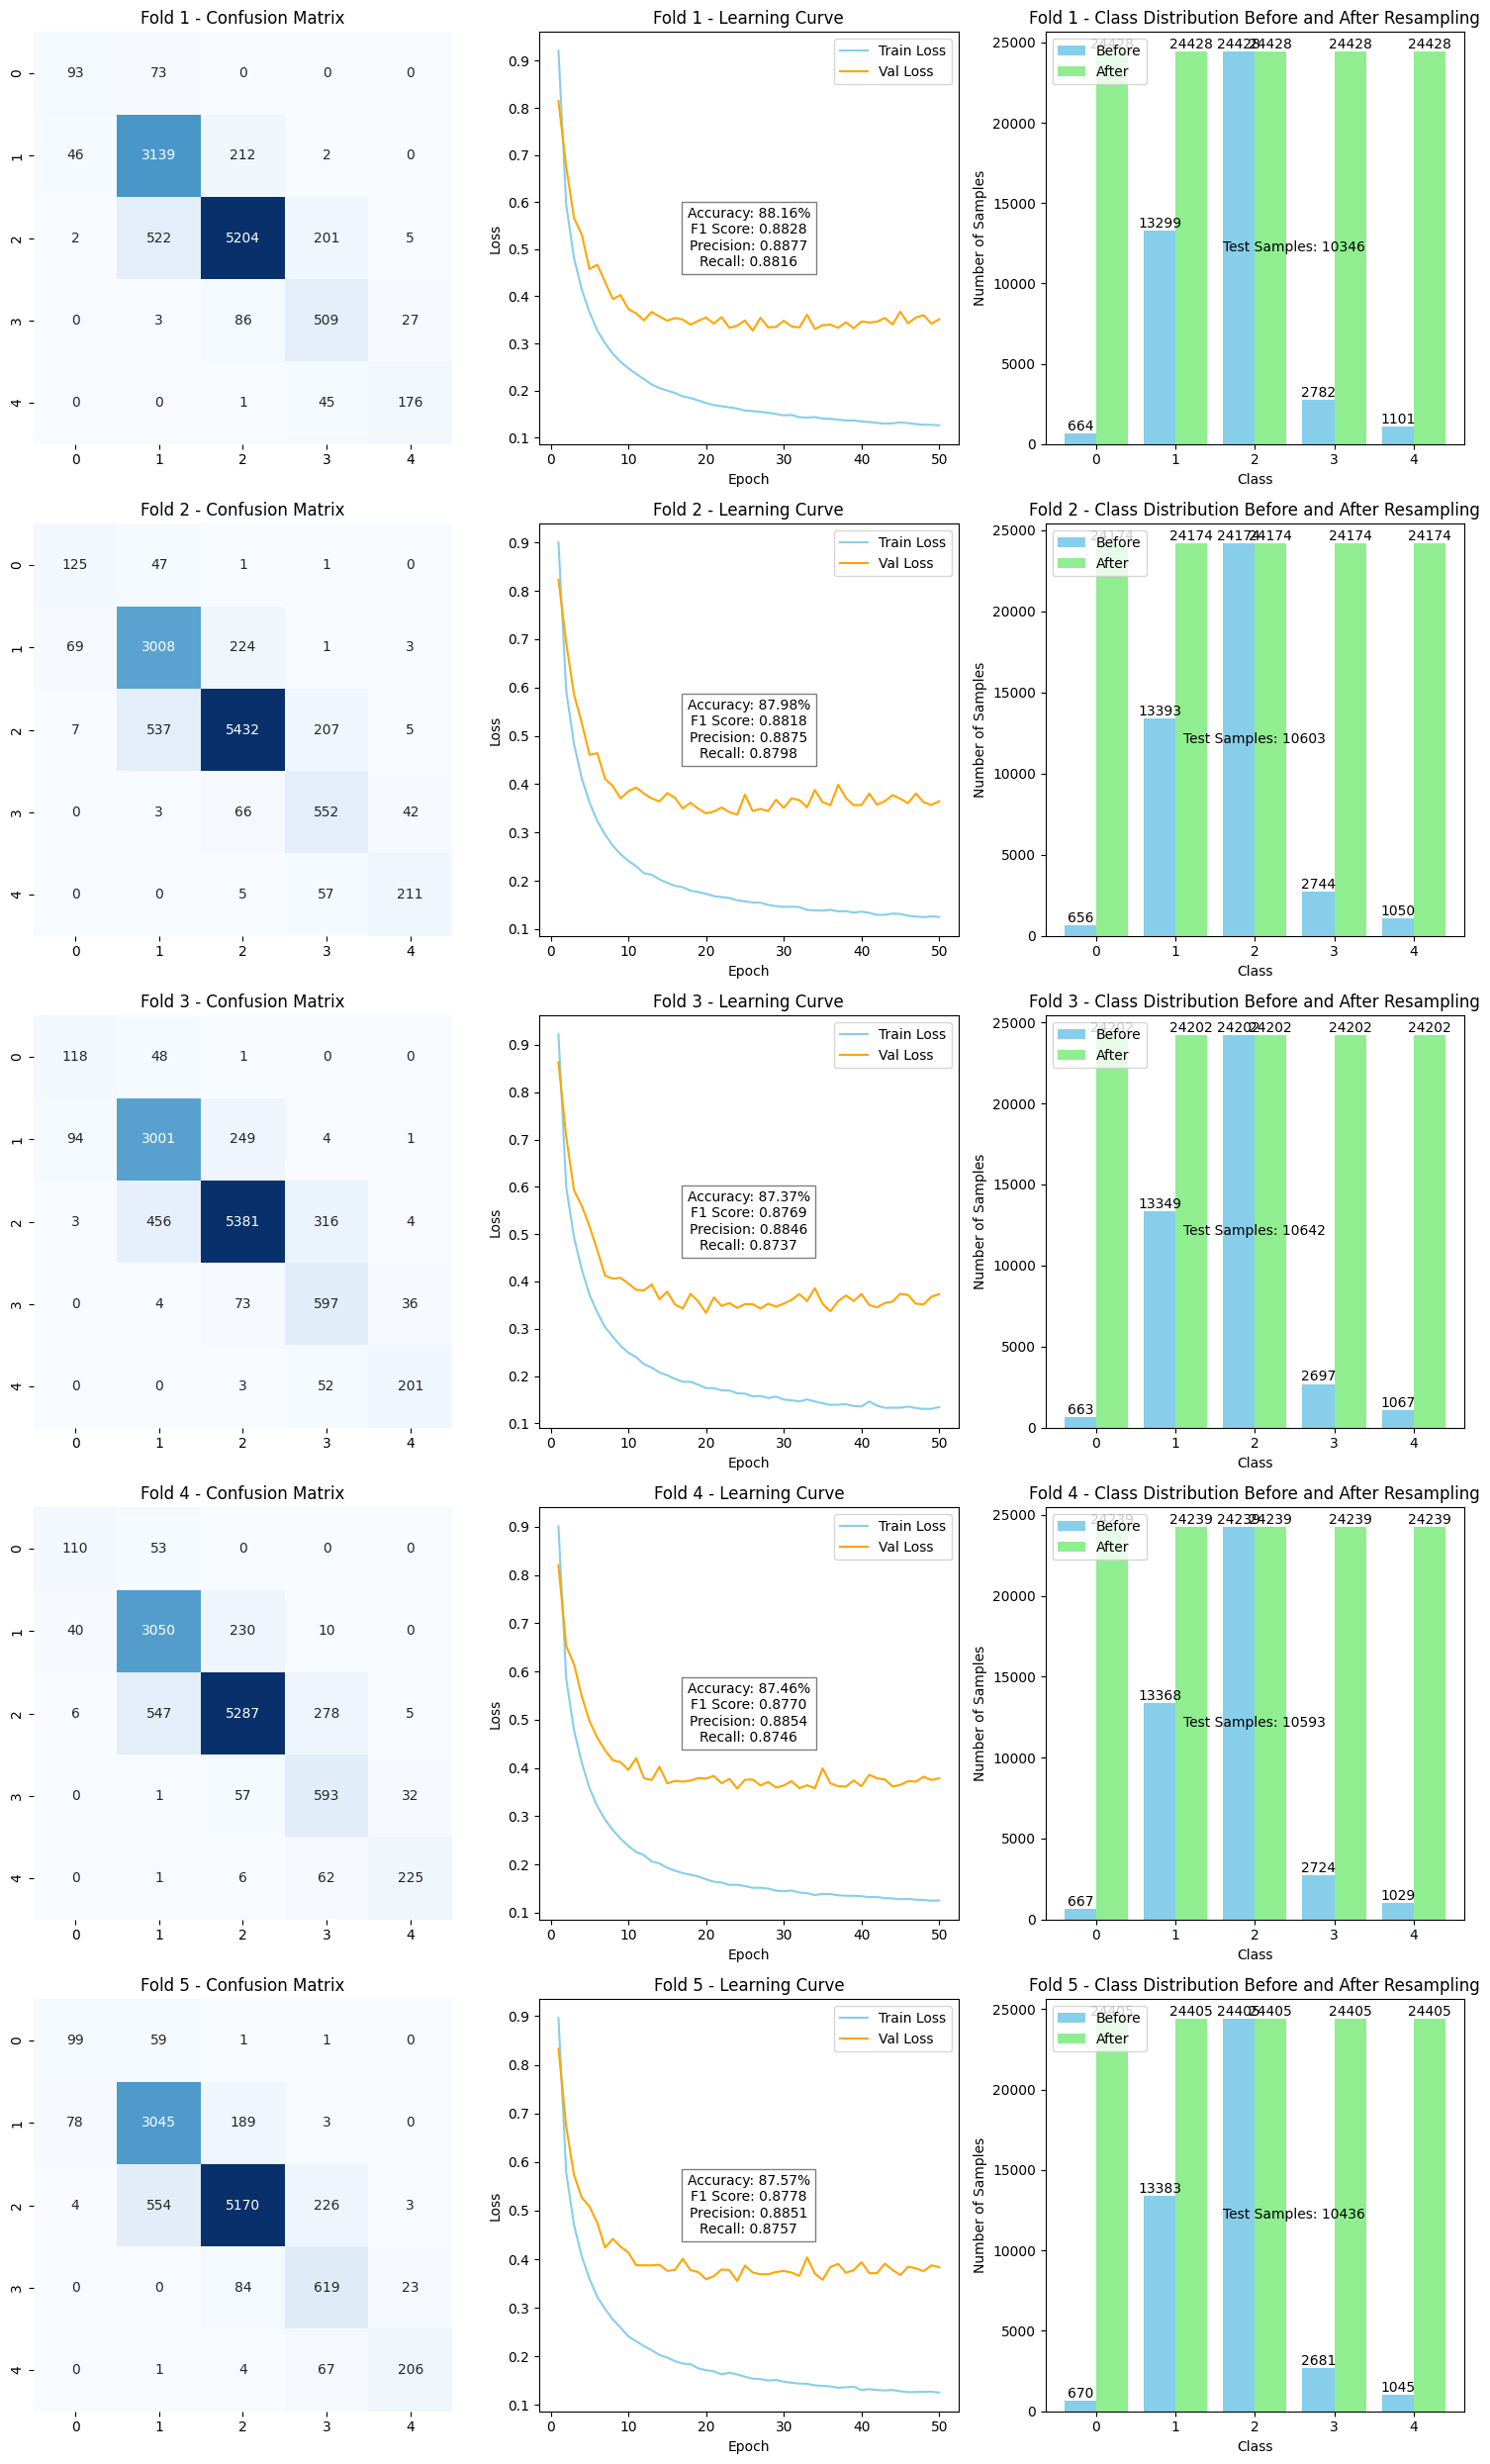

In [79]:
import seaborn as sns
from collections import Counter

fig, axes = plt.subplots(nrows=num_folds, ncols=3, figsize=(15, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = data3_conf_mat_list[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Learning Curve (Training)
    ax2 = axes[fold, 1]
    ax2.plot(range(1, len(data3_all_train_loss[fold]) + 1), data3_all_train_loss[fold], color='skyblue', label='Train Loss')
    ax2.plot(range(1, len(data3_all_val_loss[fold]) + 1), data3_all_val_loss[fold], color='orange', label='Val Loss')

    ax2.set_title(f'Fold {fold + 1} - Learning Curve')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    # Annotate with final values
    ax2.text(0.5, 0.5, f'Accuracy: {data3_accuracy_per_fold[fold]*100:.2f}%\nF1 Score: {data3_f1_per_fold[fold]:.4f}\nPrecision: {data3_precision_per_fold[fold]:.4f}\nRecall: {data3_recall_per_fold[fold]:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.5))

    # Subplot 3: Original vs. Resampled Train Samples
    ax3 = axes[fold, 2]

    original_label_counts = Counter(data3_y_train_before_resampled[fold])
    resampled_label_counts = Counter(data3_y_train_after_resampled[fold])

    original_classes = list(original_label_counts.keys())
    resampled_classes = list(resampled_label_counts.keys())

    ax3.bar([cls - 0.2 for cls in original_classes], original_label_counts.values(), width=0.4, color='skyblue', label='Before')
    ax3.bar([cls + 0.2 for cls in resampled_classes], resampled_label_counts.values(), width=0.4, color='lightgreen', label='After')

    ax3.set_title(f'Fold {fold + 1} - Class Distribution Before and After Resampling')
    ax3.set_xlabel('Class')
    ax3.set_ylabel('Number of Samples')
    ax3.set_xticks(resampled_classes)
    ax3.legend()

    # Add text labels for each class in train set
    for cls, count in original_label_counts.items():
        ax3.text(cls - 0.2, count + 2, str(count), ha='center', va='bottom')

    for cls, count in resampled_label_counts.items():
        ax3.text(cls + 0.2, count + 2, str(count), ha='center', va='bottom')

    # Add text label for the number of test samples in the center
    center_x = 0.5 * (resampled_classes[-1] - original_classes[0]) + original_classes[0]
    center_y = 0.5 * (max(max(original_label_counts.values()), max(resampled_label_counts.values())))
    ax3.text(center_x, center_y, f'Test Samples: {data3_test_sample_list[fold]}', ha='center', va='center')

# Display the subplots
plt.tight_layout()
plt.show()


## **Data3 + RUS**

In [80]:
data3_X = data3.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','L1-eGFR','Stage'], axis=1)
data3_y = data3['Stage']

In [81]:
data3_label_encoder = LabelEncoder()
data3['Group'] = data3_label_encoder.fit_transform(data3['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
data3_all_folds = data3['Fold'].unique()

data3_accuracy_per_fold = []
data3_conf_mat_list = []
data3_precision_per_fold = []
data3_recall_per_fold = []
data3_f1_per_fold = []
data3_loss_per_fold = []
data3_all_train_loss = []
data3_all_val_loss = []

data3_X_train_before_resampled = []
data3_y_train_before_resampled = []
data3_X_train_after_resampled = []
data3_y_train_after_resampled = []

data3_test_sample_list = []

data3_smote = SMOTE()
oversample = RandomOverSampler()
undersample = RandomUnderSampler()

In [82]:
for fold, (train_folds, test_fold) in enumerate(kf.split(data3_all_folds)):
    train_folds = data3_all_folds[train_folds]
    test_fold = data3_all_folds[test_fold][0]
    train_indices = data3['Fold'].isin(train_folds)
    test_indices = data3['Fold'] == test_fold

    data3_X_train, data3_X_test = data3_X[train_indices], data3_X[test_indices]
    data3_y_train, data3_y_test = data3_y[train_indices], data3_y[test_indices]

    # Store the original X_train and y_train
    data3_X_train_before_resampled.append(data3_X_train)
    data3_y_train_before_resampled.append(data3_y_train)

    # Apply SMOTE only on the training data
    data3_X_train_resampled, data3_y_train_resampled = undersample.fit_resample(data3_X_train, data3_y_train)

    # Store the resampled X_train and y_train
    data3_X_train_after_resampled.append(data3_X_train_resampled)
    data3_y_train_after_resampled.append(data3_y_train_resampled)

    # Store the number of test samples
    data3_test_sample_list.append(len(data3_X_test))

    # Scale
    data3_scaler = StandardScaler()
    data3_X_train_scaled = data3_scaler.fit_transform(data3_X_train_resampled)
    data3_X_test_scaled = data3_scaler.transform(data3_X_test)

    # Encode y_train and y_test
    num_classes = len(np.unique(data3_y_train_resampled))  # Calculate the actual number of classes
    data3_y_train_one_hot = tf.keras.utils.to_categorical(data3_y_train_resampled, num_classes=num_classes)
    data3_y_test_one_hot = tf.keras.utils.to_categorical(data3_y_test, num_classes=num_classes)

    # Build and compile the model
    data3_model = Sequential([
        Dense(256, input_dim=data3_X_train_scaled.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(5, activation='softmax')
    ])

    data3_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    data3_model.compile(optimizer=data3_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    data3_history = data3_model.fit(data3_X_train_scaled, data3_y_train_one_hot,
                                    batch_size=500,
                                    epochs=50,
                                    verbose=0,
                                    validation_data=(data3_X_test_scaled, data3_y_test_one_hot))

    # Evaluate on the test set
    data3_scores = data3_model.evaluate(data3_X_test_scaled, data3_y_test_one_hot, verbose=0)
    data3_loss_per_fold.append(data3_scores[0])

    # Store metrics for analysis
    data3_all_train_loss.append(data3_history.history['loss'])
    data3_all_val_loss.append(data3_history.history['val_loss'])

    data3_y_pred = data3_model.predict(data3_X_test_scaled)
    data3_y_pred_classes = np.argmax(data3_y_pred, axis=1)
    data3_conf_mat = confusion_matrix(data3_y_test, data3_y_pred_classes)
    data3_conf_mat_list.append(data3_conf_mat)

    data3_accuracy = accuracy_score(data3_y_test, data3_y_pred_classes)
    data3_precision = precision_score(data3_y_test, data3_y_pred_classes, average='weighted')
    data3_recall = recall_score(data3_y_test, data3_y_pred_classes, average='weighted')
    data3_f1 = f1_score(data3_y_test, data3_y_pred_classes, average='weighted')

    data3_accuracy_per_fold.append(data3_accuracy)
    data3_precision_per_fold.append(data3_precision)
    data3_recall_per_fold.append(data3_recall)
    data3_f1_per_fold.append(data3_f1)

    print(f"Table: data3, Fold {fold + 1} - Loss: {data3_loss_per_fold[-1]:.4f}, Accuracy: {data3_accuracy_per_fold[-1] * 100:.2f}%")
    print(f"Precision: {data3_precision_per_fold[-1]:.4f}, Recall: {data3_recall_per_fold[-1]:.4f}, F1-Score: {data3_f1_per_fold[-1]:.4f}")


333/333 [==============================] - 1s 2ms/step
Table: data3, Fold 1 - Loss: 0.8373, Accuracy: 64.03%
Precision: 0.7056, Recall: 0.6403, F1-Score: 0.6585
332/332 [==============================] - 1s 2ms/step
Table: data3, Fold 2 - Loss: 0.8545, Accuracy: 64.17%
Precision: 0.7120, Recall: 0.6417, F1-Score: 0.6618
327/327 [==============================] - 1s 2ms/step
Table: data3, Fold 3 - Loss: 0.9454, Accuracy: 61.29%
Precision: 0.6945, Recall: 0.6129, F1-Score: 0.6365
332/332 [==============================] - 1s 2ms/step
Table: data3, Fold 4 - Loss: 0.9145, Accuracy: 62.49%
Precision: 0.7023, Recall: 0.6249, F1-Score: 0.6441
324/324 [==============================] - 1s 2ms/step
Table: data3, Fold 5 - Loss: 0.8991, Accuracy: 63.19%
Precision: 0.7010, Recall: 0.6319, F1-Score: 0.6526


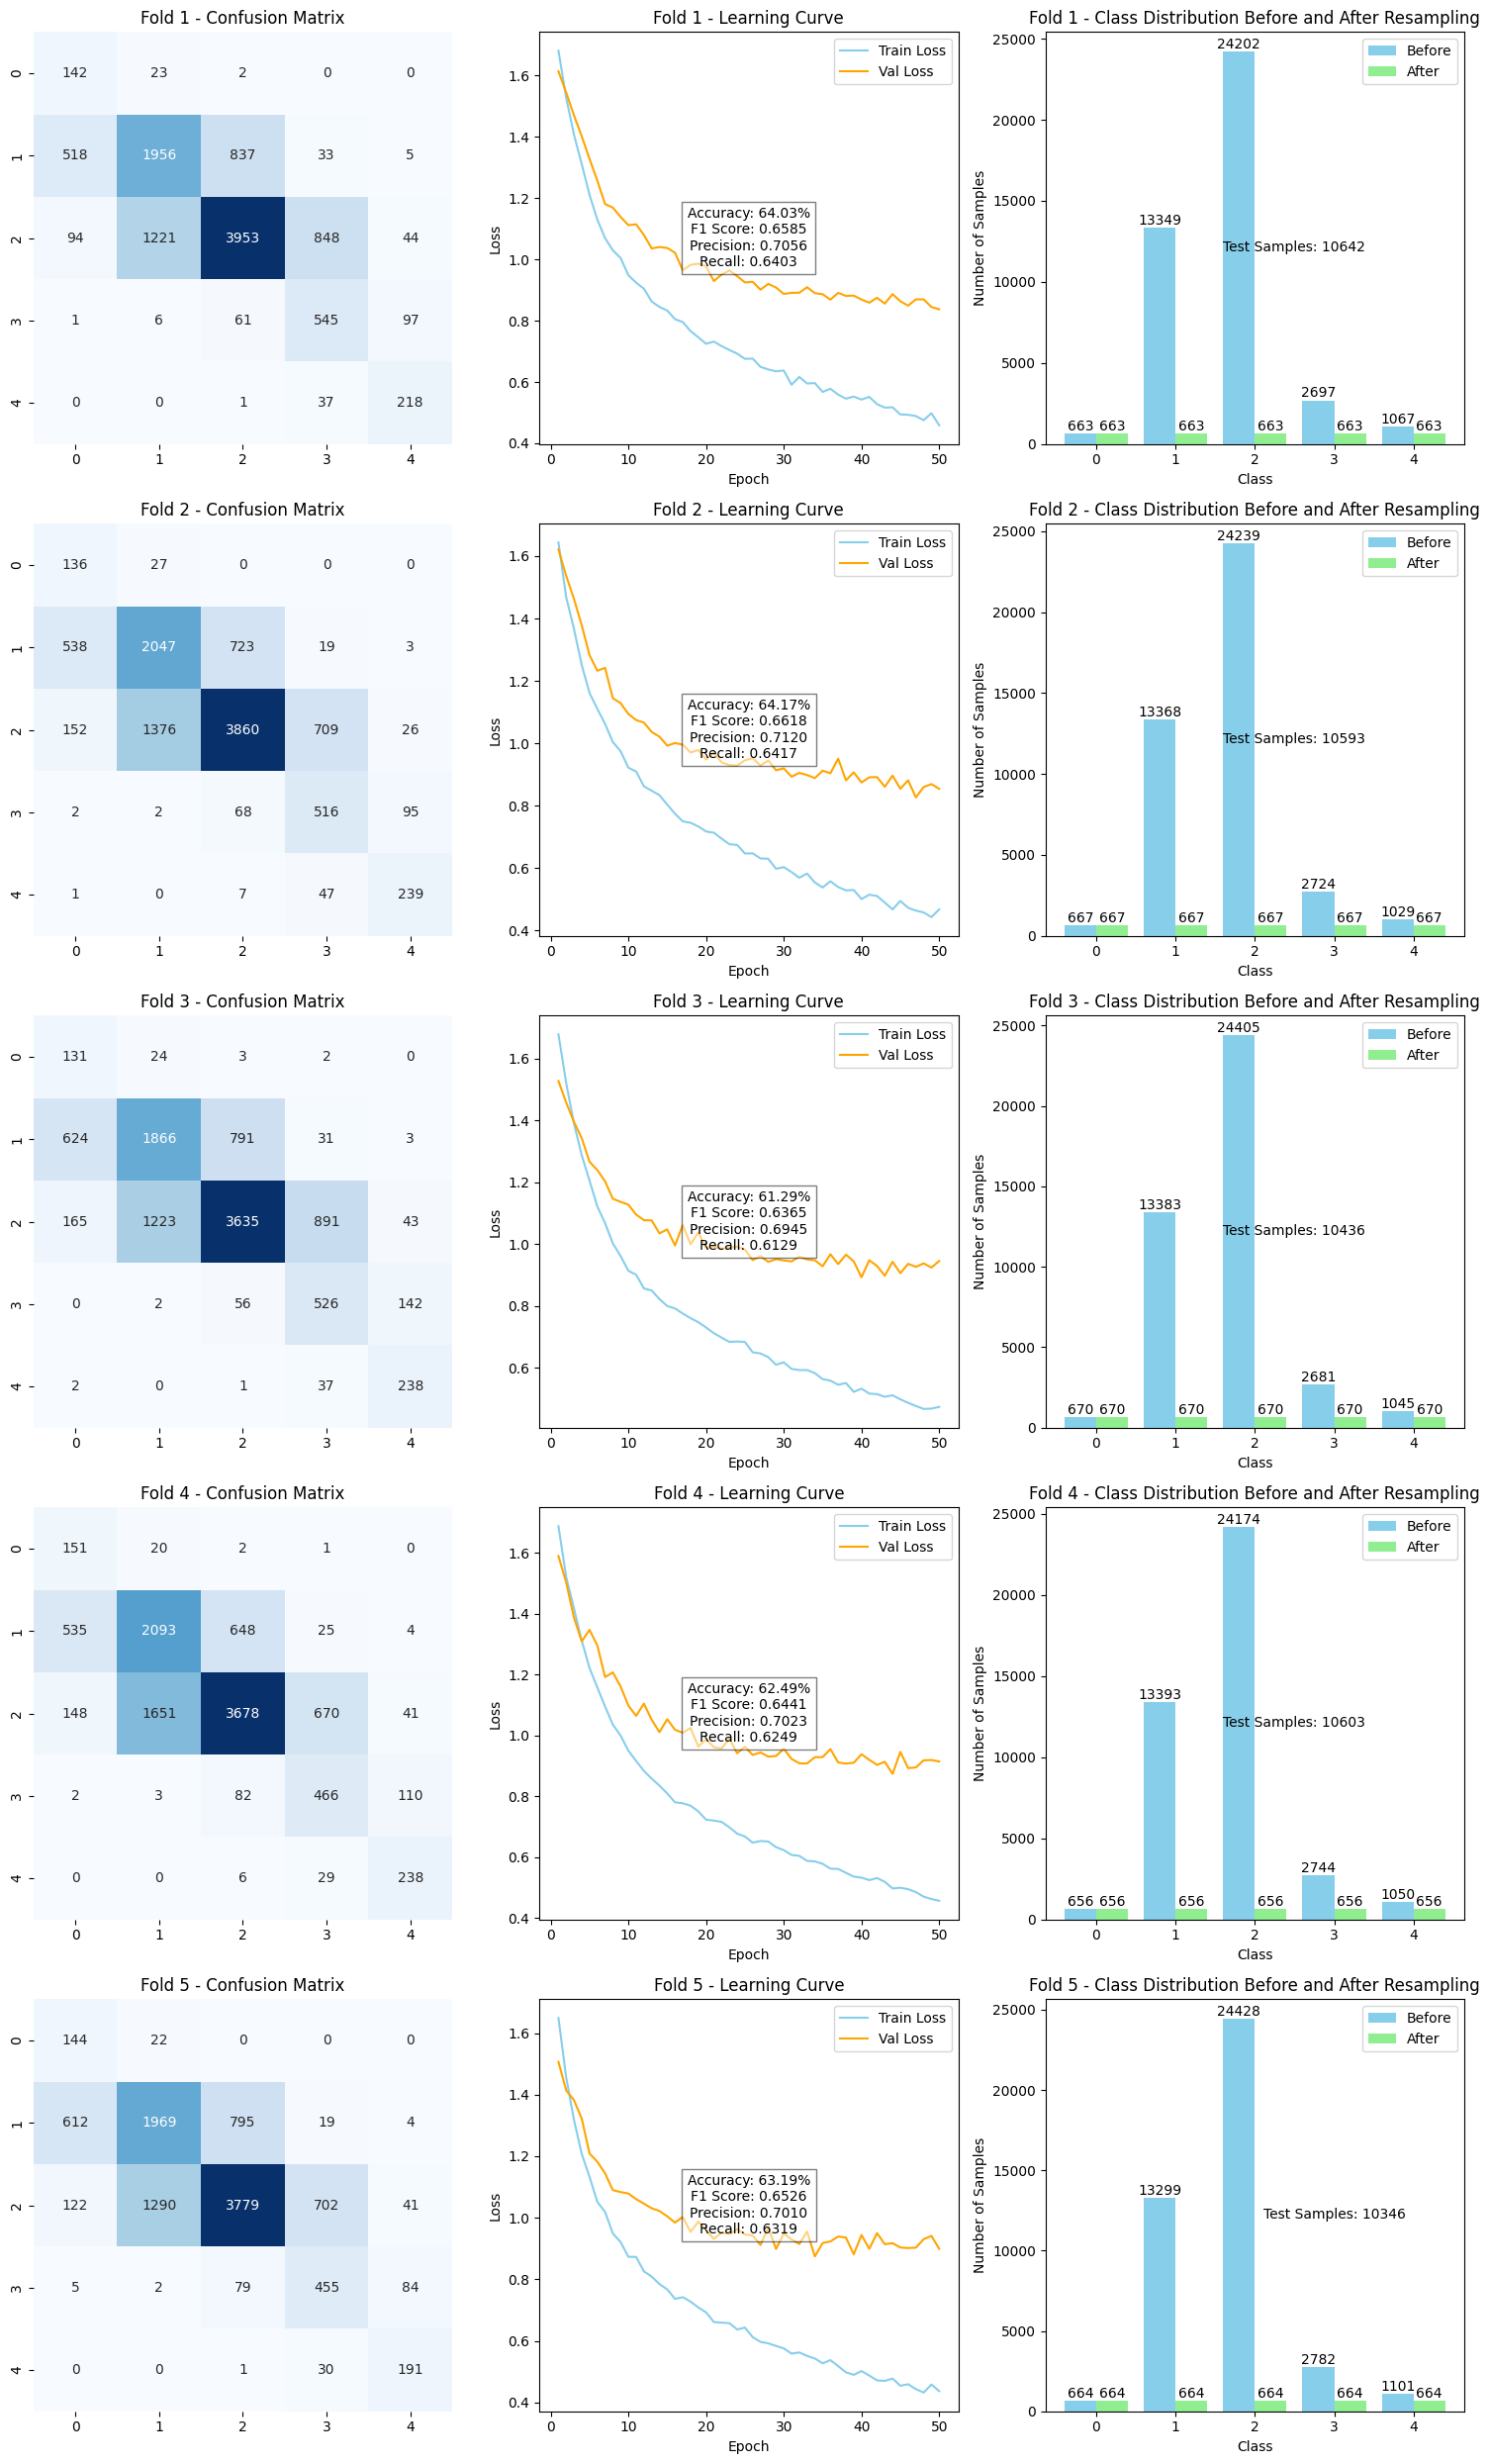

In [83]:
import seaborn as sns
from collections import Counter

fig, axes = plt.subplots(nrows=num_folds, ncols=3, figsize=(15, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = data3_conf_mat_list[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Learning Curve (Training)
    ax2 = axes[fold, 1]
    ax2.plot(range(1, len(data3_all_train_loss[fold]) + 1), data3_all_train_loss[fold], color='skyblue', label='Train Loss')
    ax2.plot(range(1, len(data3_all_val_loss[fold]) + 1), data3_all_val_loss[fold], color='orange', label='Val Loss')

    ax2.set_title(f'Fold {fold + 1} - Learning Curve')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    # Annotate with final values
    ax2.text(0.5, 0.5, f'Accuracy: {data3_accuracy_per_fold[fold]*100:.2f}%\nF1 Score: {data3_f1_per_fold[fold]:.4f}\nPrecision: {data3_precision_per_fold[fold]:.4f}\nRecall: {data3_recall_per_fold[fold]:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.5))

    # Subplot 3: Original vs. Resampled Train Samples
    ax3 = axes[fold, 2]

    original_label_counts = Counter(data3_y_train_before_resampled[fold])
    resampled_label_counts = Counter(data3_y_train_after_resampled[fold])

    original_classes = list(original_label_counts.keys())
    resampled_classes = list(resampled_label_counts.keys())

    ax3.bar([cls - 0.2 for cls in original_classes], original_label_counts.values(), width=0.4, color='skyblue', label='Before')
    ax3.bar([cls + 0.2 for cls in resampled_classes], resampled_label_counts.values(), width=0.4, color='lightgreen', label='After')

    ax3.set_title(f'Fold {fold + 1} - Class Distribution Before and After Resampling')
    ax3.set_xlabel('Class')
    ax3.set_ylabel('Number of Samples')
    ax3.set_xticks(resampled_classes)
    ax3.legend()

    # Add text labels for each class in train set
    for cls, count in original_label_counts.items():
        ax3.text(cls - 0.2, count + 2, str(count), ha='center', va='bottom')

    for cls, count in resampled_label_counts.items():
        ax3.text(cls + 0.2, count + 2, str(count), ha='center', va='bottom')

    # Add text label for the number of test samples in the center
    center_x = 0.5 * (resampled_classes[-1] - original_classes[0]) + original_classes[0]
    center_y = 0.5 * (max(max(original_label_counts.values()), max(resampled_label_counts.values())))
    ax3.text(center_x, center_y, f'Test Samples: {data3_test_sample_list[fold]}', ha='center', va='center')

# Display the subplots
plt.tight_layout()
plt.show()


## **Data3 + SMOTE**

In [84]:
data3_X = data3.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','L1-eGFR','Stage'], axis=1)
data3_y = data3['Stage']

In [85]:
data3_label_encoder = LabelEncoder()
data3['Group'] = data3_label_encoder.fit_transform(data3['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
data3_all_folds = data3['Fold'].unique()

data3_accuracy_per_fold = []
data3_conf_mat_list = []
data3_precision_per_fold = []
data3_recall_per_fold = []
data3_f1_per_fold = []
data3_loss_per_fold = []
data3_all_train_loss = []
data3_all_val_loss = []

data3_X_train_before_resampled = []
data3_y_train_before_resampled = []
data3_X_train_after_resampled = []
data3_y_train_after_resampled = []

data3_test_sample_list = []

data3_smote = SMOTE()
oversample = RandomOverSampler()
undersample = RandomUnderSampler()

In [86]:
for fold, (train_folds, test_fold) in enumerate(kf.split(data3_all_folds)):
    train_folds = data3_all_folds[train_folds]
    test_fold = data3_all_folds[test_fold][0]
    train_indices = data3['Fold'].isin(train_folds)
    test_indices = data3['Fold'] == test_fold

    data3_X_train, data3_X_test = data3_X[train_indices], data3_X[test_indices]
    data3_y_train, data3_y_test = data3_y[train_indices], data3_y[test_indices]

    # Store the original X_train and y_train
    data3_X_train_before_resampled.append(data3_X_train)
    data3_y_train_before_resampled.append(data3_y_train)

    # Apply SMOTE only on the training data
    data3_X_train_resampled, data3_y_train_resampled = data3_smote.fit_resample(data3_X_train, data3_y_train)

    # Store the resampled X_train and y_train
    data3_X_train_after_resampled.append(data3_X_train_resampled)
    data3_y_train_after_resampled.append(data3_y_train_resampled)

    # Store the number of test samples
    data3_test_sample_list.append(len(data3_X_test))

    # Scale
    data3_scaler = StandardScaler()
    data3_X_train_scaled = data3_scaler.fit_transform(data3_X_train_resampled)
    data3_X_test_scaled = data3_scaler.transform(data3_X_test)

    # Encode y_train and y_test
    num_classes = len(np.unique(data3_y_train_resampled))  # Calculate the actual number of classes
    data3_y_train_one_hot = tf.keras.utils.to_categorical(data3_y_train_resampled, num_classes=num_classes)
    data3_y_test_one_hot = tf.keras.utils.to_categorical(data3_y_test, num_classes=num_classes)

    # Build and compile the model
    data3_model = Sequential([
        Dense(256, input_dim=data3_X_train_scaled.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(5, activation='softmax')
    ])

    data3_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    data3_model.compile(optimizer=data3_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    data3_history = data3_model.fit(data3_X_train_scaled, data3_y_train_one_hot,
                                    batch_size=500,
                                    epochs=50,
                                    verbose=0,
                                    validation_data=(data3_X_test_scaled, data3_y_test_one_hot))

    # Evaluate on the test set
    data3_scores = data3_model.evaluate(data3_X_test_scaled, data3_y_test_one_hot, verbose=0)
    data3_loss_per_fold.append(data3_scores[0])

    # Store metrics for analysis
    data3_all_train_loss.append(data3_history.history['loss'])
    data3_all_val_loss.append(data3_history.history['val_loss'])

    data3_y_pred = data3_model.predict(data3_X_test_scaled)
    data3_y_pred_classes = np.argmax(data3_y_pred, axis=1)
    data3_conf_mat = confusion_matrix(data3_y_test, data3_y_pred_classes)
    data3_conf_mat_list.append(data3_conf_mat)

    data3_accuracy = accuracy_score(data3_y_test, data3_y_pred_classes)
    data3_precision = precision_score(data3_y_test, data3_y_pred_classes, average='weighted')
    data3_recall = recall_score(data3_y_test, data3_y_pred_classes, average='weighted')
    data3_f1 = f1_score(data3_y_test, data3_y_pred_classes, average='weighted')

    data3_accuracy_per_fold.append(data3_accuracy)
    data3_precision_per_fold.append(data3_precision)
    data3_recall_per_fold.append(data3_recall)
    data3_f1_per_fold.append(data3_f1)

    print(f"Table: data3, Fold {fold + 1} - Loss: {data3_loss_per_fold[-1]:.4f}, Accuracy: {data3_accuracy_per_fold[-1] * 100:.2f}%")
    print(f"Precision: {data3_precision_per_fold[-1]:.4f}, Recall: {data3_recall_per_fold[-1]:.4f}, F1-Score: {data3_f1_per_fold[-1]:.4f}")


327/327 [==============================] - 1s 1ms/step
Table: data3, Fold 1 - Loss: 0.3571, Accuracy: 87.37%
Precision: 0.8775, Recall: 0.8737, F1-Score: 0.8746
332/332 [==============================] - 1s 1ms/step
Table: data3, Fold 2 - Loss: 0.3519, Accuracy: 87.67%
Precision: 0.8796, Recall: 0.8767, F1-Score: 0.8775
332/332 [==============================] - 1s 2ms/step
Table: data3, Fold 3 - Loss: 0.3404, Accuracy: 87.40%
Precision: 0.8802, Recall: 0.8740, F1-Score: 0.8752
324/324 [==============================] - 1s 1ms/step
Table: data3, Fold 4 - Loss: 0.3356, Accuracy: 87.64%
Precision: 0.8777, Recall: 0.8764, F1-Score: 0.8764
333/333 [==============================] - 1s 2ms/step
Table: data3, Fold 5 - Loss: 0.3371, Accuracy: 87.88%
Precision: 0.8850, Recall: 0.8788, F1-Score: 0.8802


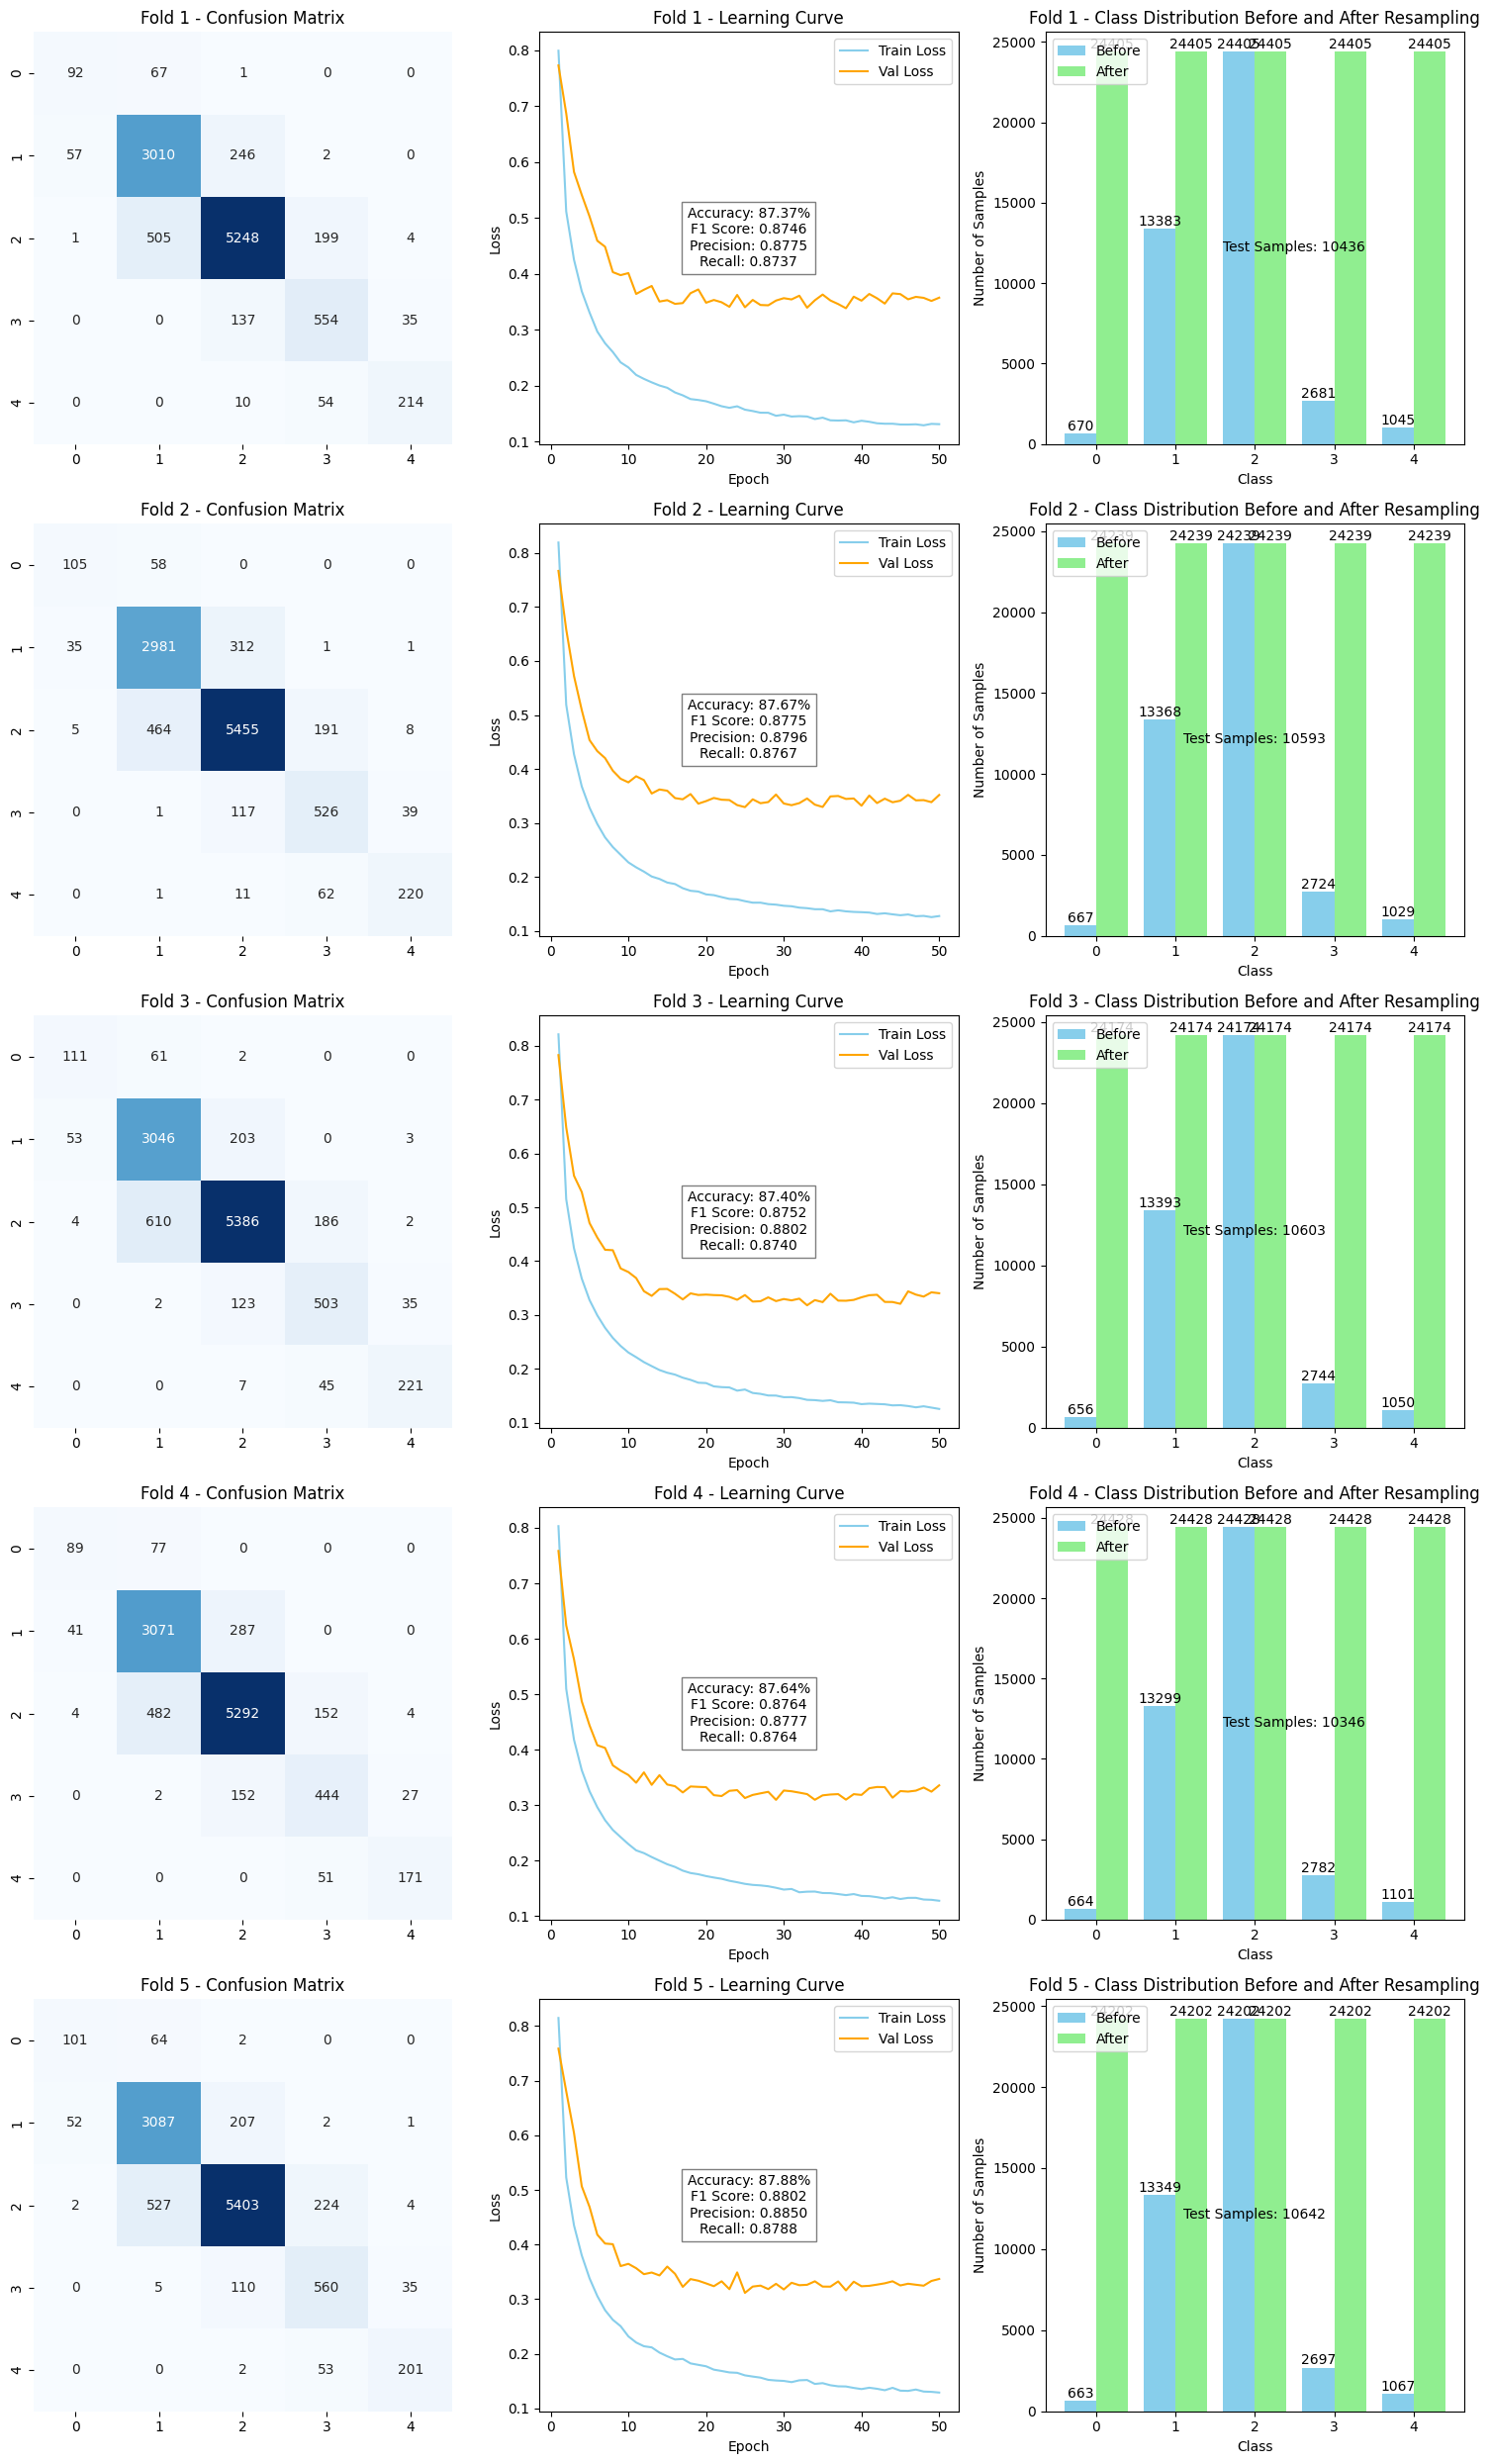

In [87]:
import seaborn as sns
from collections import Counter

fig, axes = plt.subplots(nrows=num_folds, ncols=3, figsize=(15, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = data3_conf_mat_list[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Learning Curve (Training)
    ax2 = axes[fold, 1]
    ax2.plot(range(1, len(data3_all_train_loss[fold]) + 1), data3_all_train_loss[fold], color='skyblue', label='Train Loss')
    ax2.plot(range(1, len(data3_all_val_loss[fold]) + 1), data3_all_val_loss[fold], color='orange', label='Val Loss')

    ax2.set_title(f'Fold {fold + 1} - Learning Curve')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    # Annotate with final values
    ax2.text(0.5, 0.5, f'Accuracy: {data3_accuracy_per_fold[fold]*100:.2f}%\nF1 Score: {data3_f1_per_fold[fold]:.4f}\nPrecision: {data3_precision_per_fold[fold]:.4f}\nRecall: {data3_recall_per_fold[fold]:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.5))

    # Subplot 3: Original vs. Resampled Train Samples
    ax3 = axes[fold, 2]

    original_label_counts = Counter(data3_y_train_before_resampled[fold])
    resampled_label_counts = Counter(data3_y_train_after_resampled[fold])

    original_classes = list(original_label_counts.keys())
    resampled_classes = list(resampled_label_counts.keys())

    ax3.bar([cls - 0.2 for cls in original_classes], original_label_counts.values(), width=0.4, color='skyblue', label='Before')
    ax3.bar([cls + 0.2 for cls in resampled_classes], resampled_label_counts.values(), width=0.4, color='lightgreen', label='After')

    ax3.set_title(f'Fold {fold + 1} - Class Distribution Before and After Resampling')
    ax3.set_xlabel('Class')
    ax3.set_ylabel('Number of Samples')
    ax3.set_xticks(resampled_classes)
    ax3.legend()

    # Add text labels for each class in train set
    for cls, count in original_label_counts.items():
        ax3.text(cls - 0.2, count + 2, str(count), ha='center', va='bottom')

    for cls, count in resampled_label_counts.items():
        ax3.text(cls + 0.2, count + 2, str(count), ha='center', va='bottom')

    # Add text label for the number of test samples in the center
    center_x = 0.5 * (resampled_classes[-1] - original_classes[0]) + original_classes[0]
    center_y = 0.5 * (max(max(original_label_counts.values()), max(resampled_label_counts.values())))
    ax3.text(center_x, center_y, f'Test Samples: {data3_test_sample_list[fold]}', ha='center', va='center')

# Display the subplots
plt.tight_layout()
plt.show()


# **Cumulative confusion matrices**

In [88]:
bi3_conf_mat_list

[array([[  89,   77,    0,    0,    0],
        [  57, 3035,  307,    0,    0],
        [   4,  523, 5180,  222,    5],
        [   0,    4,  136,  453,   32],
        [   0,    0,    2,   51,  169]]),
 array([[  81,   73,    6,    0,    0],
        [  61, 2775,  476,    3,    0],
        [   4,  341, 5366,  243,    3],
        [   0,    0,  150,  535,   41],
        [   0,    1,    4,   56,  217]]),
 array([[  84,   81,    2,    0,    0],
        [  65, 2961,  320,    3,    0],
        [   1,  432, 5446,  277,    4],
        [   0,    5,  113,  568,   24],
        [   0,    0,    3,   68,  185]]),
 array([[  94,   78,    1,    1,    0],
        [  33, 3045,  222,    3,    2],
        [   3,  912, 5020,  250,    3],
        [   0,    3,  110,  526,   24],
        [   0,    0,    8,   67,  198]]),
 array([[  94,   69,    0,    0,    0],
        [  39, 2923,  367,    1,    0],
        [   4,  507, 5337,  273,    2],
        [   0,    1,  104,  547,   31],
        [   0,    1,    7,   75,

In [89]:
data3_conf_mat_list

[array([[  92,   67,    1,    0,    0],
        [  57, 3010,  246,    2,    0],
        [   1,  505, 5248,  199,    4],
        [   0,    0,  137,  554,   35],
        [   0,    0,   10,   54,  214]]),
 array([[ 105,   58,    0,    0,    0],
        [  35, 2981,  312,    1,    1],
        [   5,  464, 5455,  191,    8],
        [   0,    1,  117,  526,   39],
        [   0,    1,   11,   62,  220]]),
 array([[ 111,   61,    2,    0,    0],
        [  53, 3046,  203,    0,    3],
        [   4,  610, 5386,  186,    2],
        [   0,    2,  123,  503,   35],
        [   0,    0,    7,   45,  221]]),
 array([[  89,   77,    0,    0,    0],
        [  41, 3071,  287,    0,    0],
        [   4,  482, 5292,  152,    4],
        [   0,    2,  152,  444,   27],
        [   0,    0,    0,   51,  171]]),
 array([[ 101,   64,    2,    0,    0],
        [  52, 3087,  207,    2,    1],
        [   2,  527, 5403,  224,    4],
        [   0,    5,  110,  560,   35],
        [   0,    0,    2,   53,

In [90]:
bi2_conf_mat_list

[array([[  81,   84,    2,    0,    0],
        [  53, 2966,  327,    3,    0],
        [   2,  493, 5420,  241,    4],
        [   0,    4,  137,  546,   23],
        [   0,    0,    3,   76,  177]]),
 array([[  77,   81,    2,    0,    0],
        [  47, 2864,  402,    2,    0],
        [   2,  457, 5276,  220,    2],
        [   0,    0,  143,  560,   23],
        [   0,    1,    9,   64,  204]]),
 array([[  91,   74,    1,    0,    0],
        [  55, 3113,  231,    0,    0],
        [   1,  661, 5036,  229,    7],
        [   0,    3,  135,  449,   38],
        [   0,    0,    0,   52,  170]]),
 array([[  87,   84,    3,    0,    0],
        [  31, 2834,  436,    2,    2],
        [   1,  383, 5554,  249,    1],
        [   0,    1,  122,  529,   11],
        [   0,    0,    6,   78,  189]]),
 array([[ 101,   62,    0,    0,    0],
        [  55, 2965,  308,    2,    0],
        [   1,  533, 5328,  254,    7],
        [   0,    1,  114,  526,   42],
        [   0,    0,   10,   65,

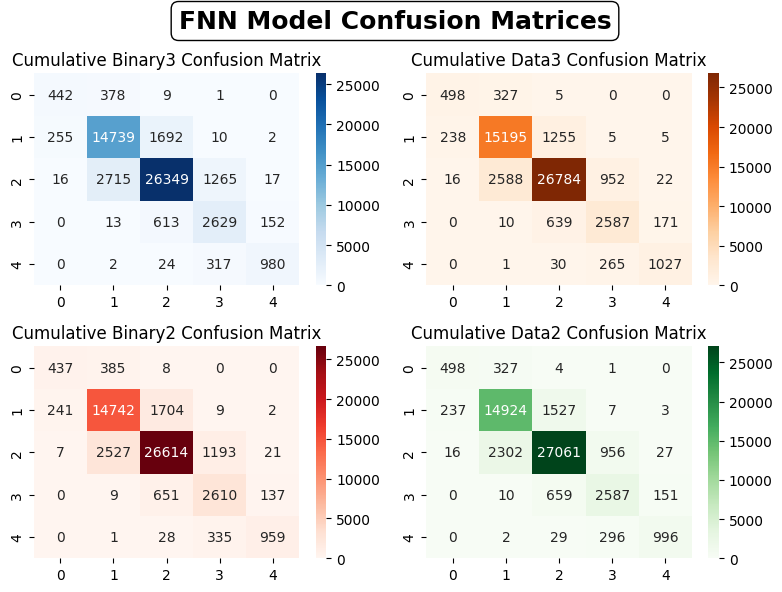

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
cumulative_bi3_conf_mat = np.sum(bi3_conf_mat_list, axis=0)
cumulative_data3_conf_mat = np.sum(data3_conf_mat_list, axis=0)
cumulative_data2_conf_mat = np.sum(data2_conf_mat_list, axis=0)
cumulative_bi2_conf_mat = np.sum(bi2_conf_mat_list, axis=0)

# Plotting subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

fig.suptitle('FNN Model Confusion Matrices', fontsize=18, bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black'), weight='bold', va='top')

# Plot cumulative confusion matrices
sns.heatmap(cumulative_bi3_conf_mat, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Cumulative Binary3 Confusion Matrix')

sns.heatmap(cumulative_data3_conf_mat, annot=True, fmt='d', cmap='Oranges', ax=axes[0, 1])
axes[0, 1].set_title('Cumulative Data3 Confusion Matrix')

sns.heatmap(cumulative_bi2_conf_mat, annot=True, fmt='d', cmap='Reds', ax=axes[1, 0])
axes[1, 0].set_title('Cumulative Binary2 Confusion Matrix')

sns.heatmap(cumulative_data2_conf_mat, annot=True, fmt='d', cmap='Greens', ax=axes[1, 1])
axes[1, 1].set_title('Cumulative Data2 Confusion Matrix')


plt.tight_layout()
plt.show()

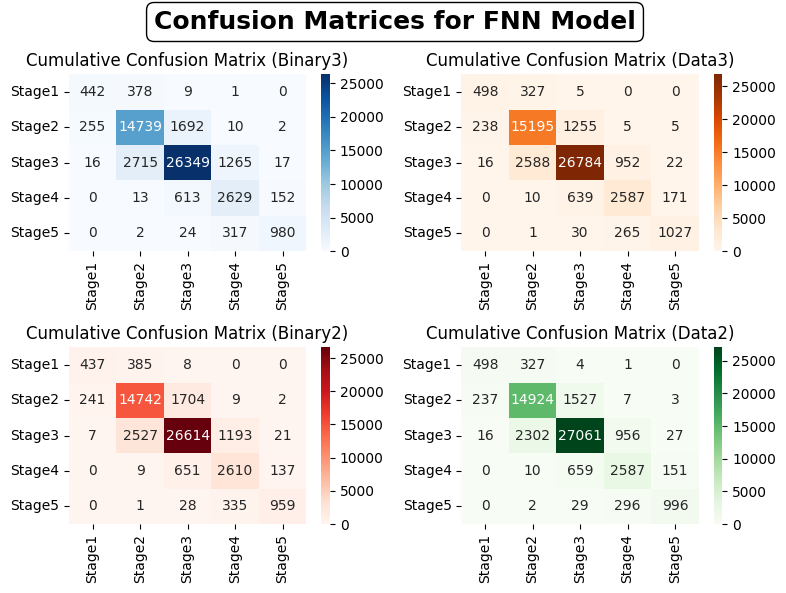

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate cumulative confusion matrices
cumulative_bi3_conf_mat = np.sum(bi3_conf_mat_list, axis=0)
cumulative_data3_conf_mat = np.sum(data3_conf_mat_list, axis=0)
cumulative_data2_conf_mat = np.sum(data2_conf_mat_list, axis=0)
cumulative_bi2_conf_mat = np.sum(bi2_conf_mat_list, axis=0)

class_labels = ['Stage1', 'Stage2', 'Stage3', 'Stage4', 'Stage5']

# Plotting subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Set the title for the entire figure
fig.suptitle('Confusion Matrices for FNN Model', fontsize=18, bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black'), weight='bold', va='top')

# Plot cumulative confusion matrices for 2 Classes
sns.heatmap(cumulative_bi3_conf_mat, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], xticklabels=class_labels, yticklabels=class_labels)
axes[0, 0].set_title('Cumulative Confusion Matrix (Binary3)')

# Plot cumulative confusion matrices for 3 Classes
sns.heatmap(cumulative_data3_conf_mat, annot=True, fmt='d', cmap='Oranges', ax=axes[0, 1], xticklabels=class_labels, yticklabels=class_labels)
axes[0, 1].set_title('Cumulative Confusion Matrix (Data3)')

# Plot cumulative confusion matrices for 2 Classes
sns.heatmap(cumulative_bi2_conf_mat, annot=True, fmt='d', cmap='Reds', ax=axes[1, 0], xticklabels=class_labels, yticklabels=class_labels)
axes[1, 0].set_title('Cumulative Confusion Matrix (Binary2)')

# Plot cumulative confusion matrices for 3 Classes
sns.heatmap(cumulative_data2_conf_mat, annot=True, fmt='d', cmap='Greens', ax=axes[1, 1], xticklabels=class_labels, yticklabels=class_labels)
axes[1, 1].set_title('Cumulative Confusion Matrix (Data2)')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


# **Classes**
* stage 3    30362
* stage 2    16698
* stage 4     3407
* stage 5     1323
* stage 1      830